# Aim: Predicting if an insurance claim is fraudulent or not
## Problem Statement:
## Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

## In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

## In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [58]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [59]:
data.shape

(1000, 40)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [61]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Droping the _c39 column

In [62]:
data.drop(['_c39'],axis=1,inplace=True)

In [63]:
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [64]:
#Replacing ? with Nan
data.replace("?",np.nan, inplace= True)

In [65]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [66]:
# Filling the nana values usin mode method
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)
data['property_damage'].fillna(data['property_damage'].mode()[0], inplace = True)
data['police_report_available'].fillna(data['police_report_available'].mode()[0], inplace = True)

In [67]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [68]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

# EDA

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

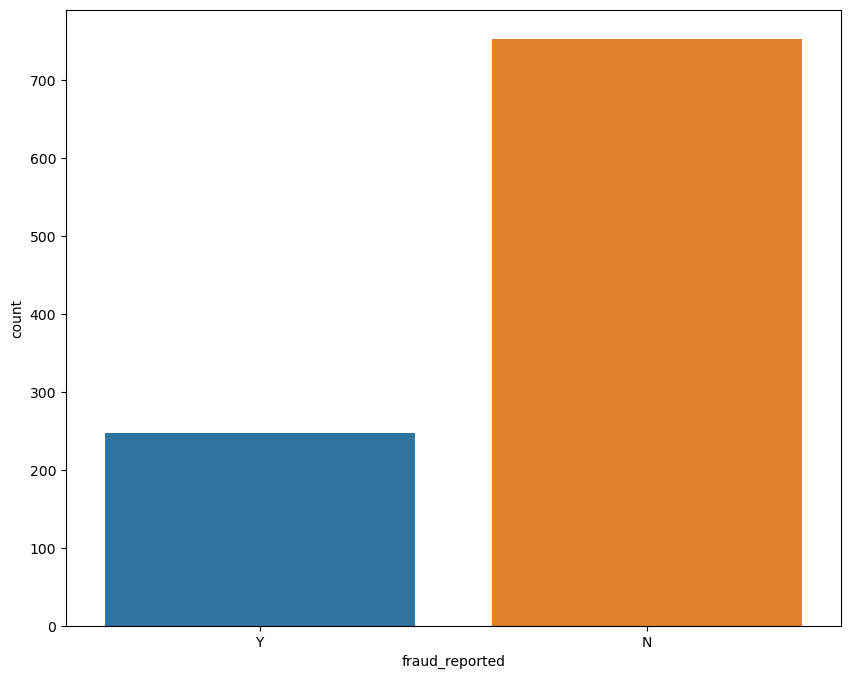

In [69]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['fraud_reported'])

In [70]:
# seperating the categorical columns
cat_features= data.select_dtypes(include=[np.object])

In [71]:
cat_features.drop(['policy_bind_date','incident_location'],axis=1,inplace=True)

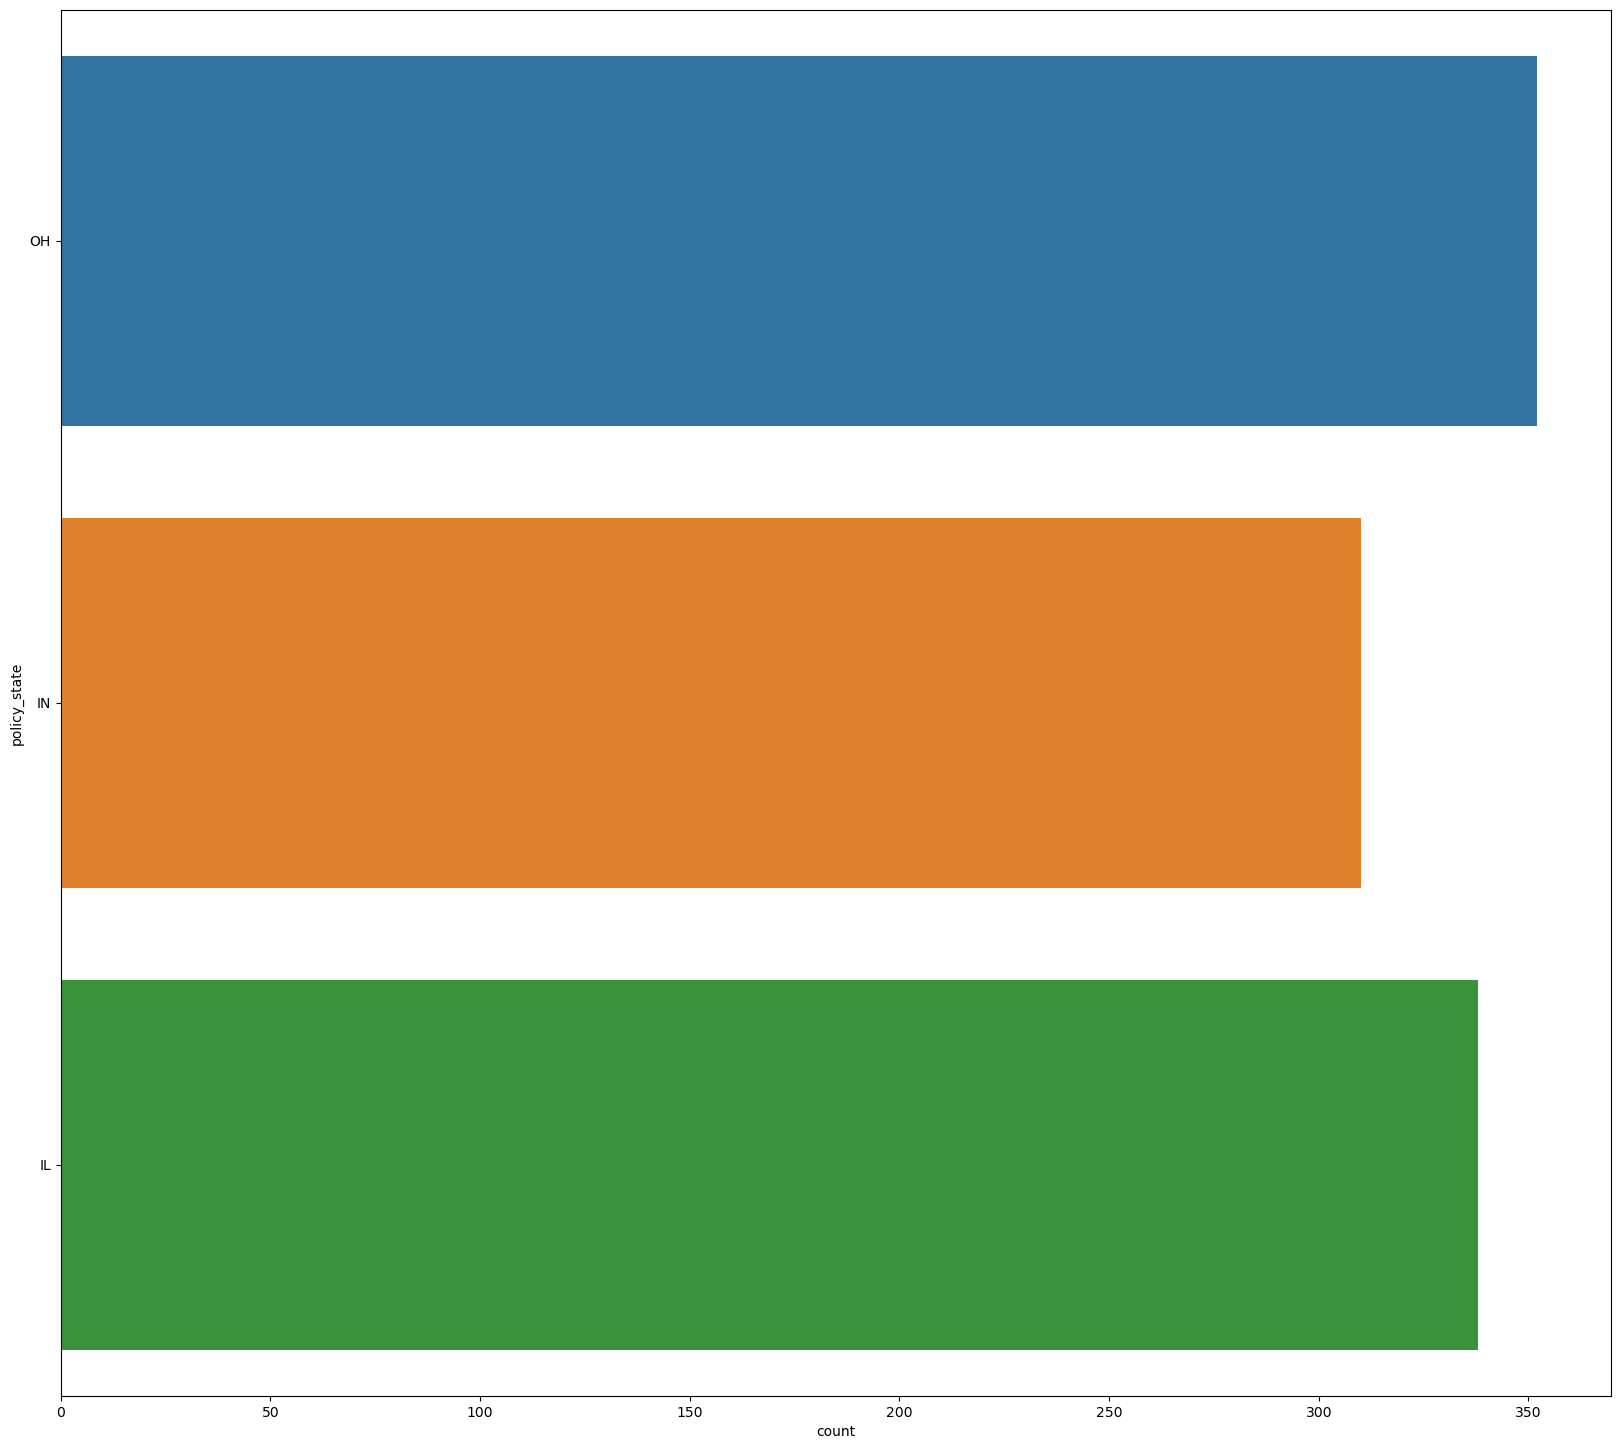

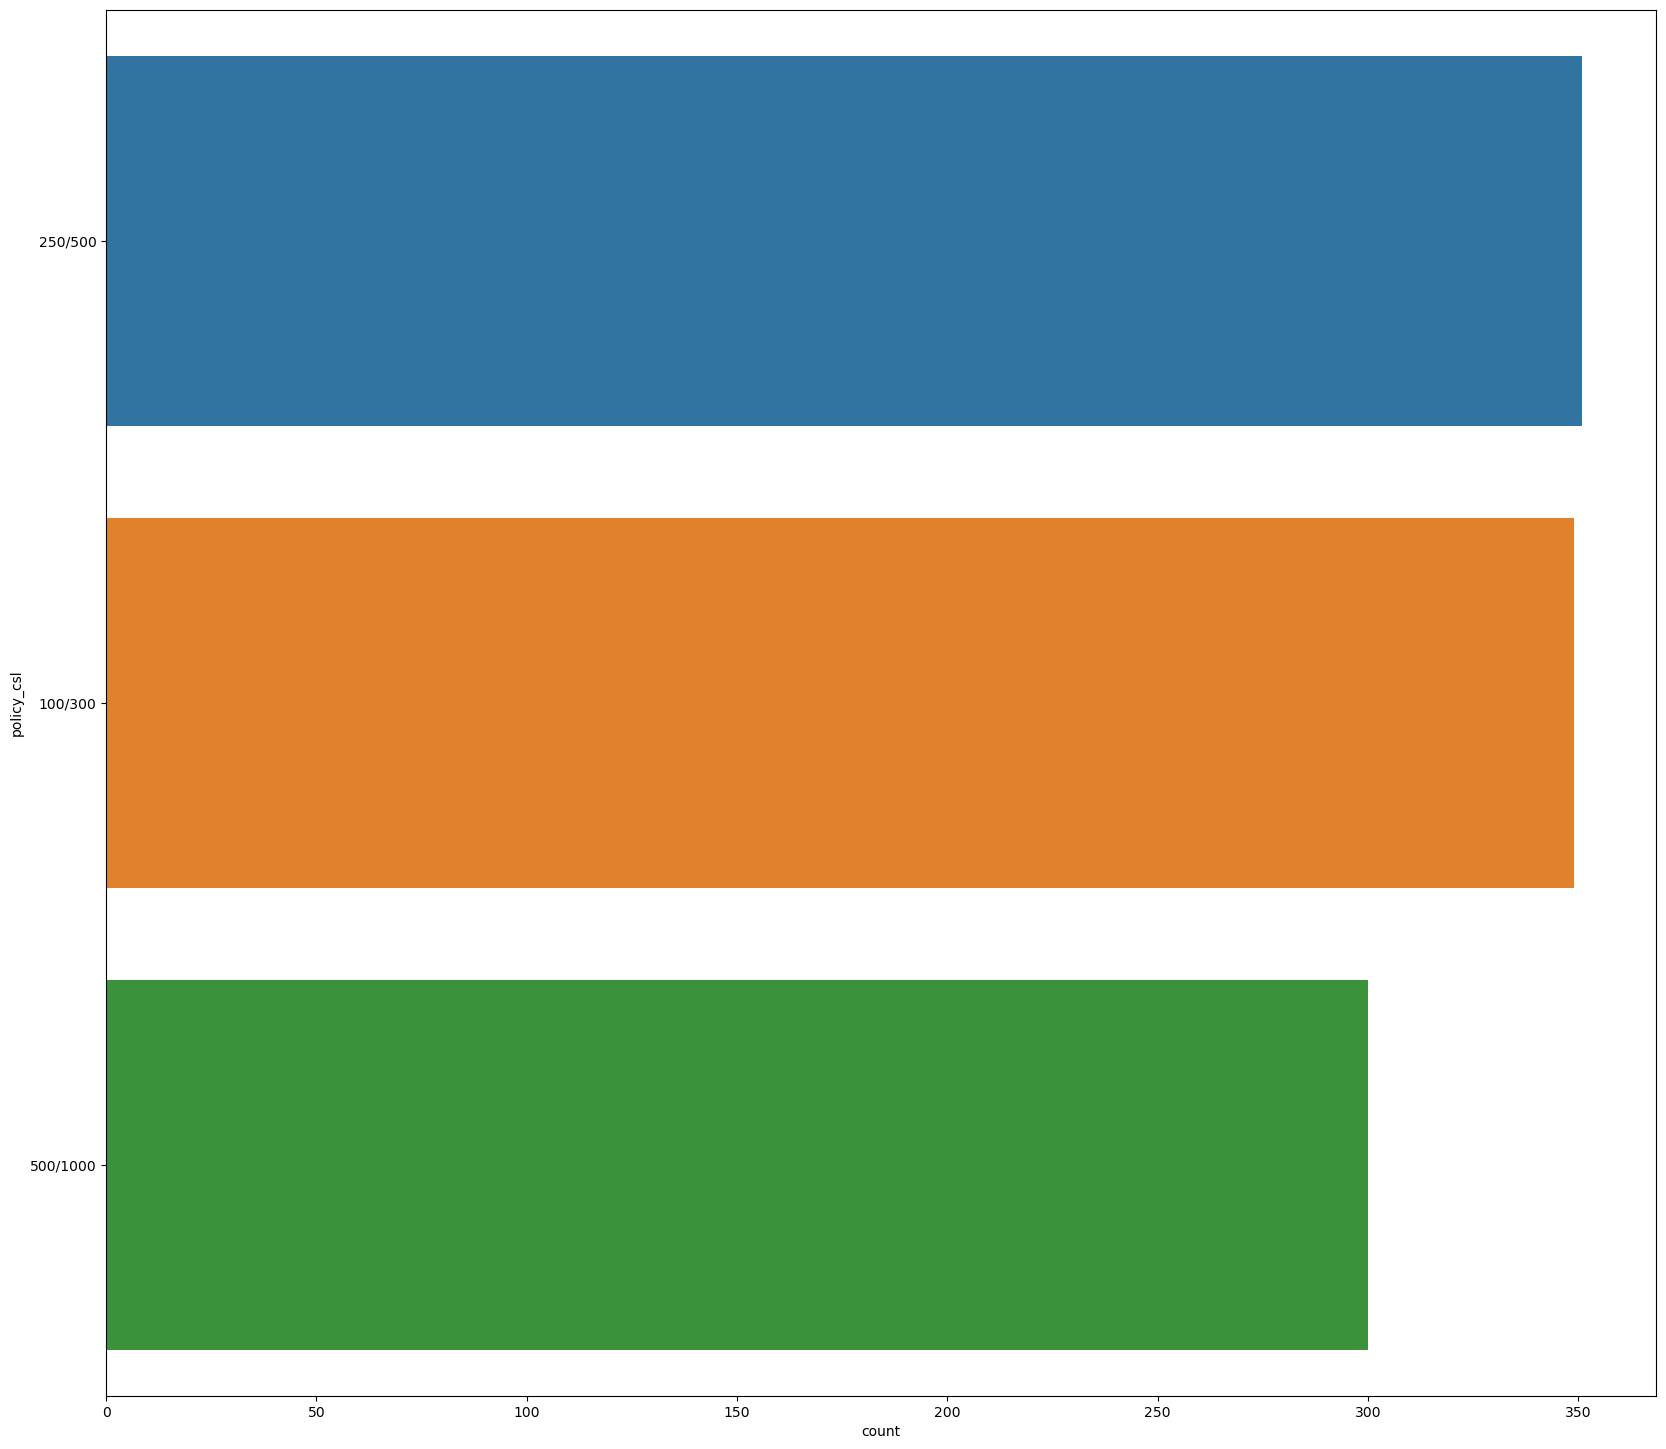

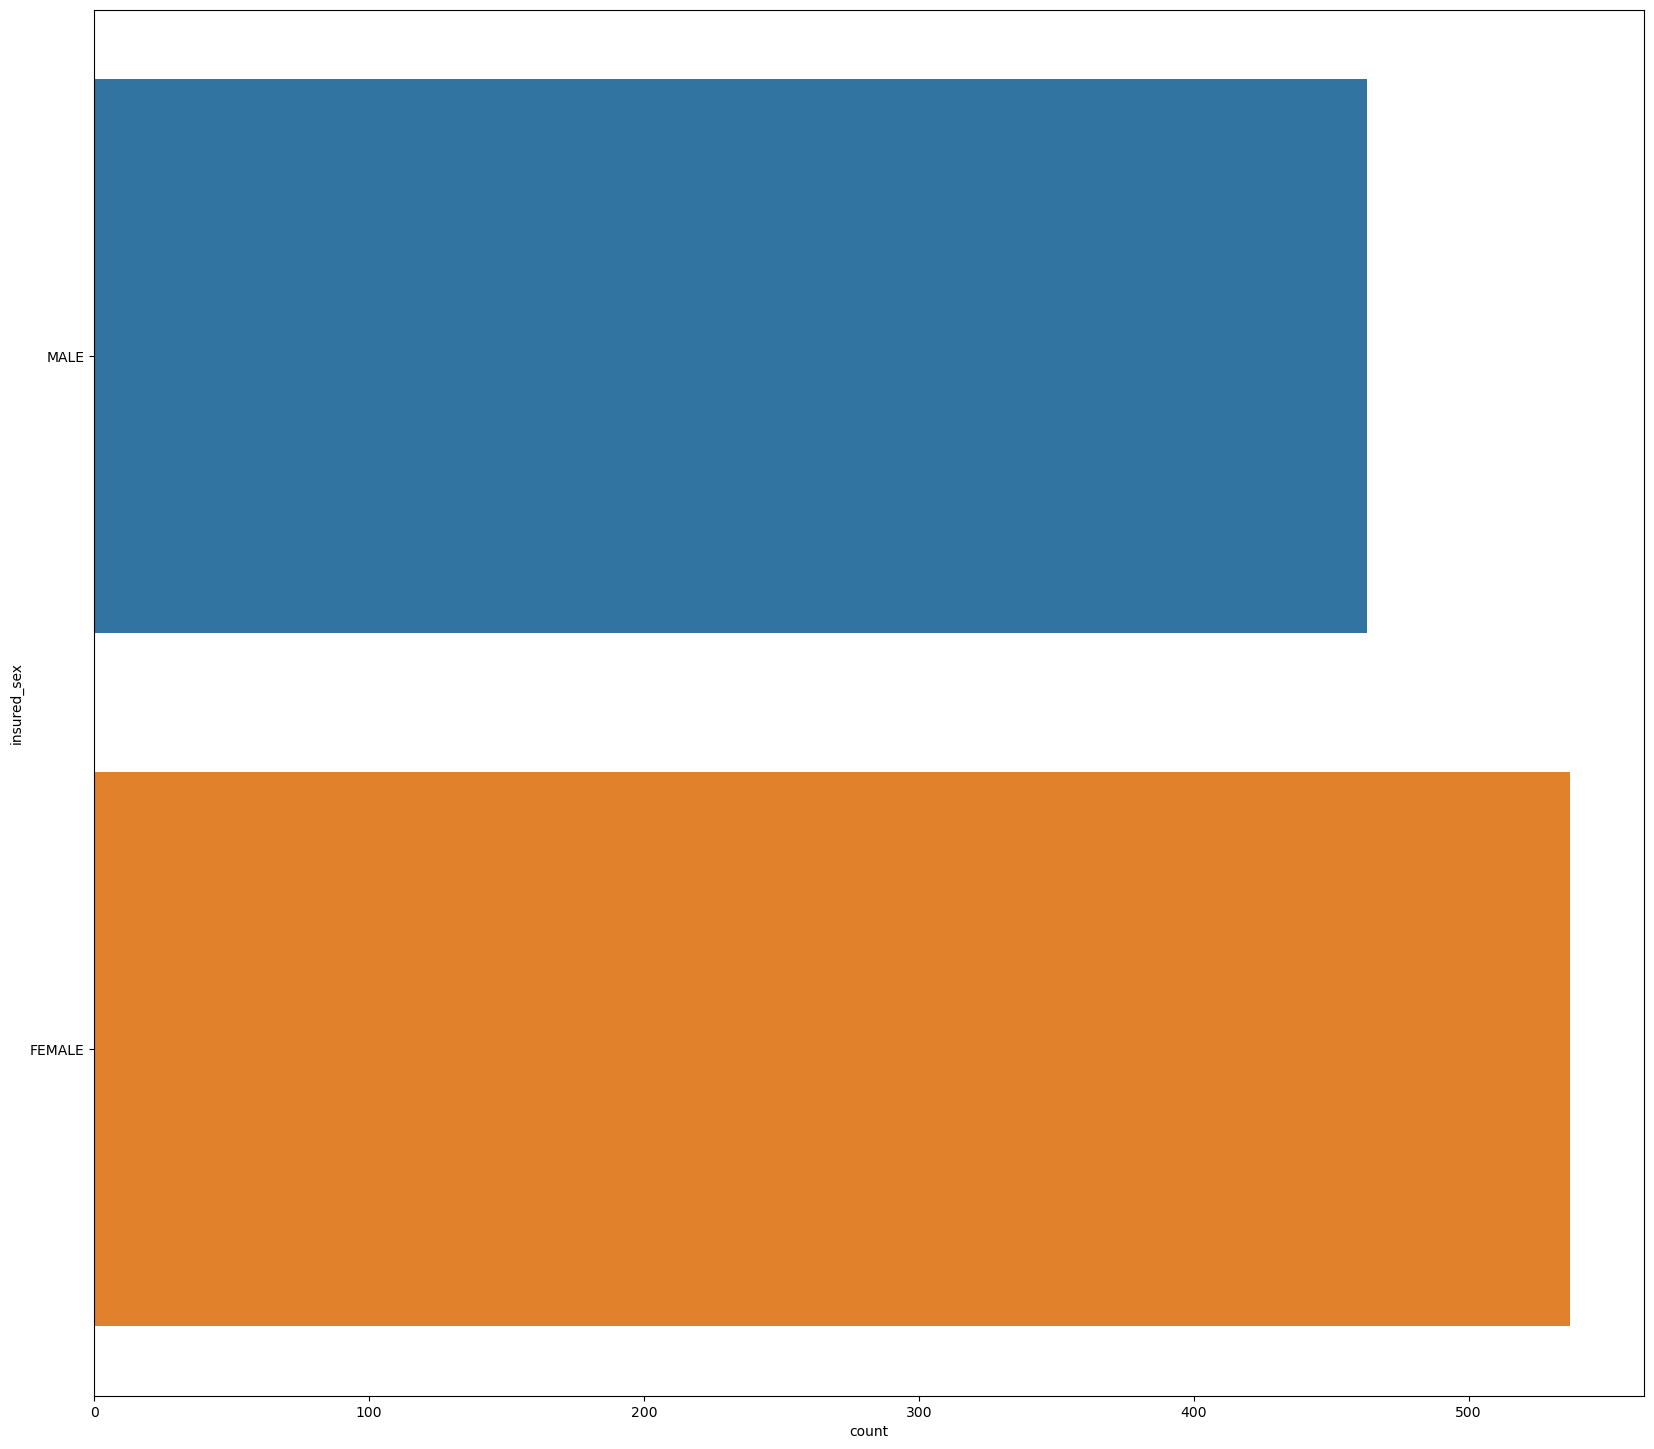

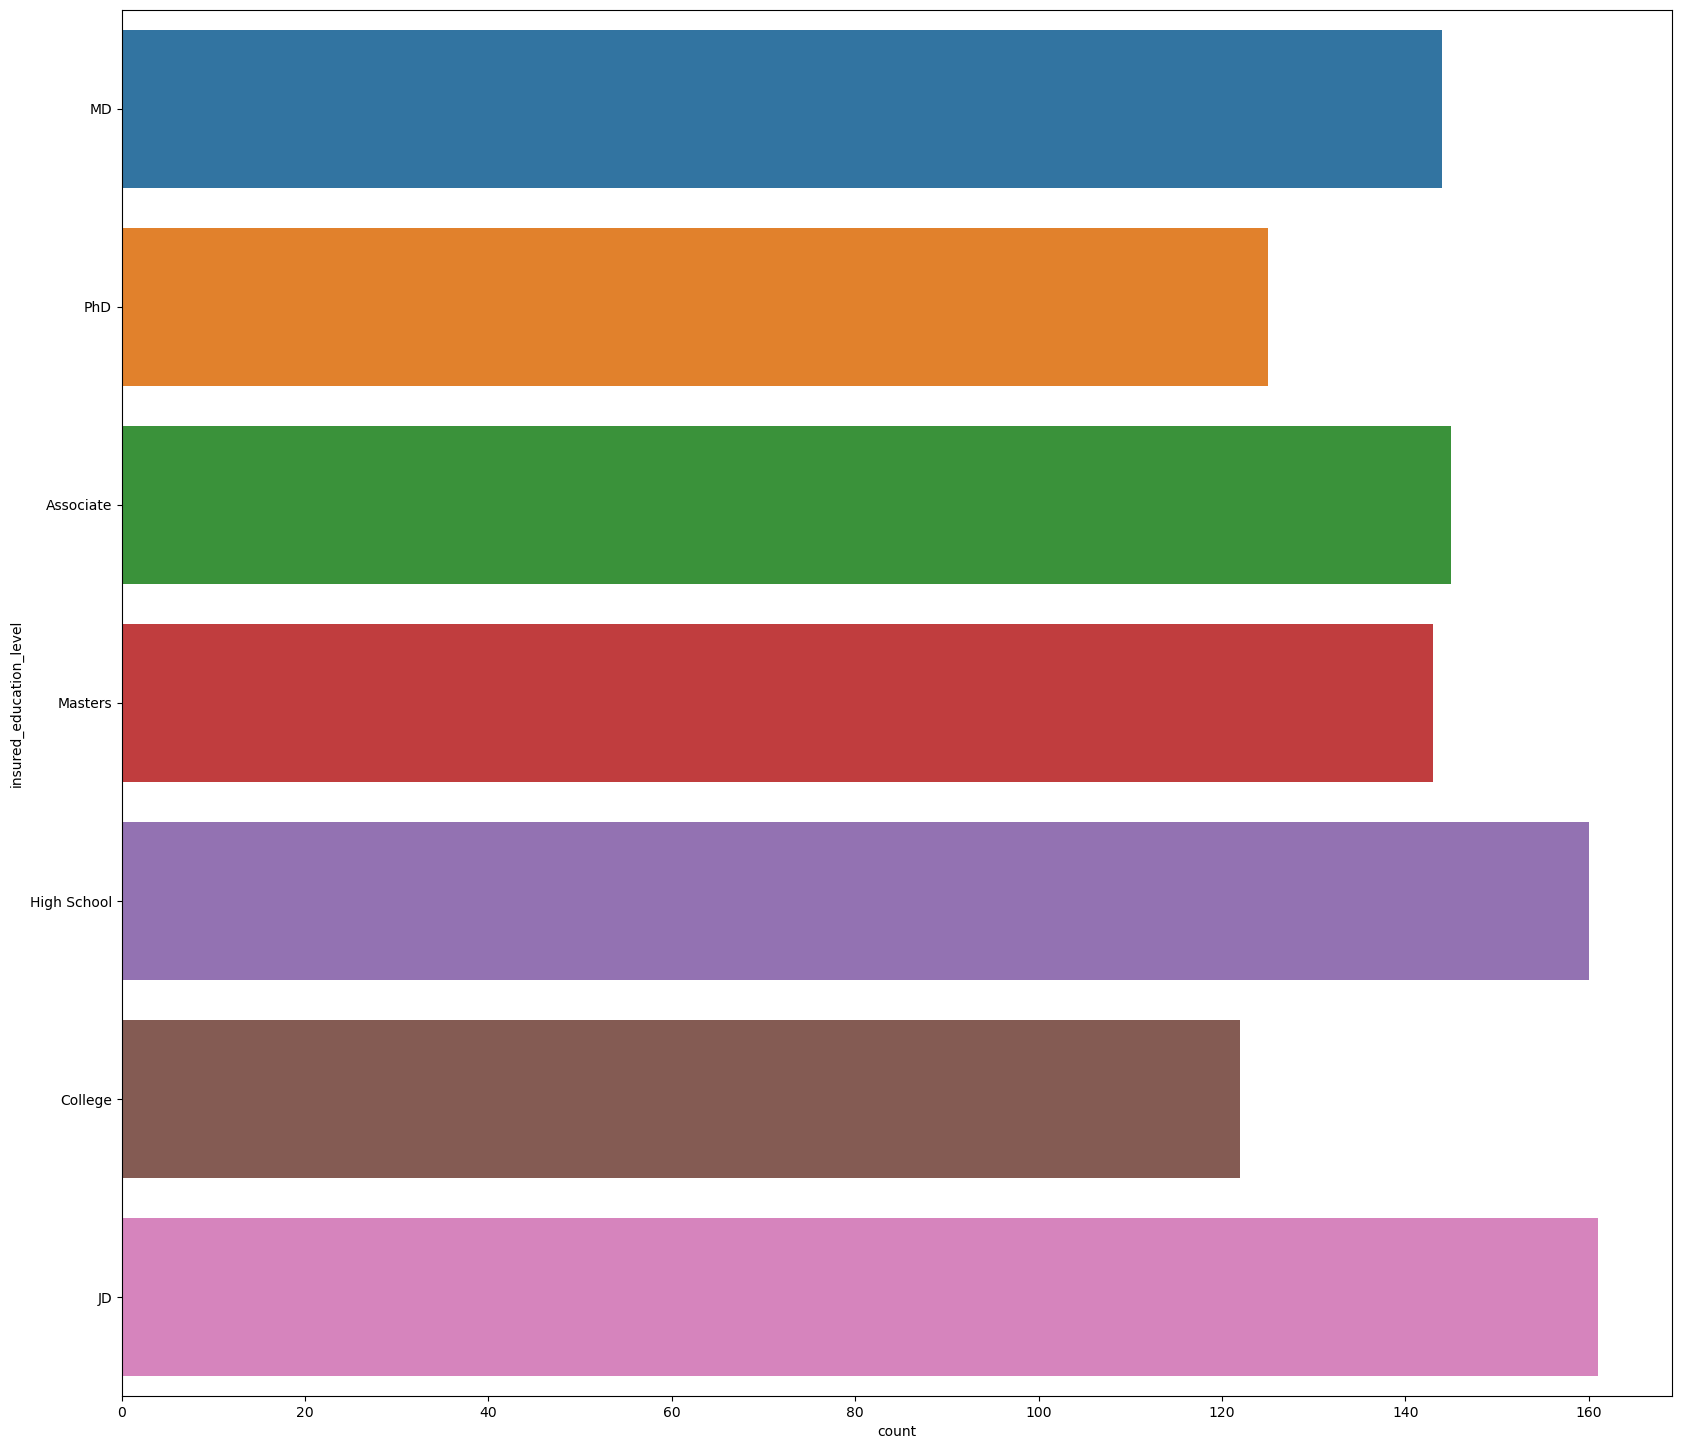

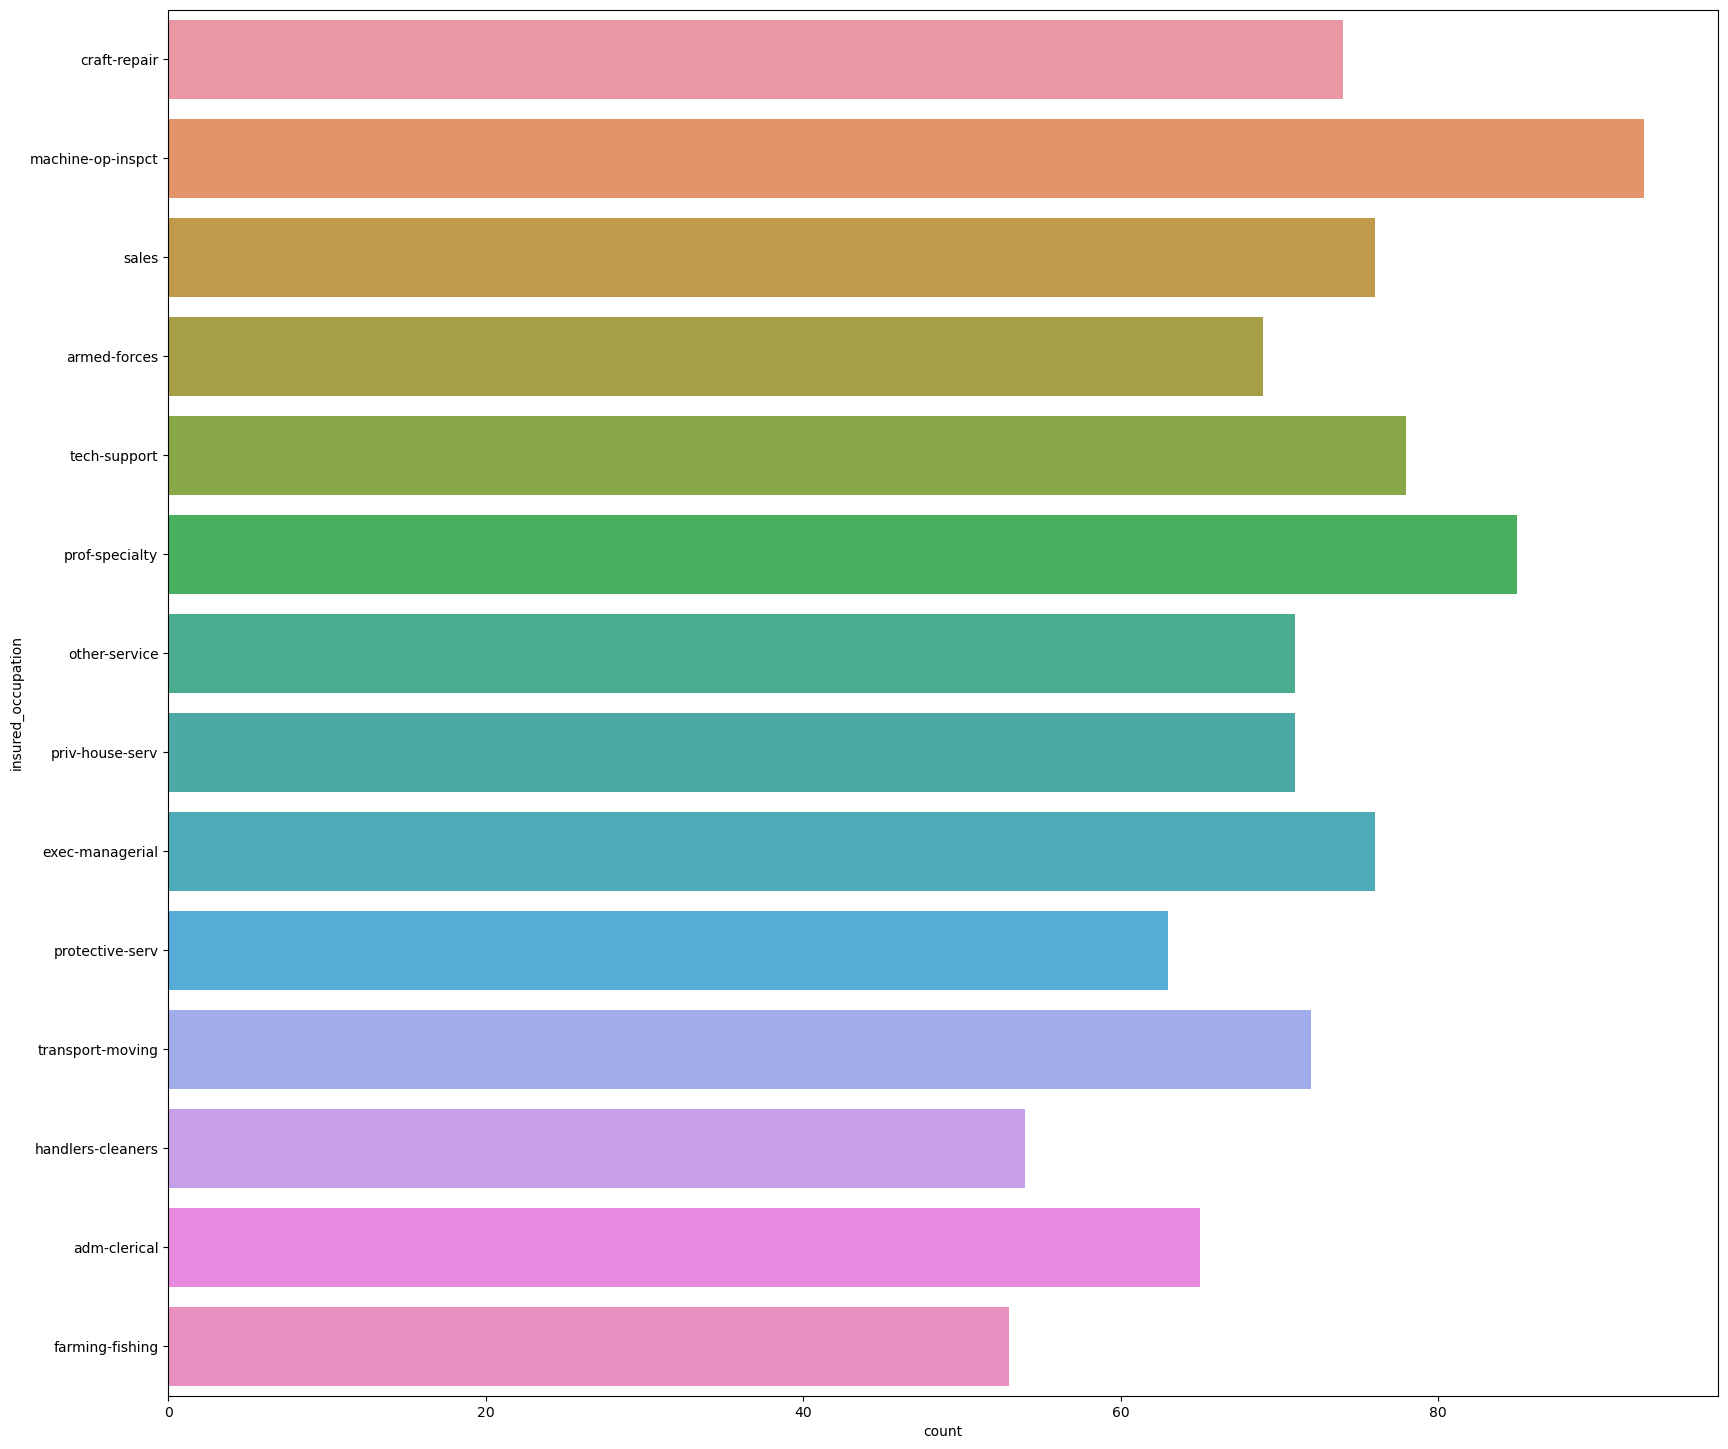

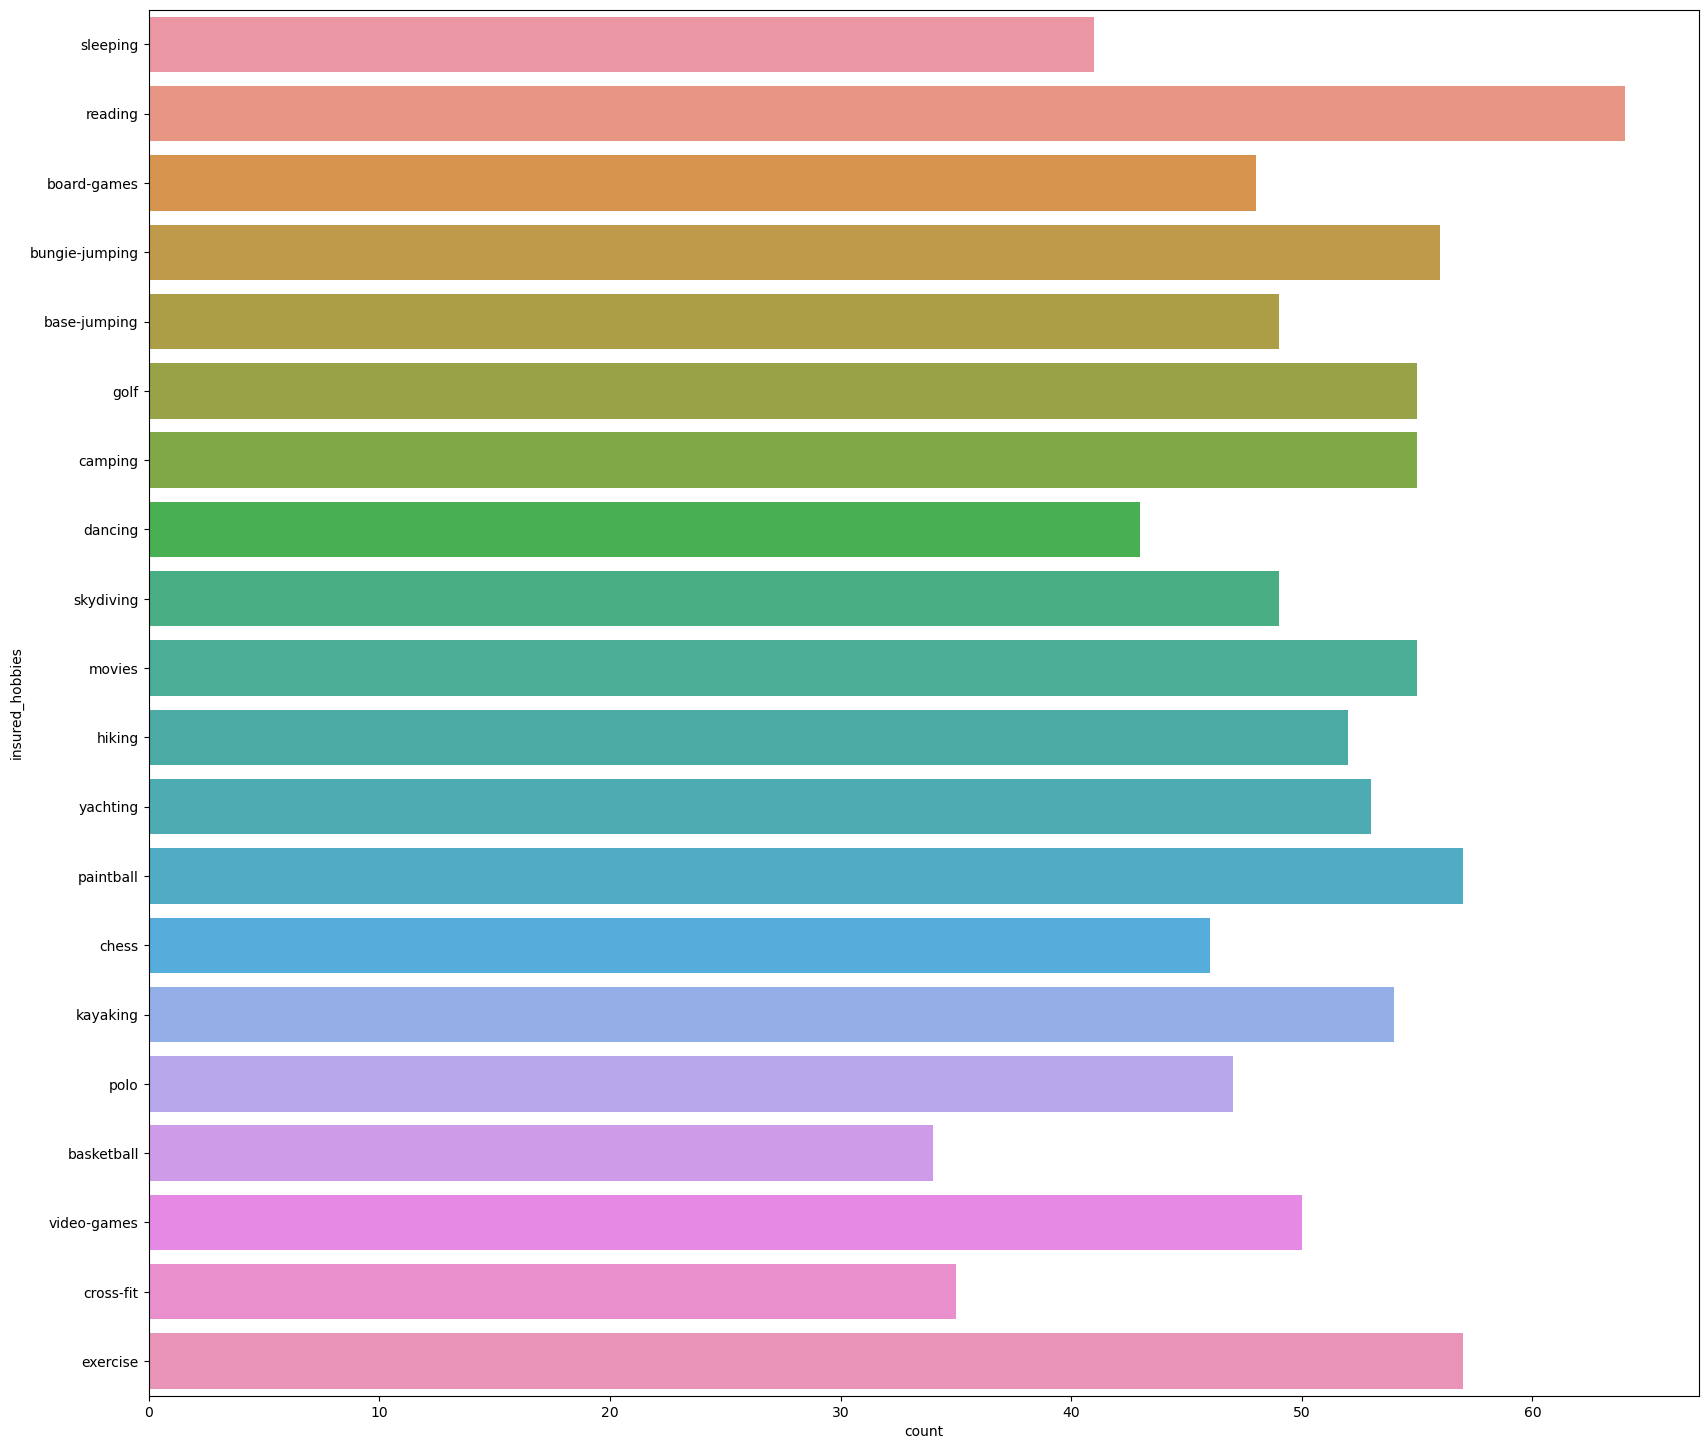

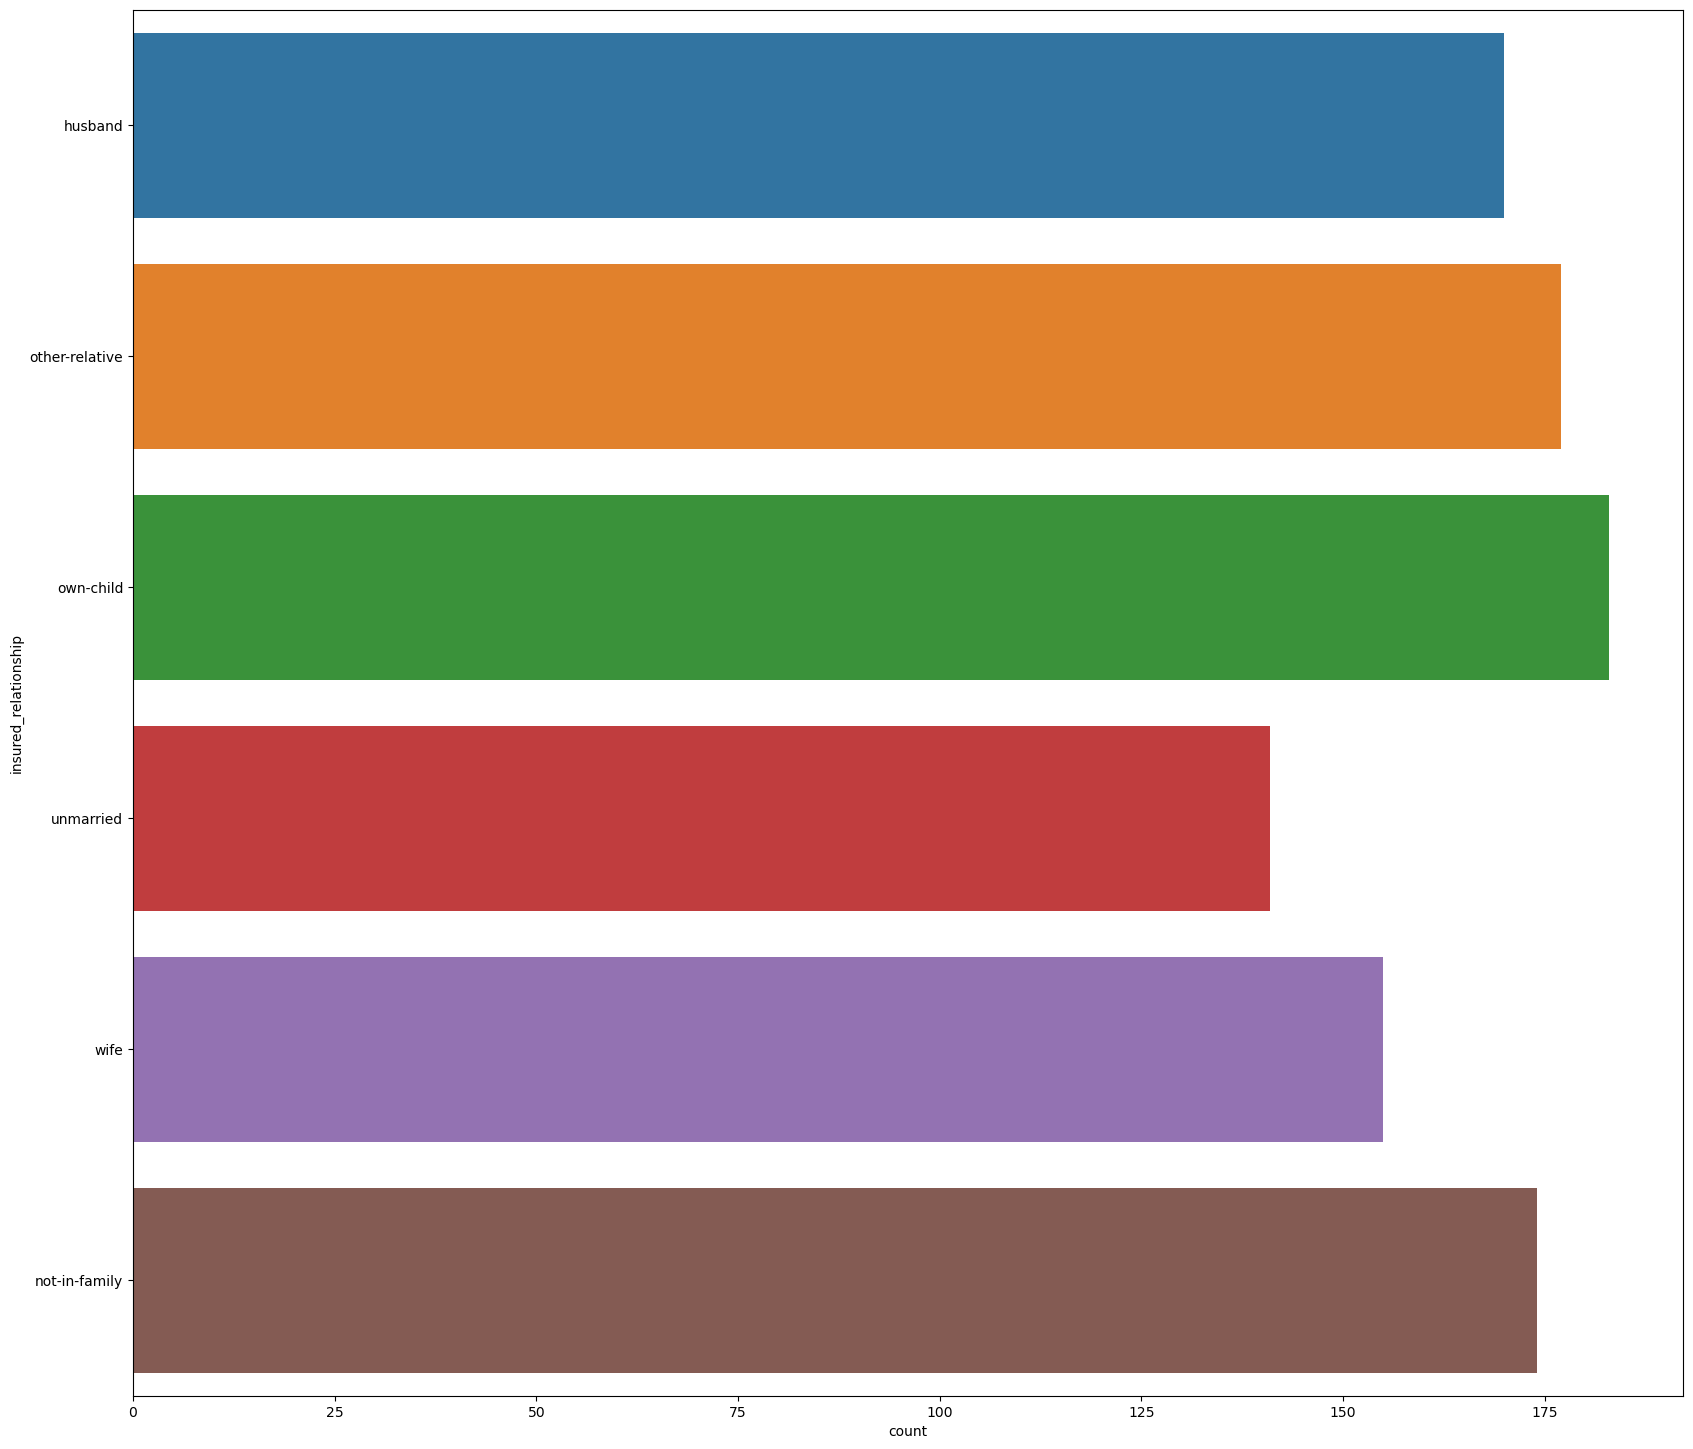

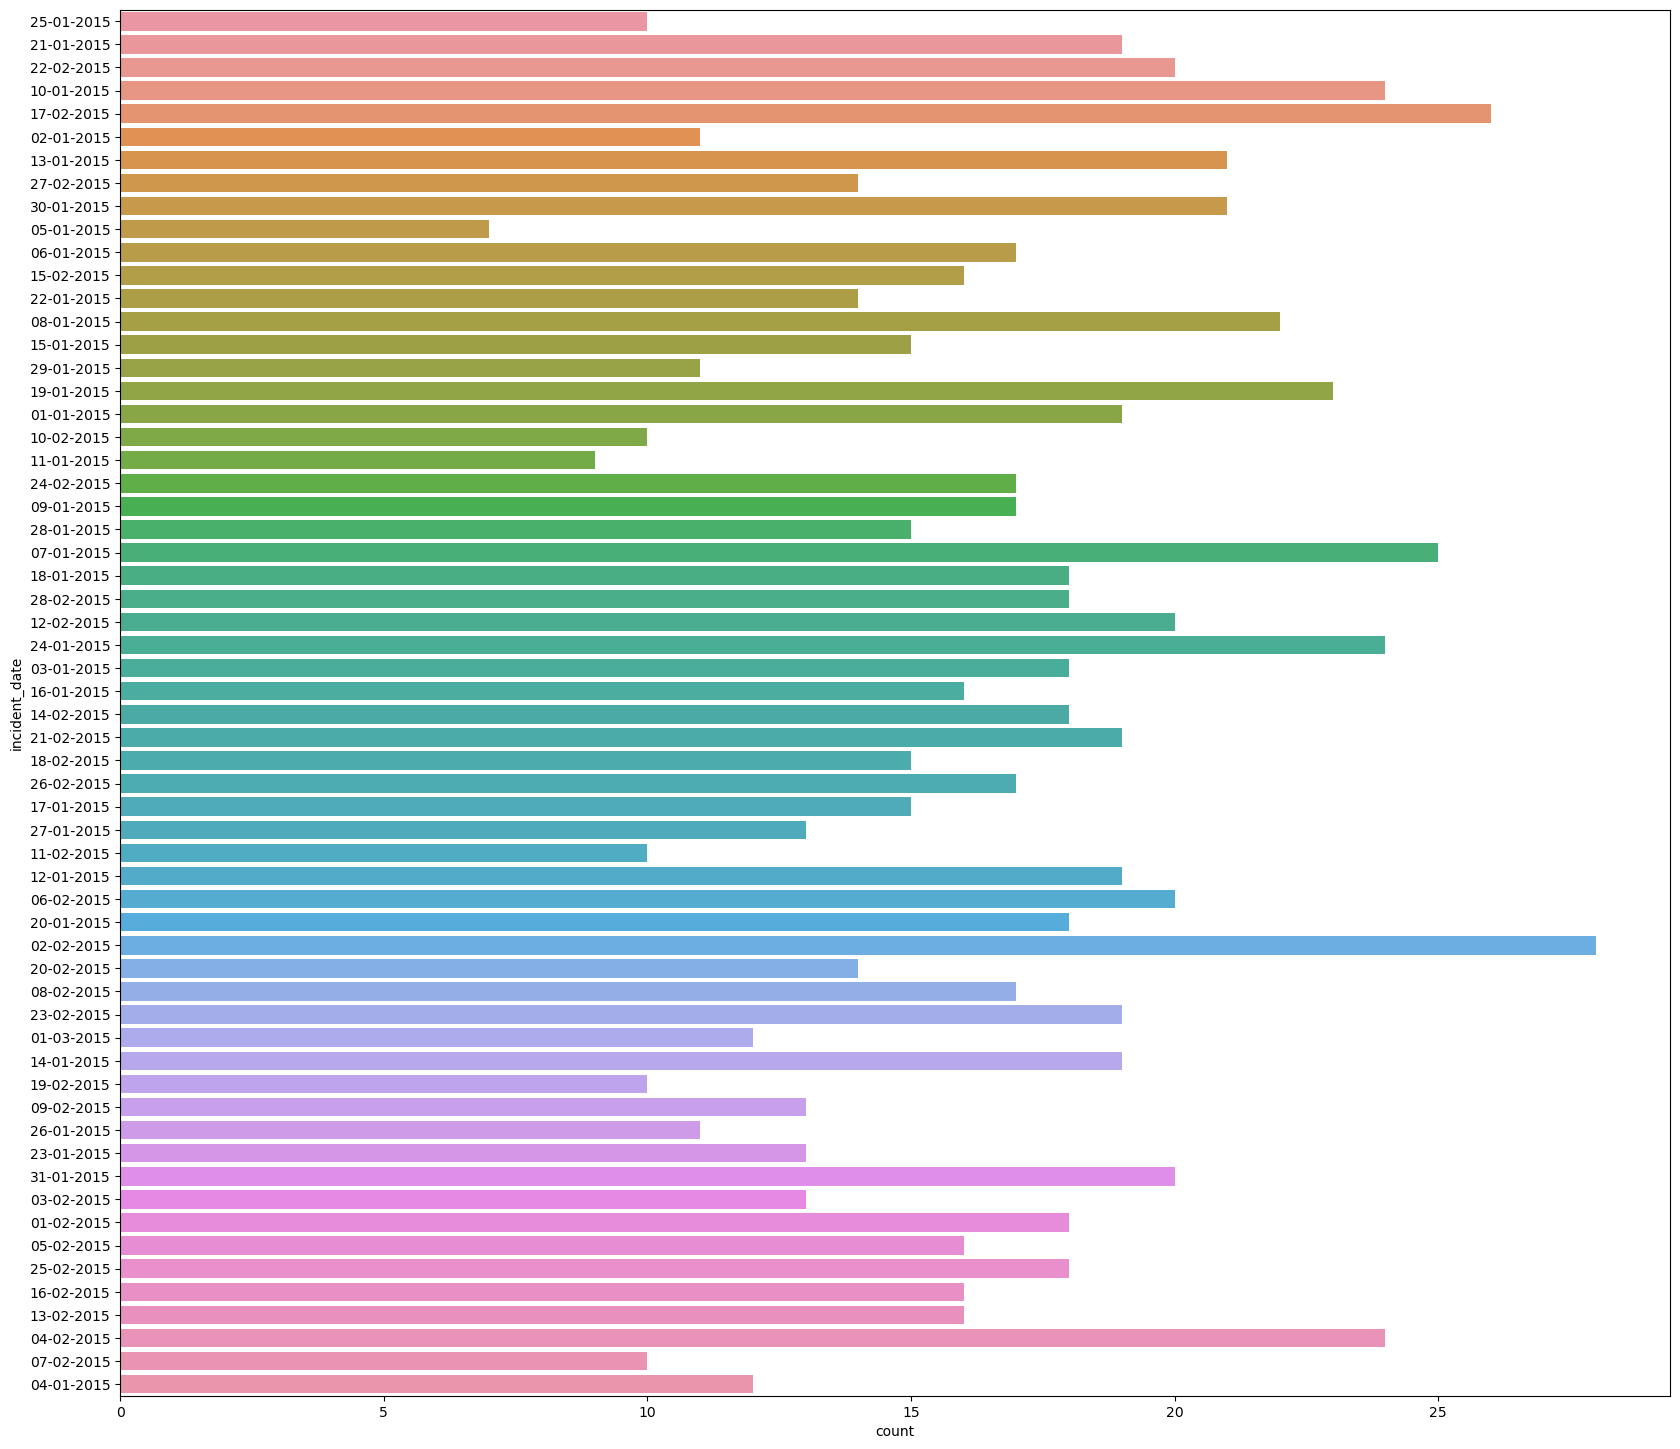

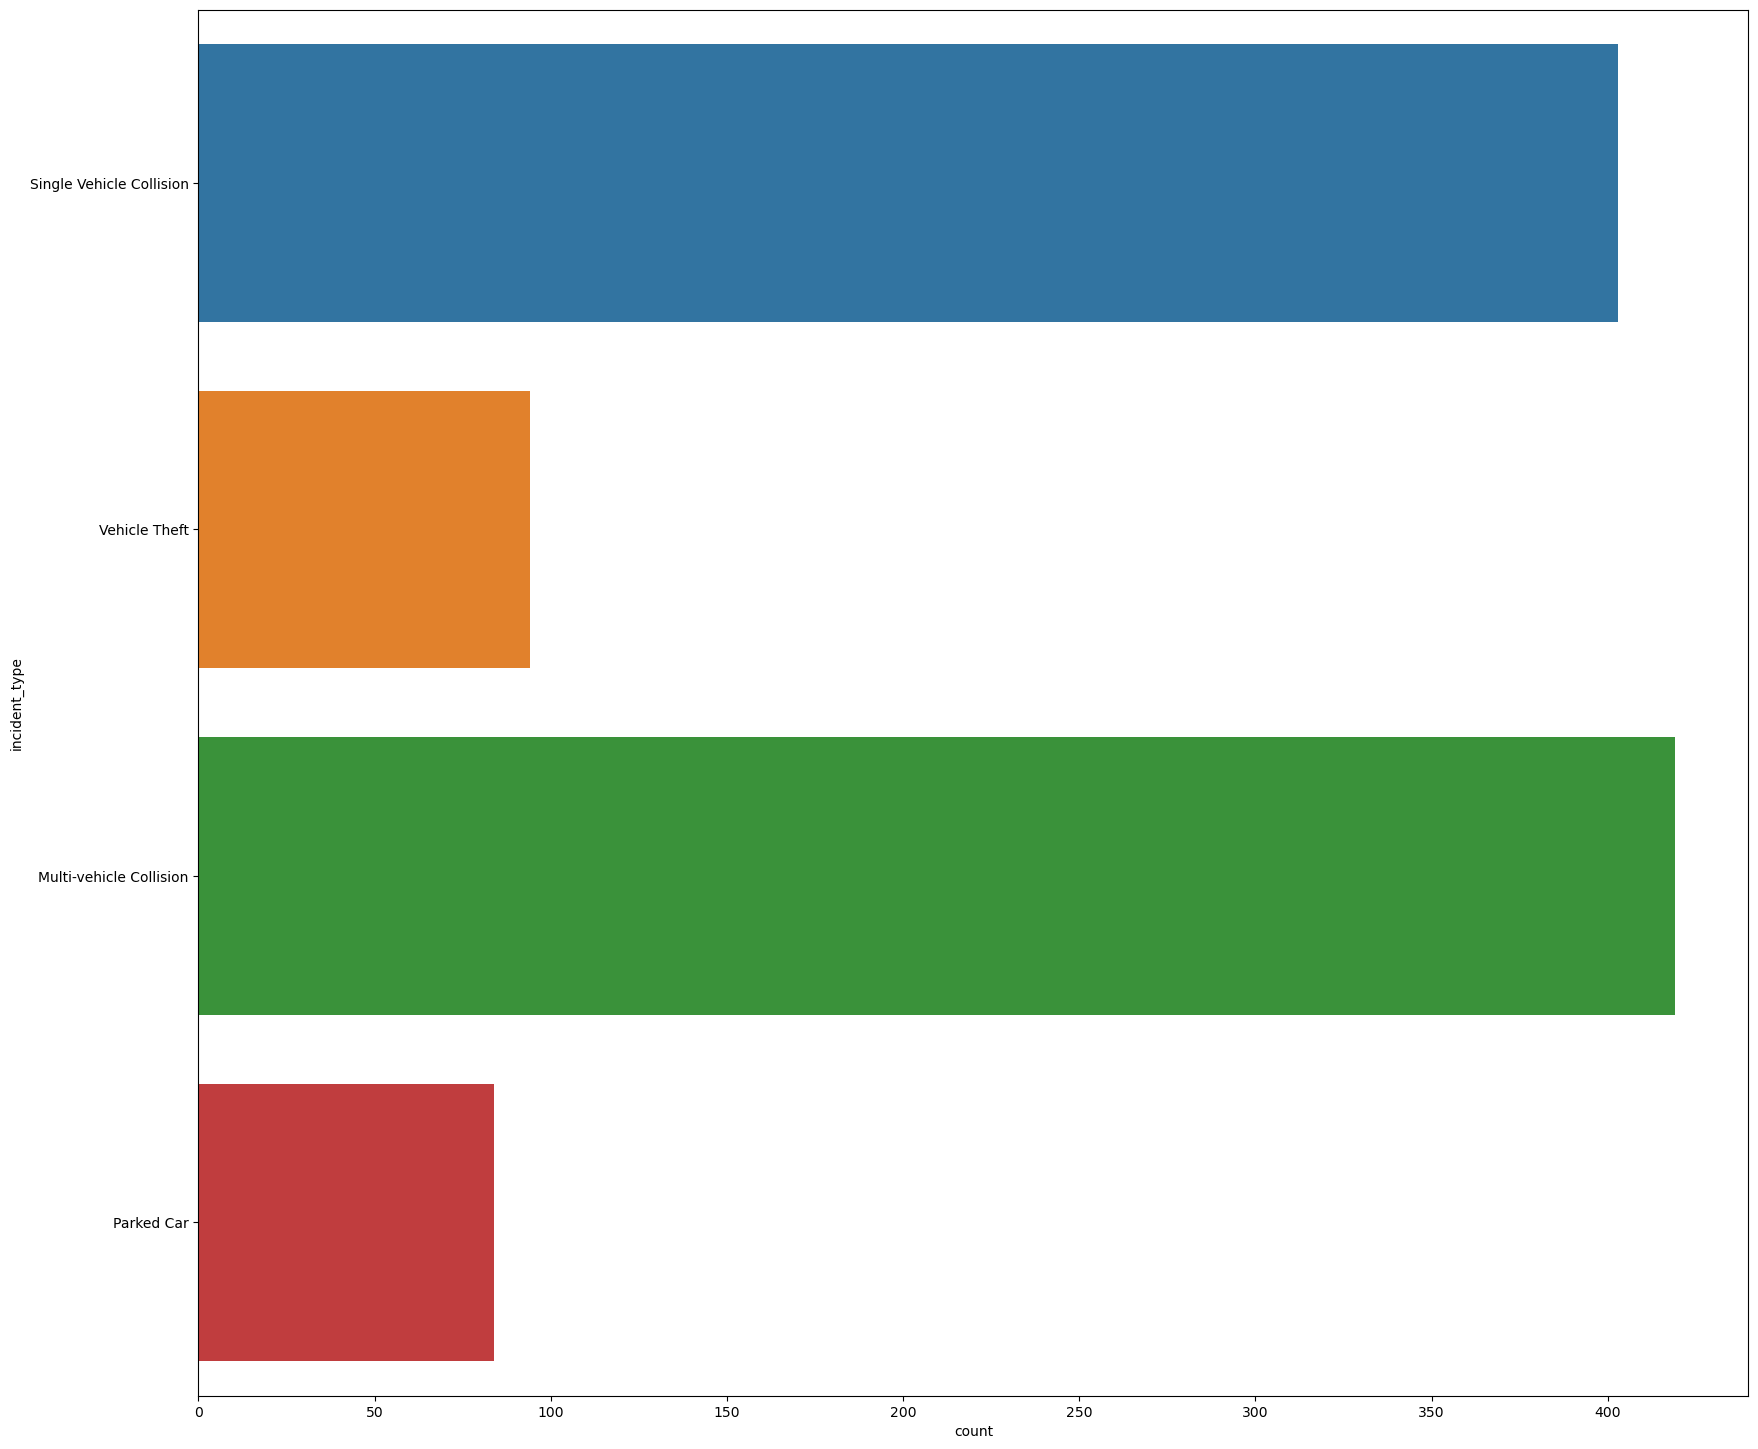

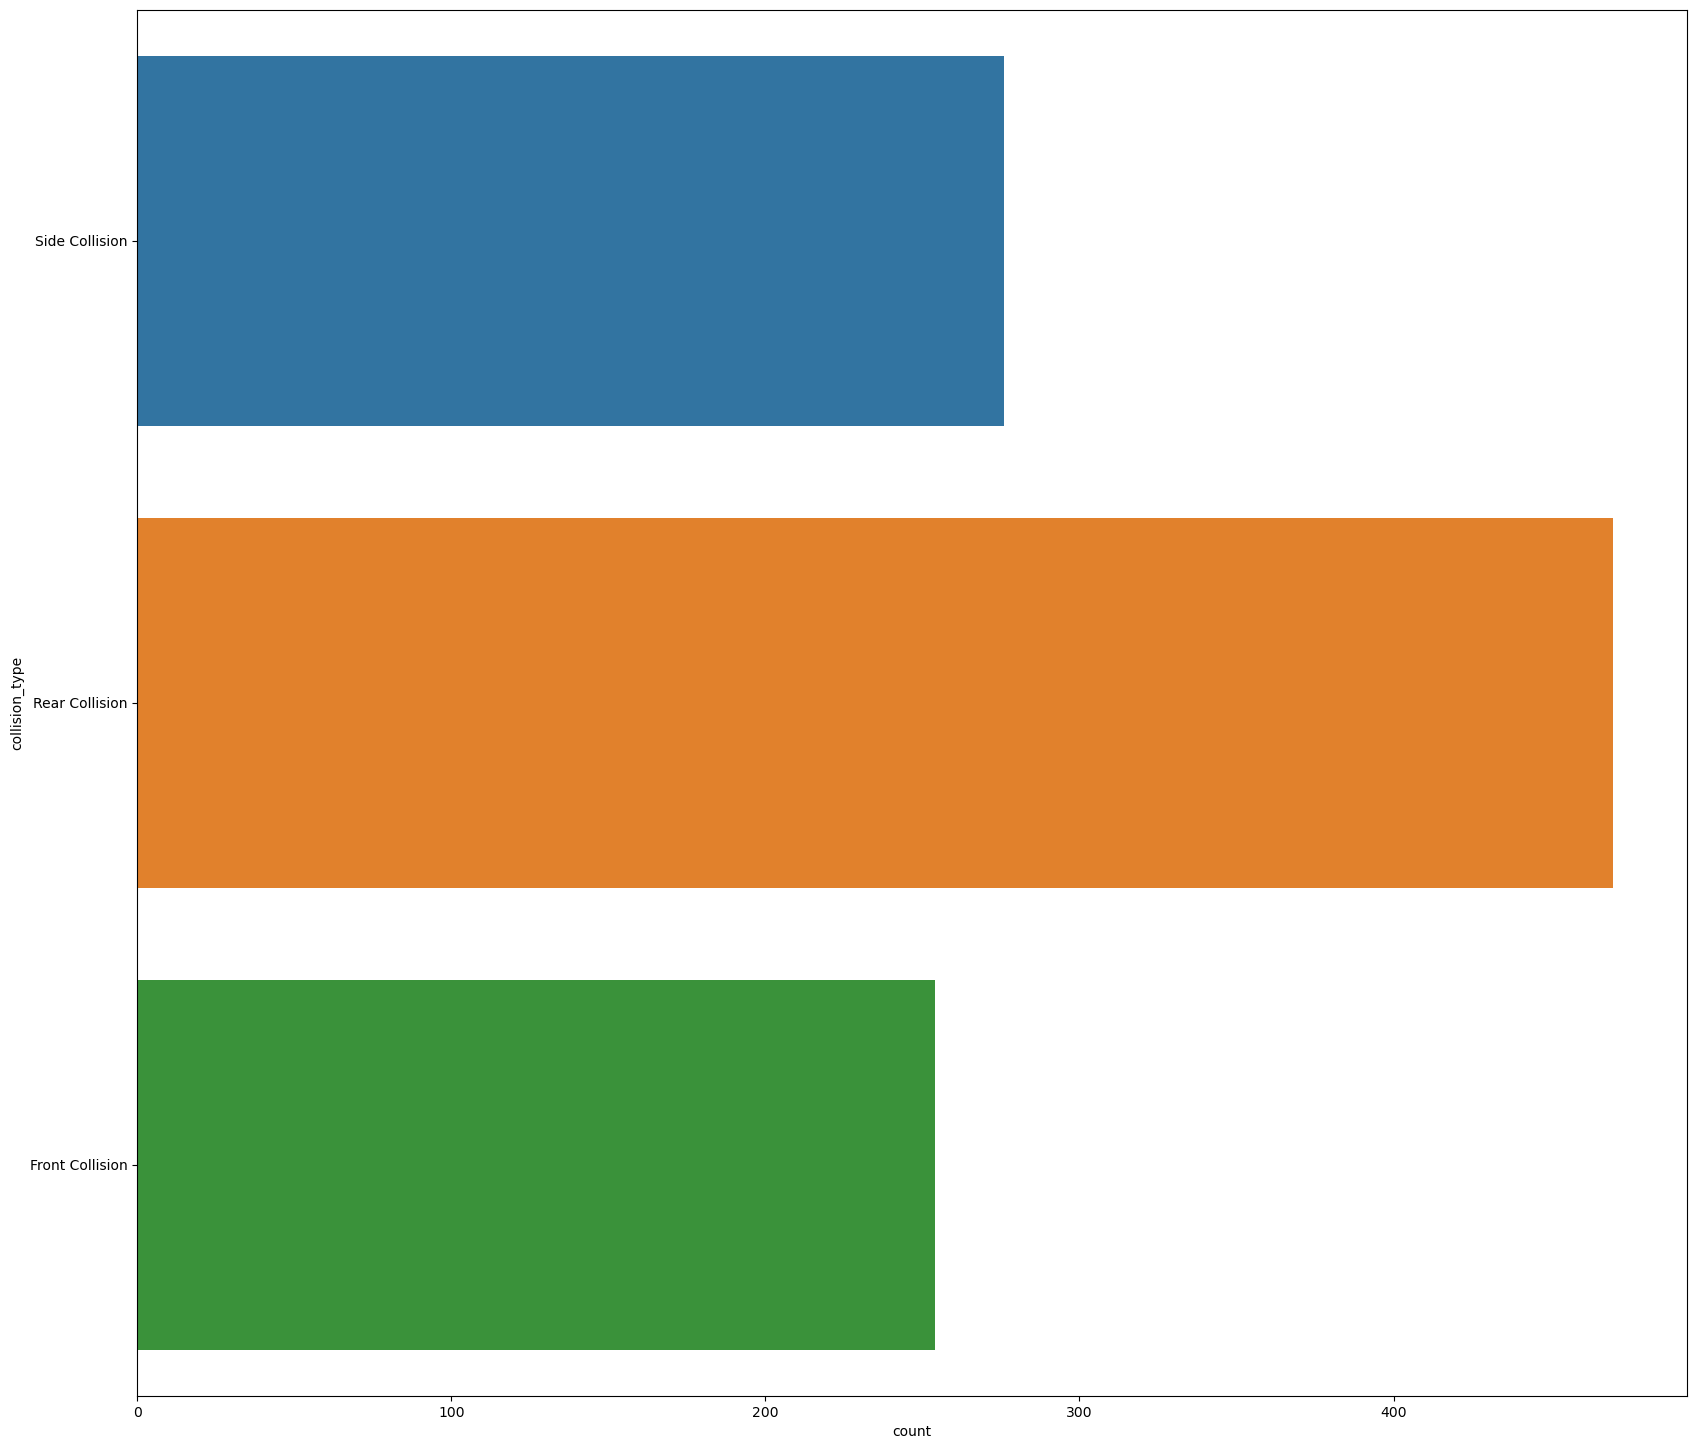

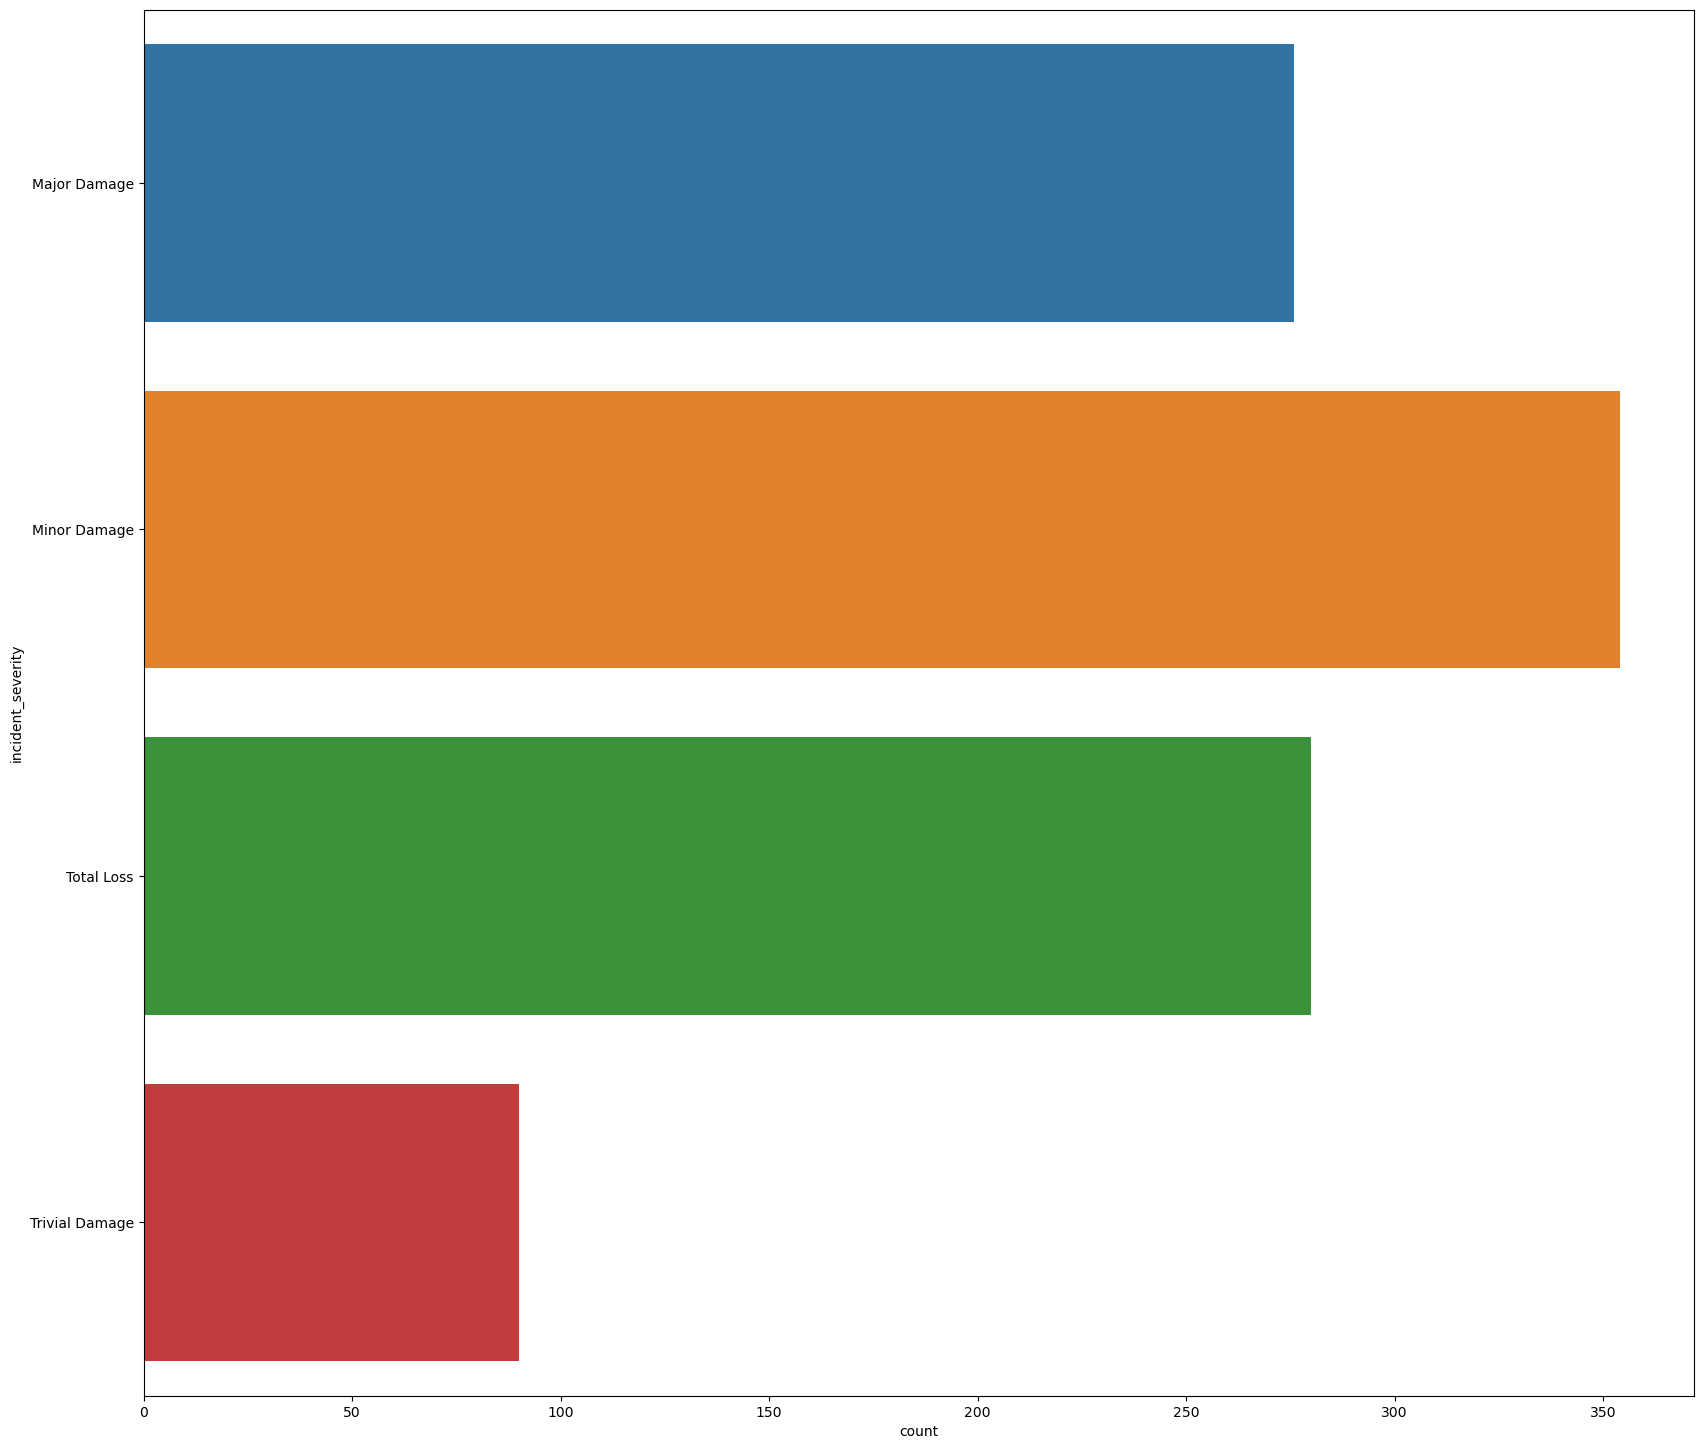

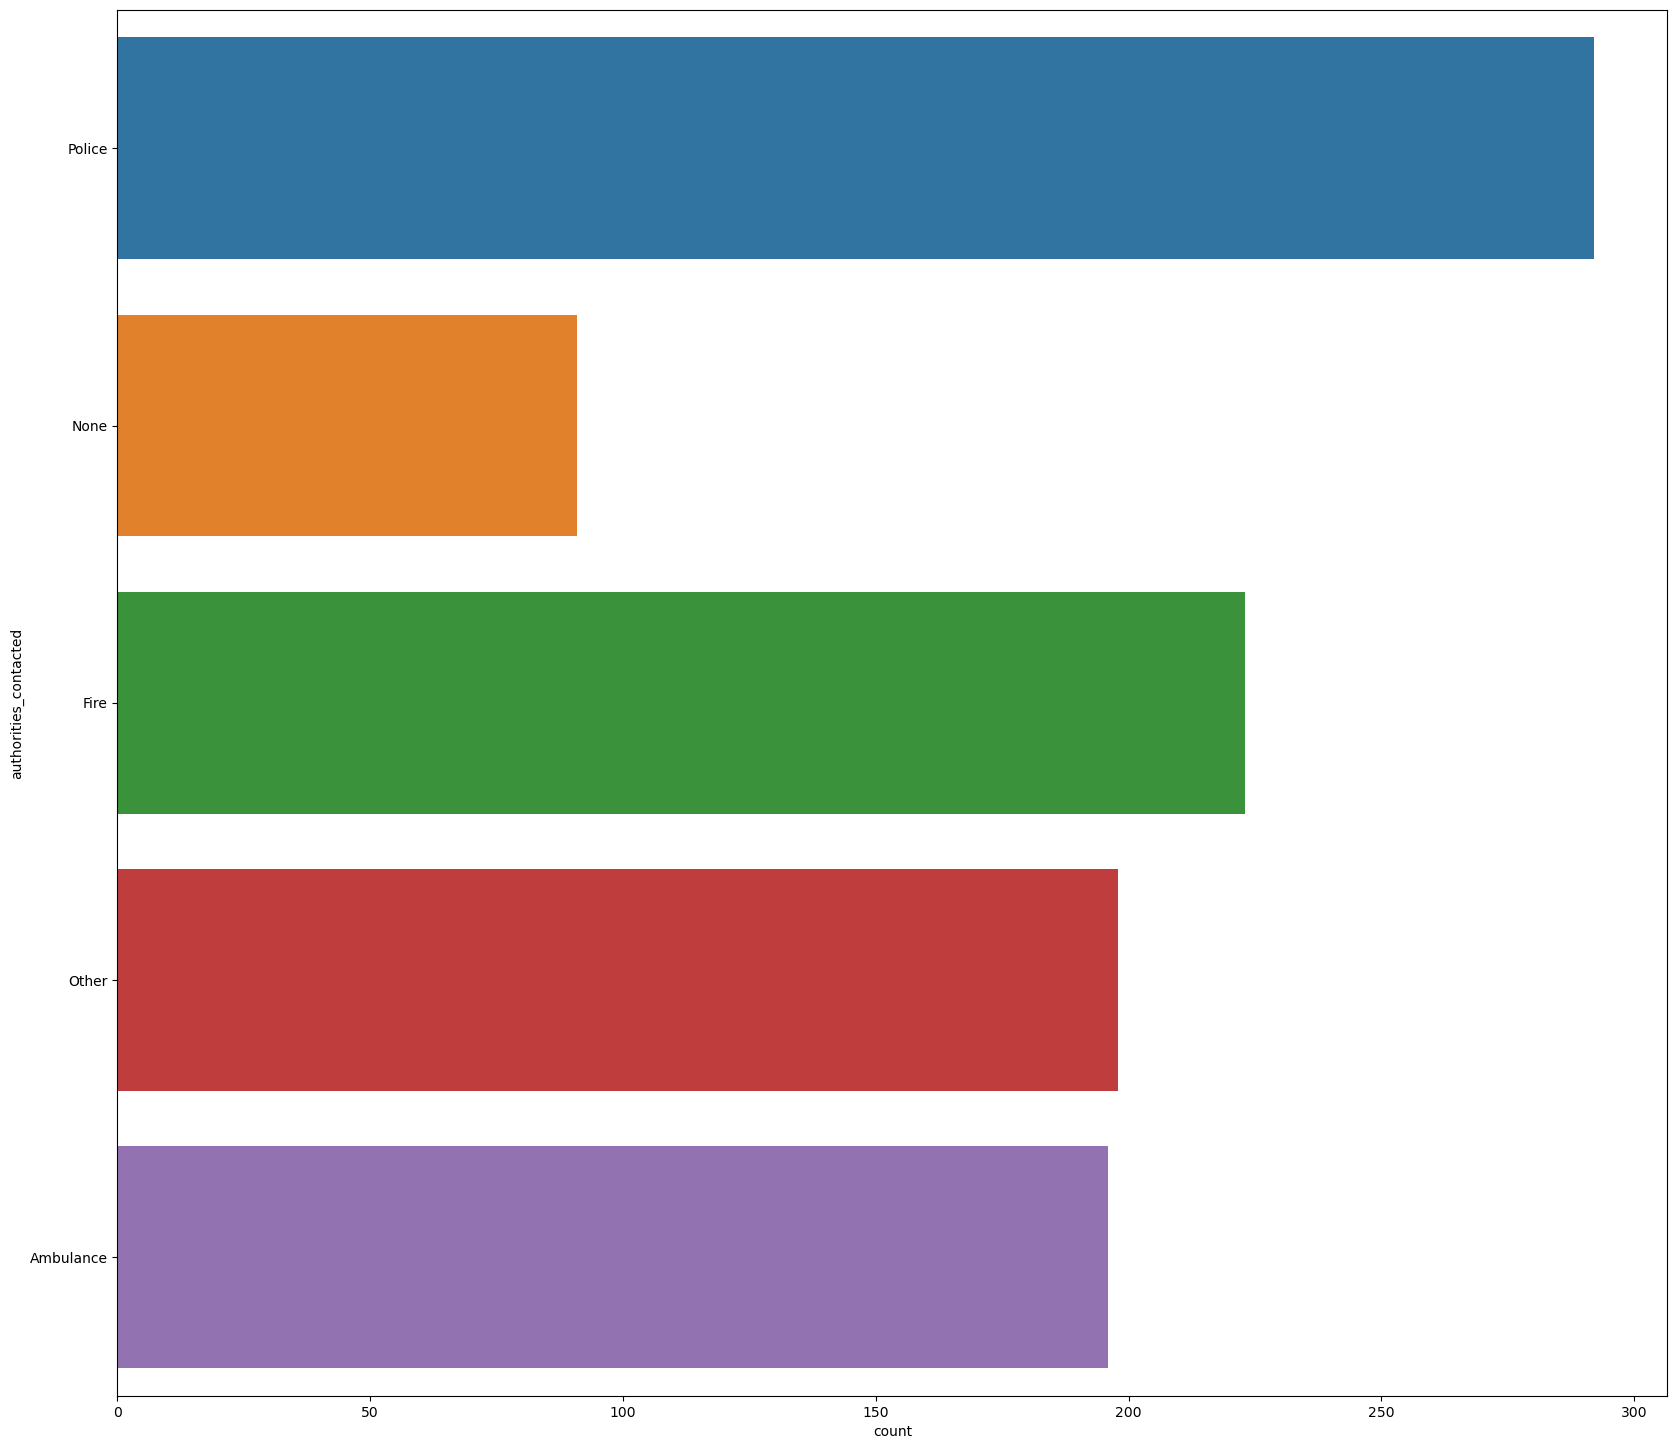

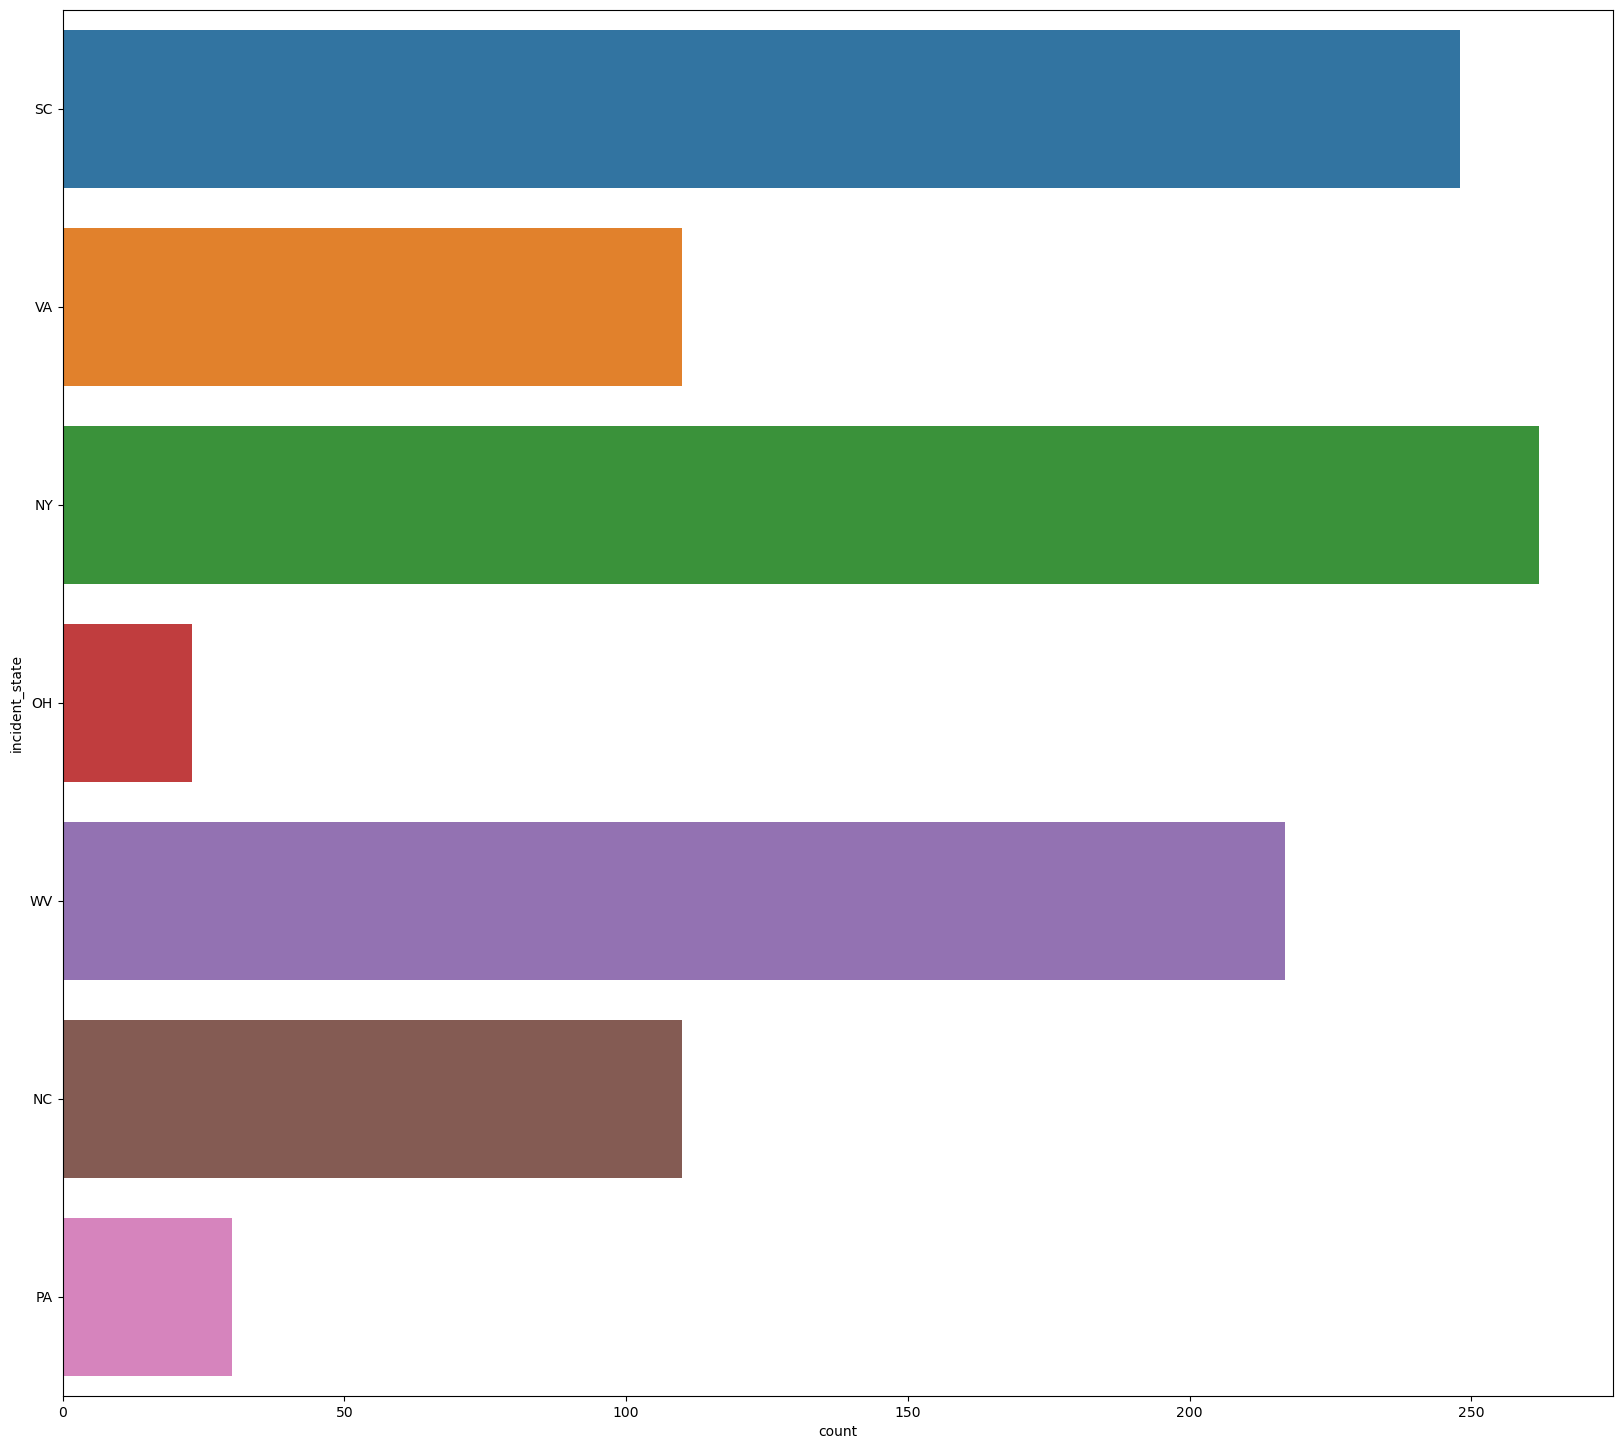

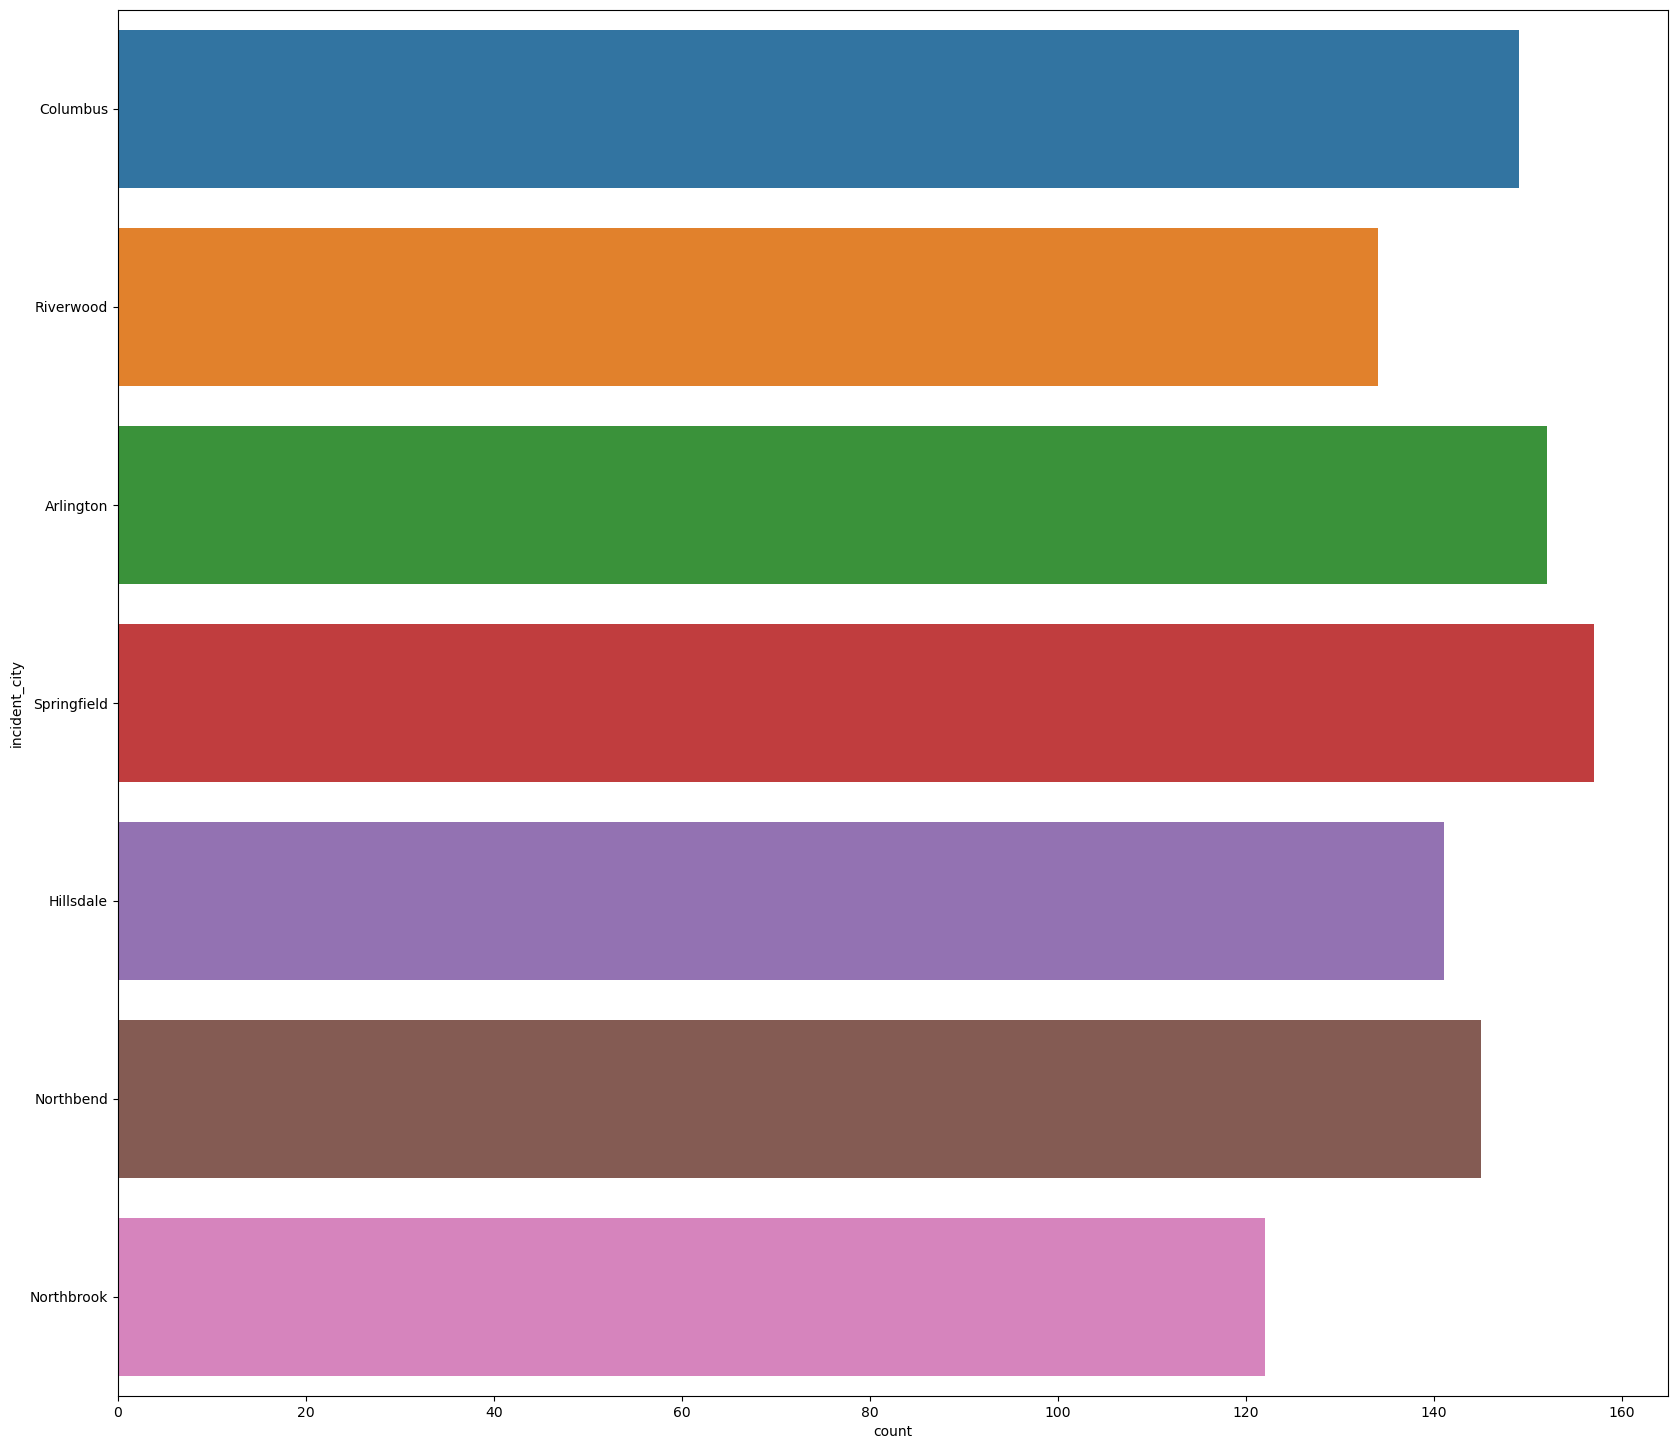

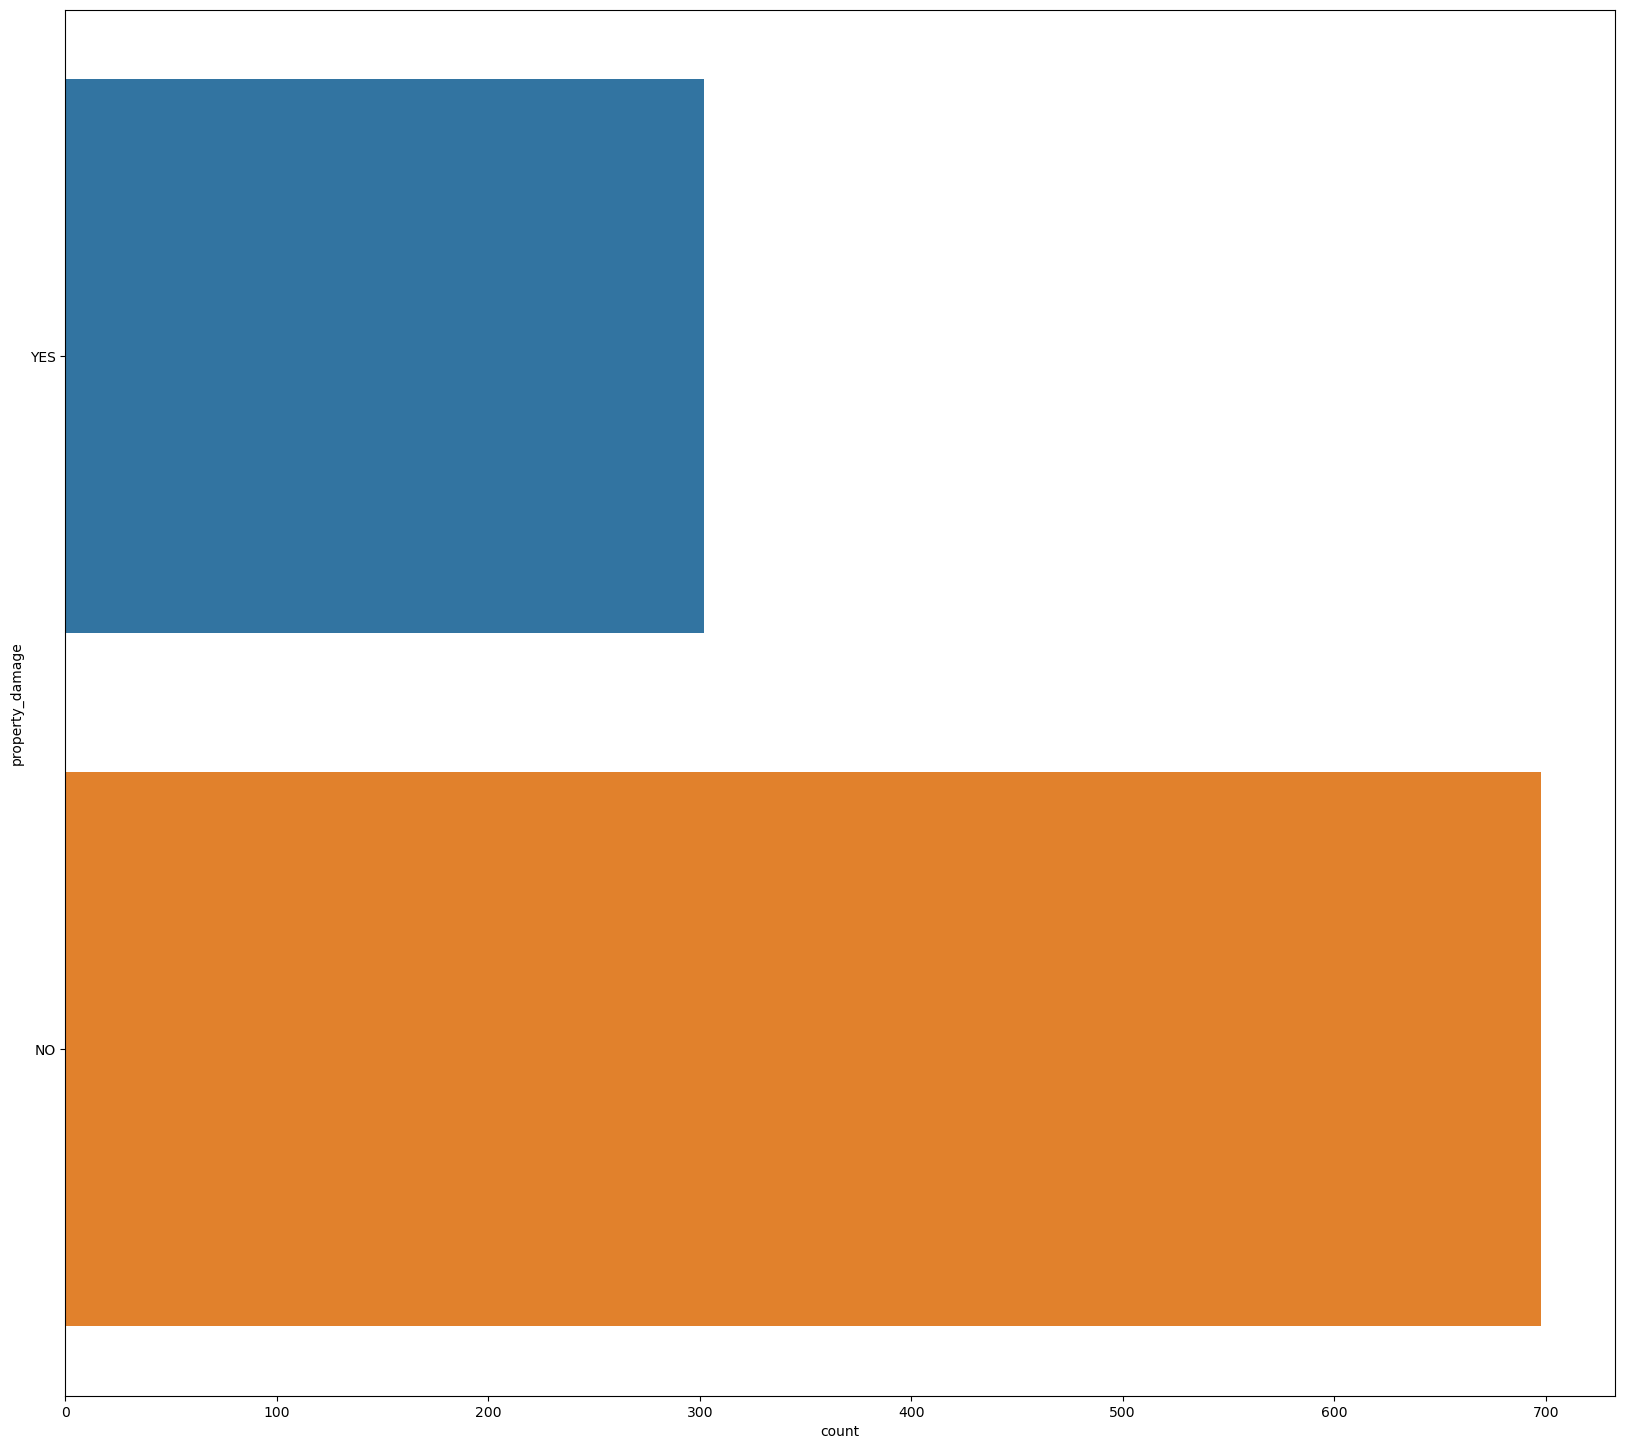

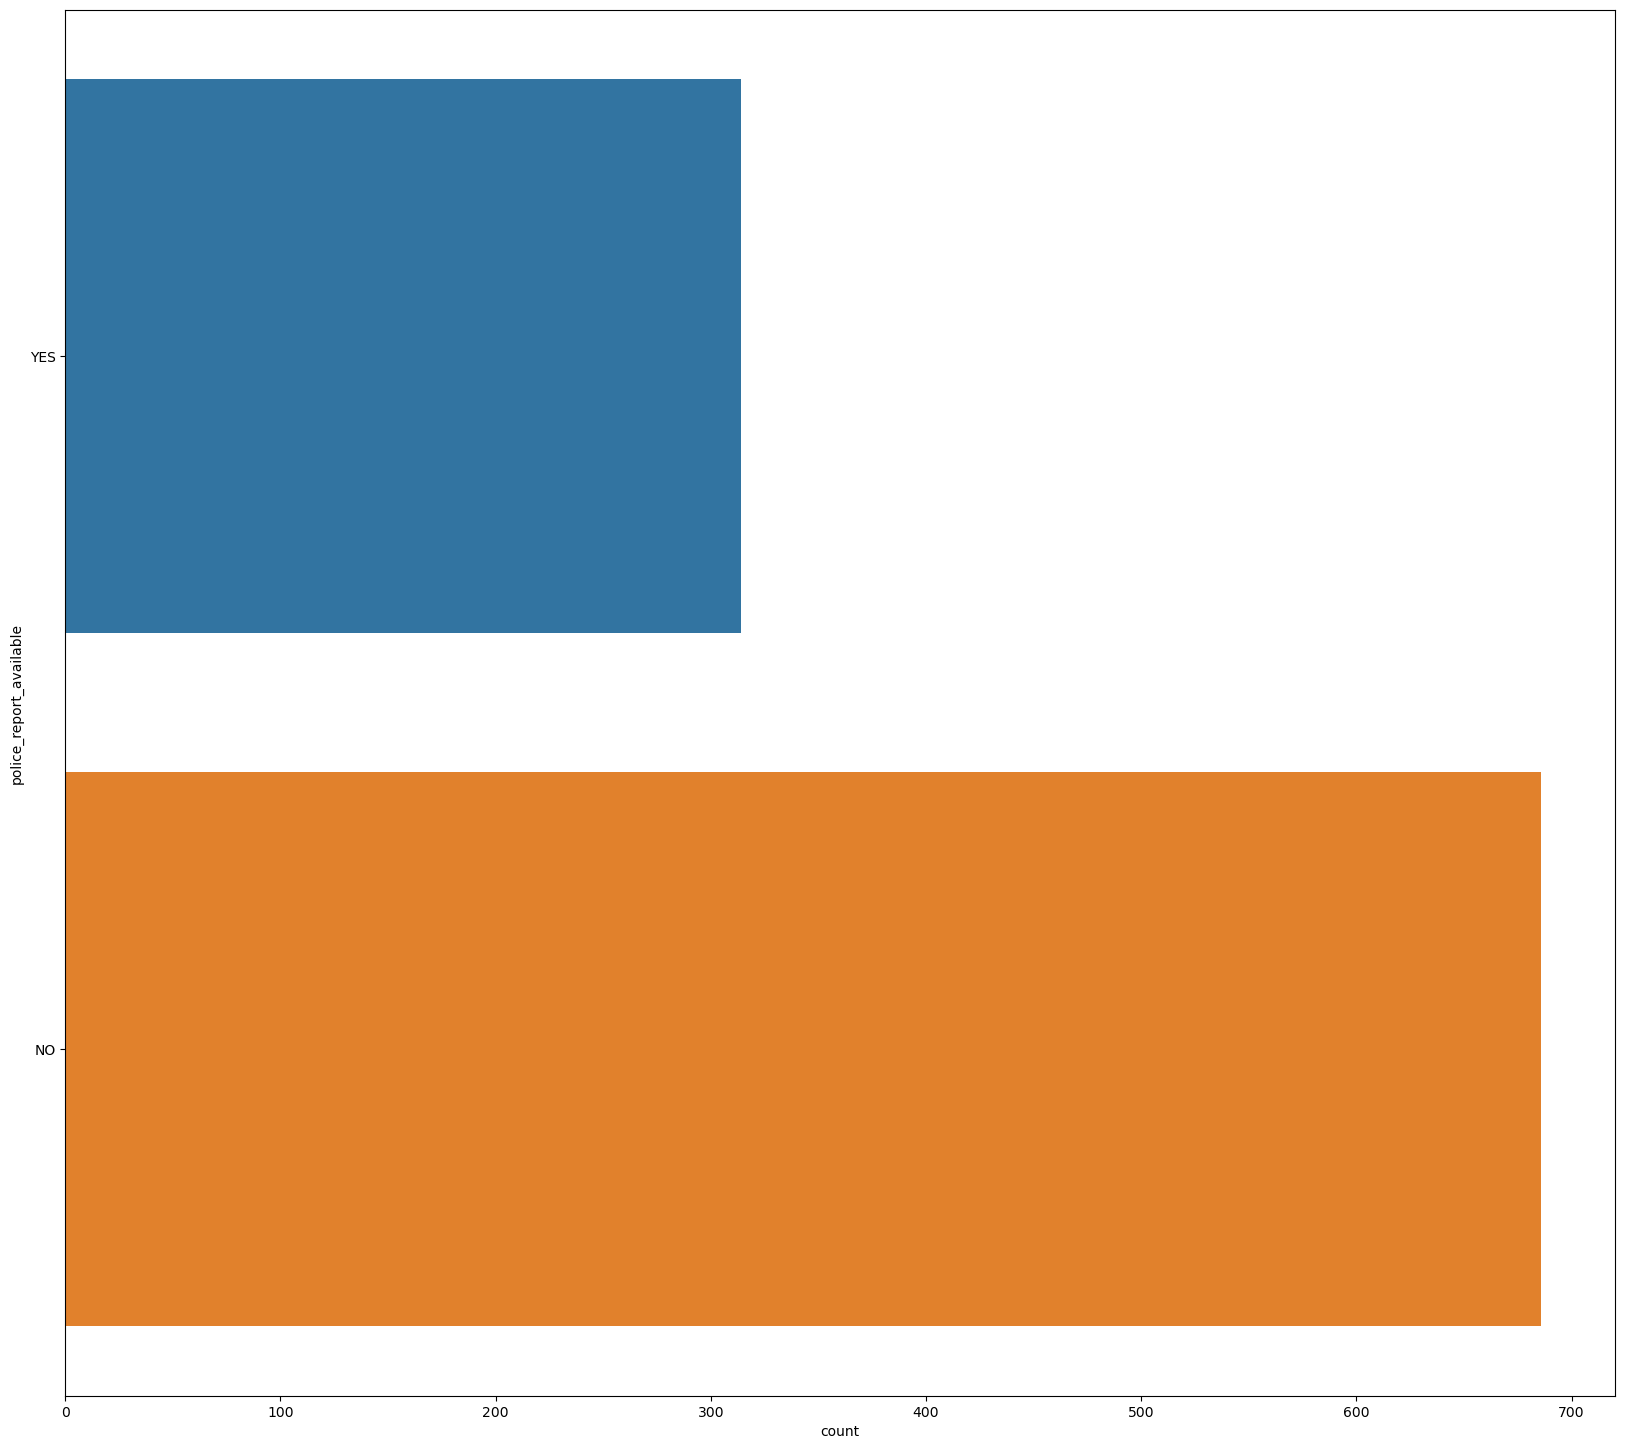

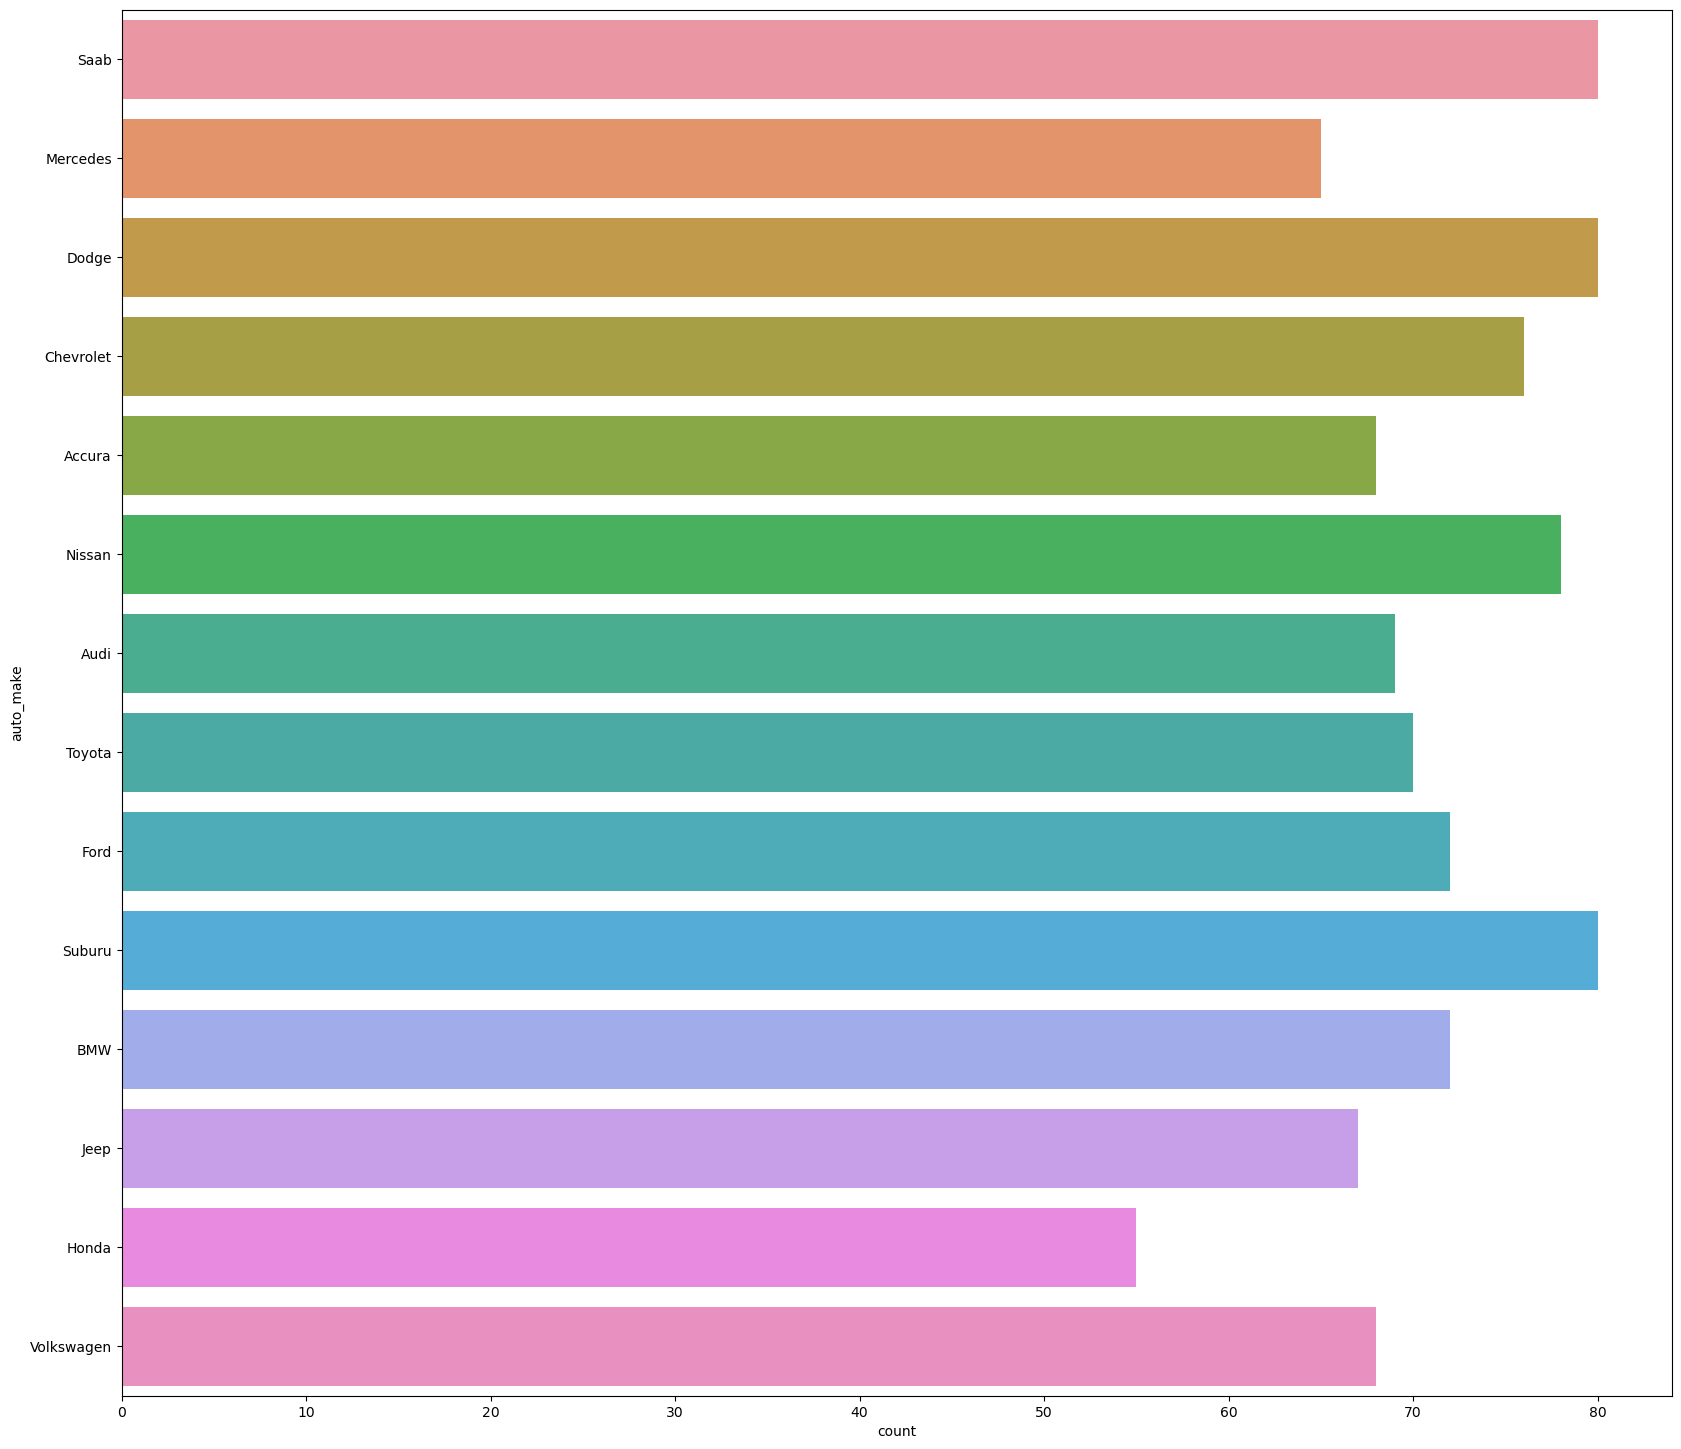

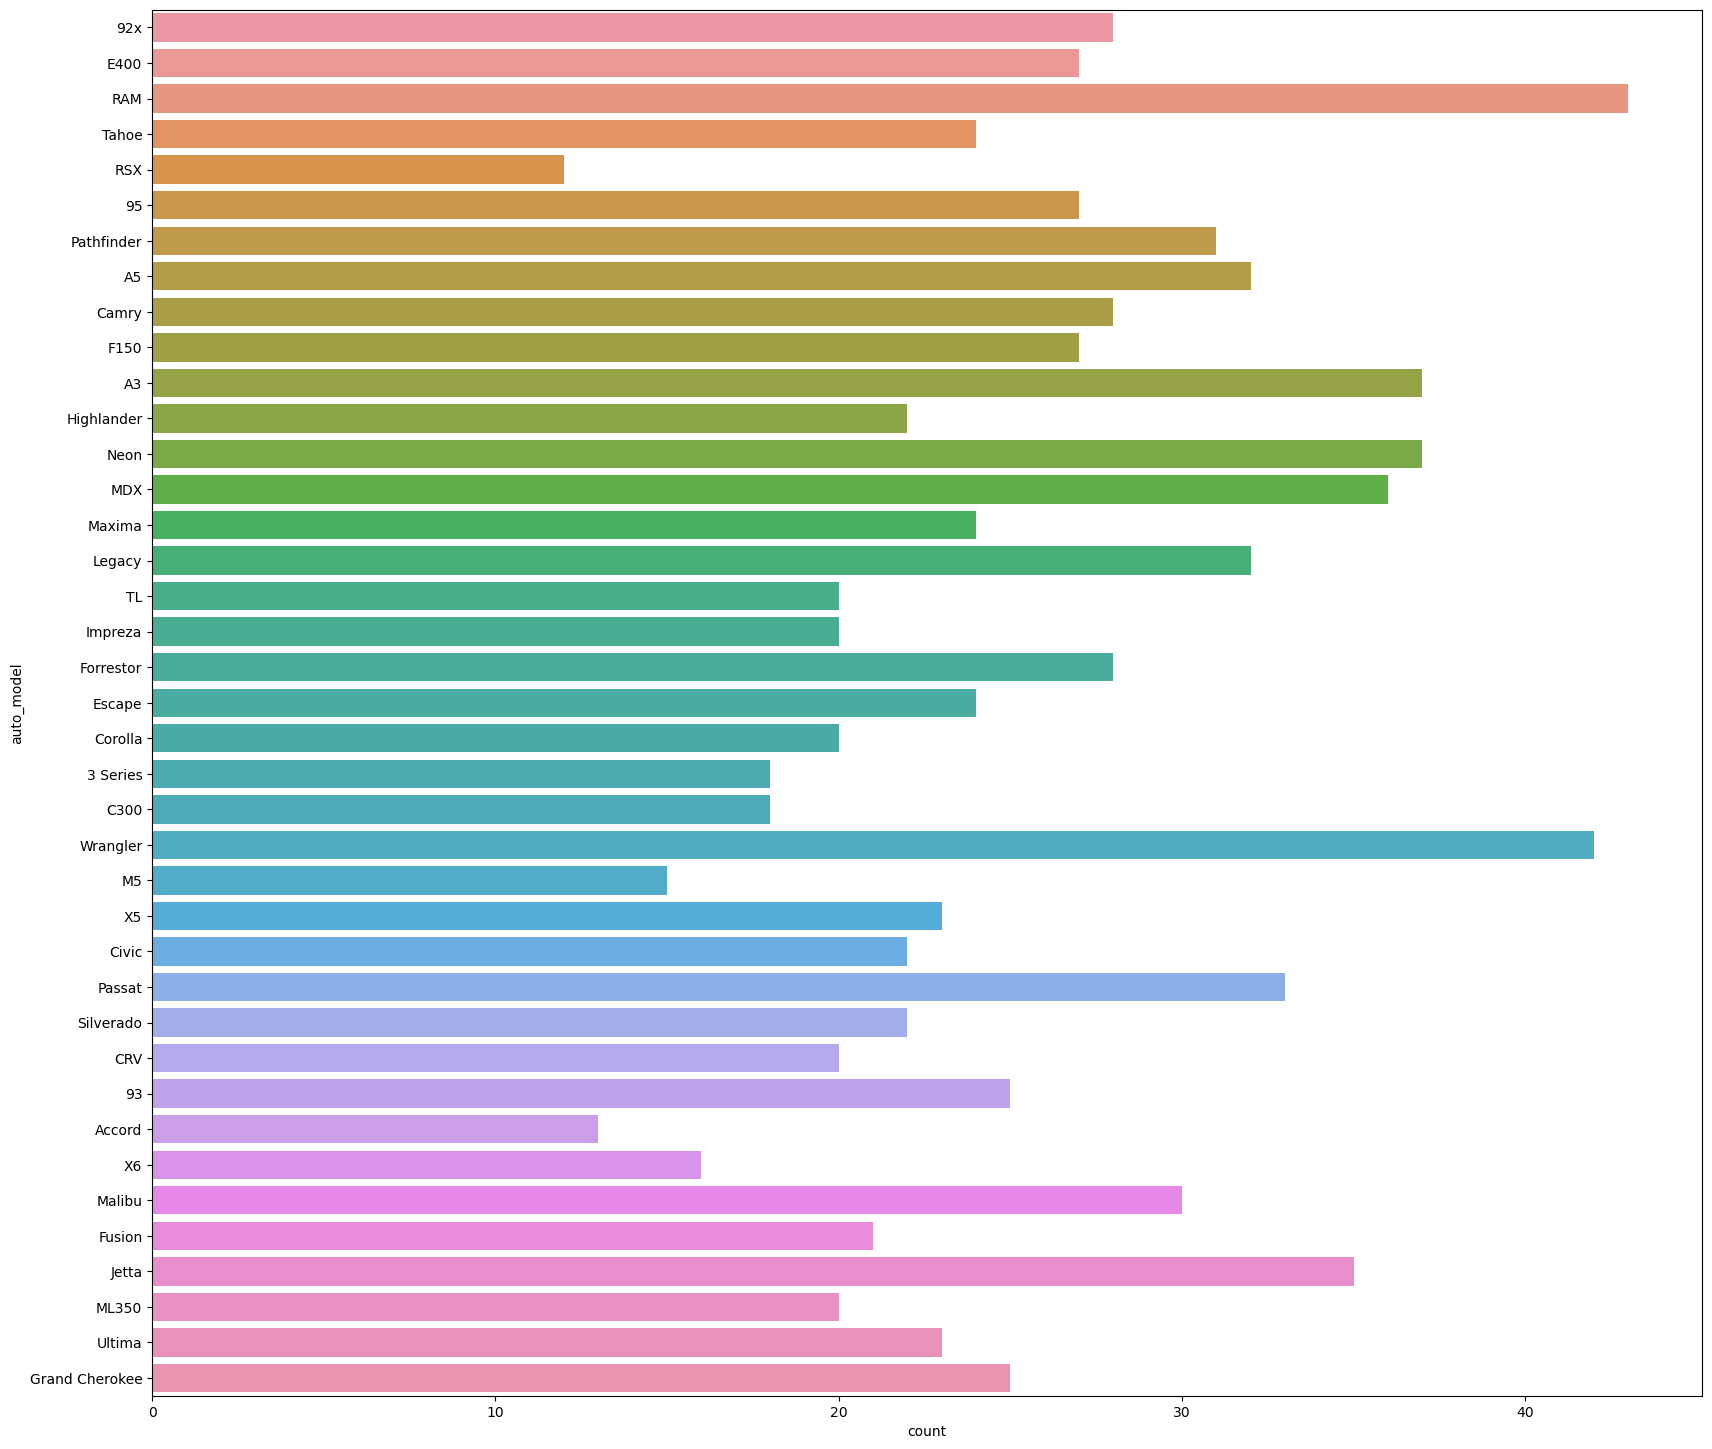

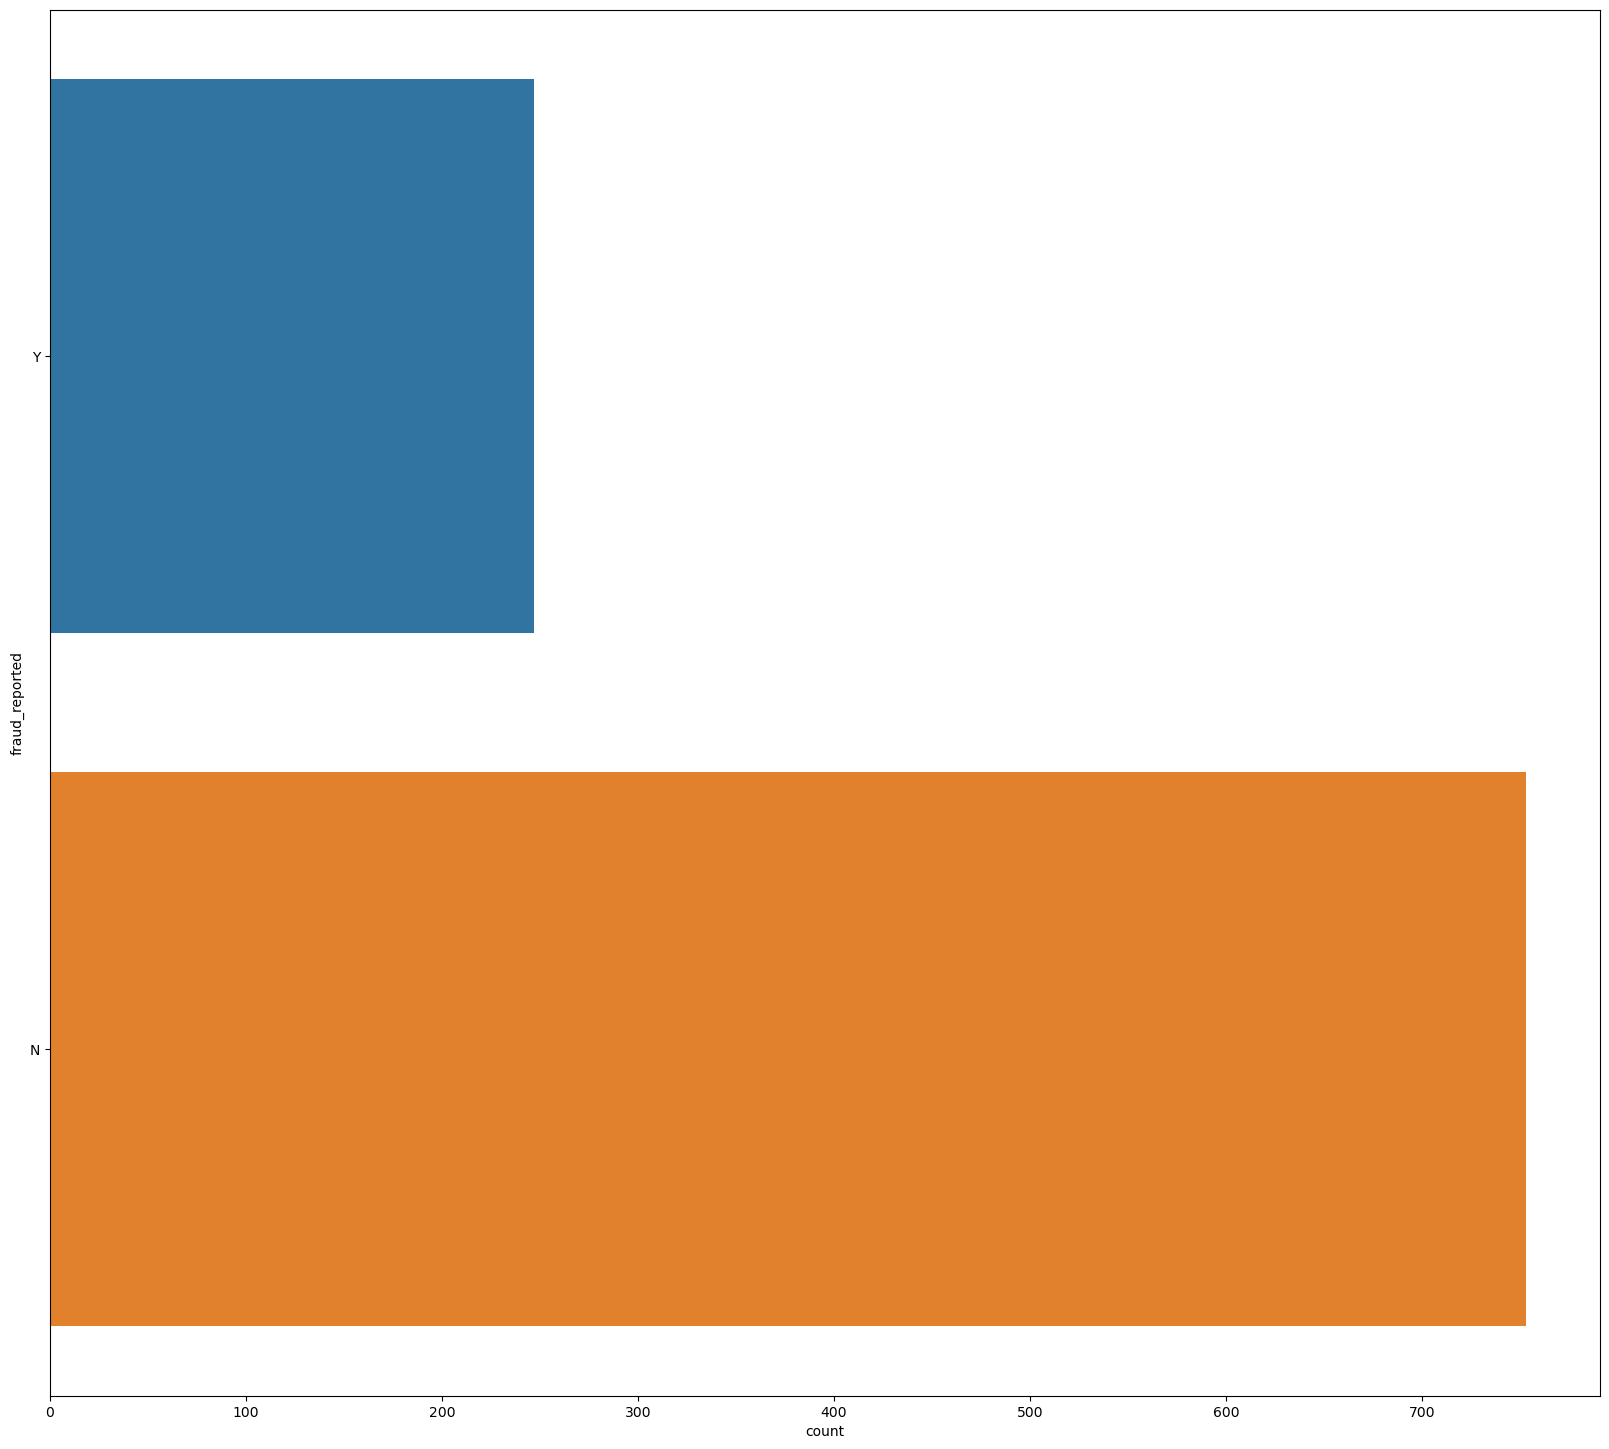

In [72]:
for col in cat_features :
    plt.figure(figsize=(20,18))
    sns.countplot(y=cat_features[col])
    plt.show()

## Observations

* policy_csl: Combined single limit is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident. Csl is distributed aslmost equal in all the categories.

* Insured_sex : we can see most of the isured are Female. The count is greated than 500

* Insured_education_level: High school and JD are same and higher than other numbers, data is distributed is all categories.

* insured_occupation: Machine-op-inspct are more in number, after the we have considerable numbers for prof-spefialty, . tech support and sales.

* insured_hobbies : Insurred with hobbies as reading are higher in number, so tendency to fraud is higher.

* insured_relationship : Husband , not in family and other relatives have higher tendency to fraud.

* incident_date: we can see 02-02-2015 reported higher incident.

* incident_type: We can see Single-vehicle collision and Multi__vehicle- collision are the main incident types.

* incident_severity : Numbers with minor damage are high.

* authorities_contacted: Most of the cases police is contacted first.

* incident_state: Mostly incident happen at NY and SC

* incident_city : Springfield recoded the higher number of incident

* property_damage : Near about 700 cases reported no property damage.

* police_report_available: For near about 700 cases reported, plocie report not availble.

* auto_make: Saab, Mercedes and Siburu are most common auto make

* auto_model: incident report for RAM is higher.

In [73]:
num_feature= data.select_dtypes(include=[np.number])

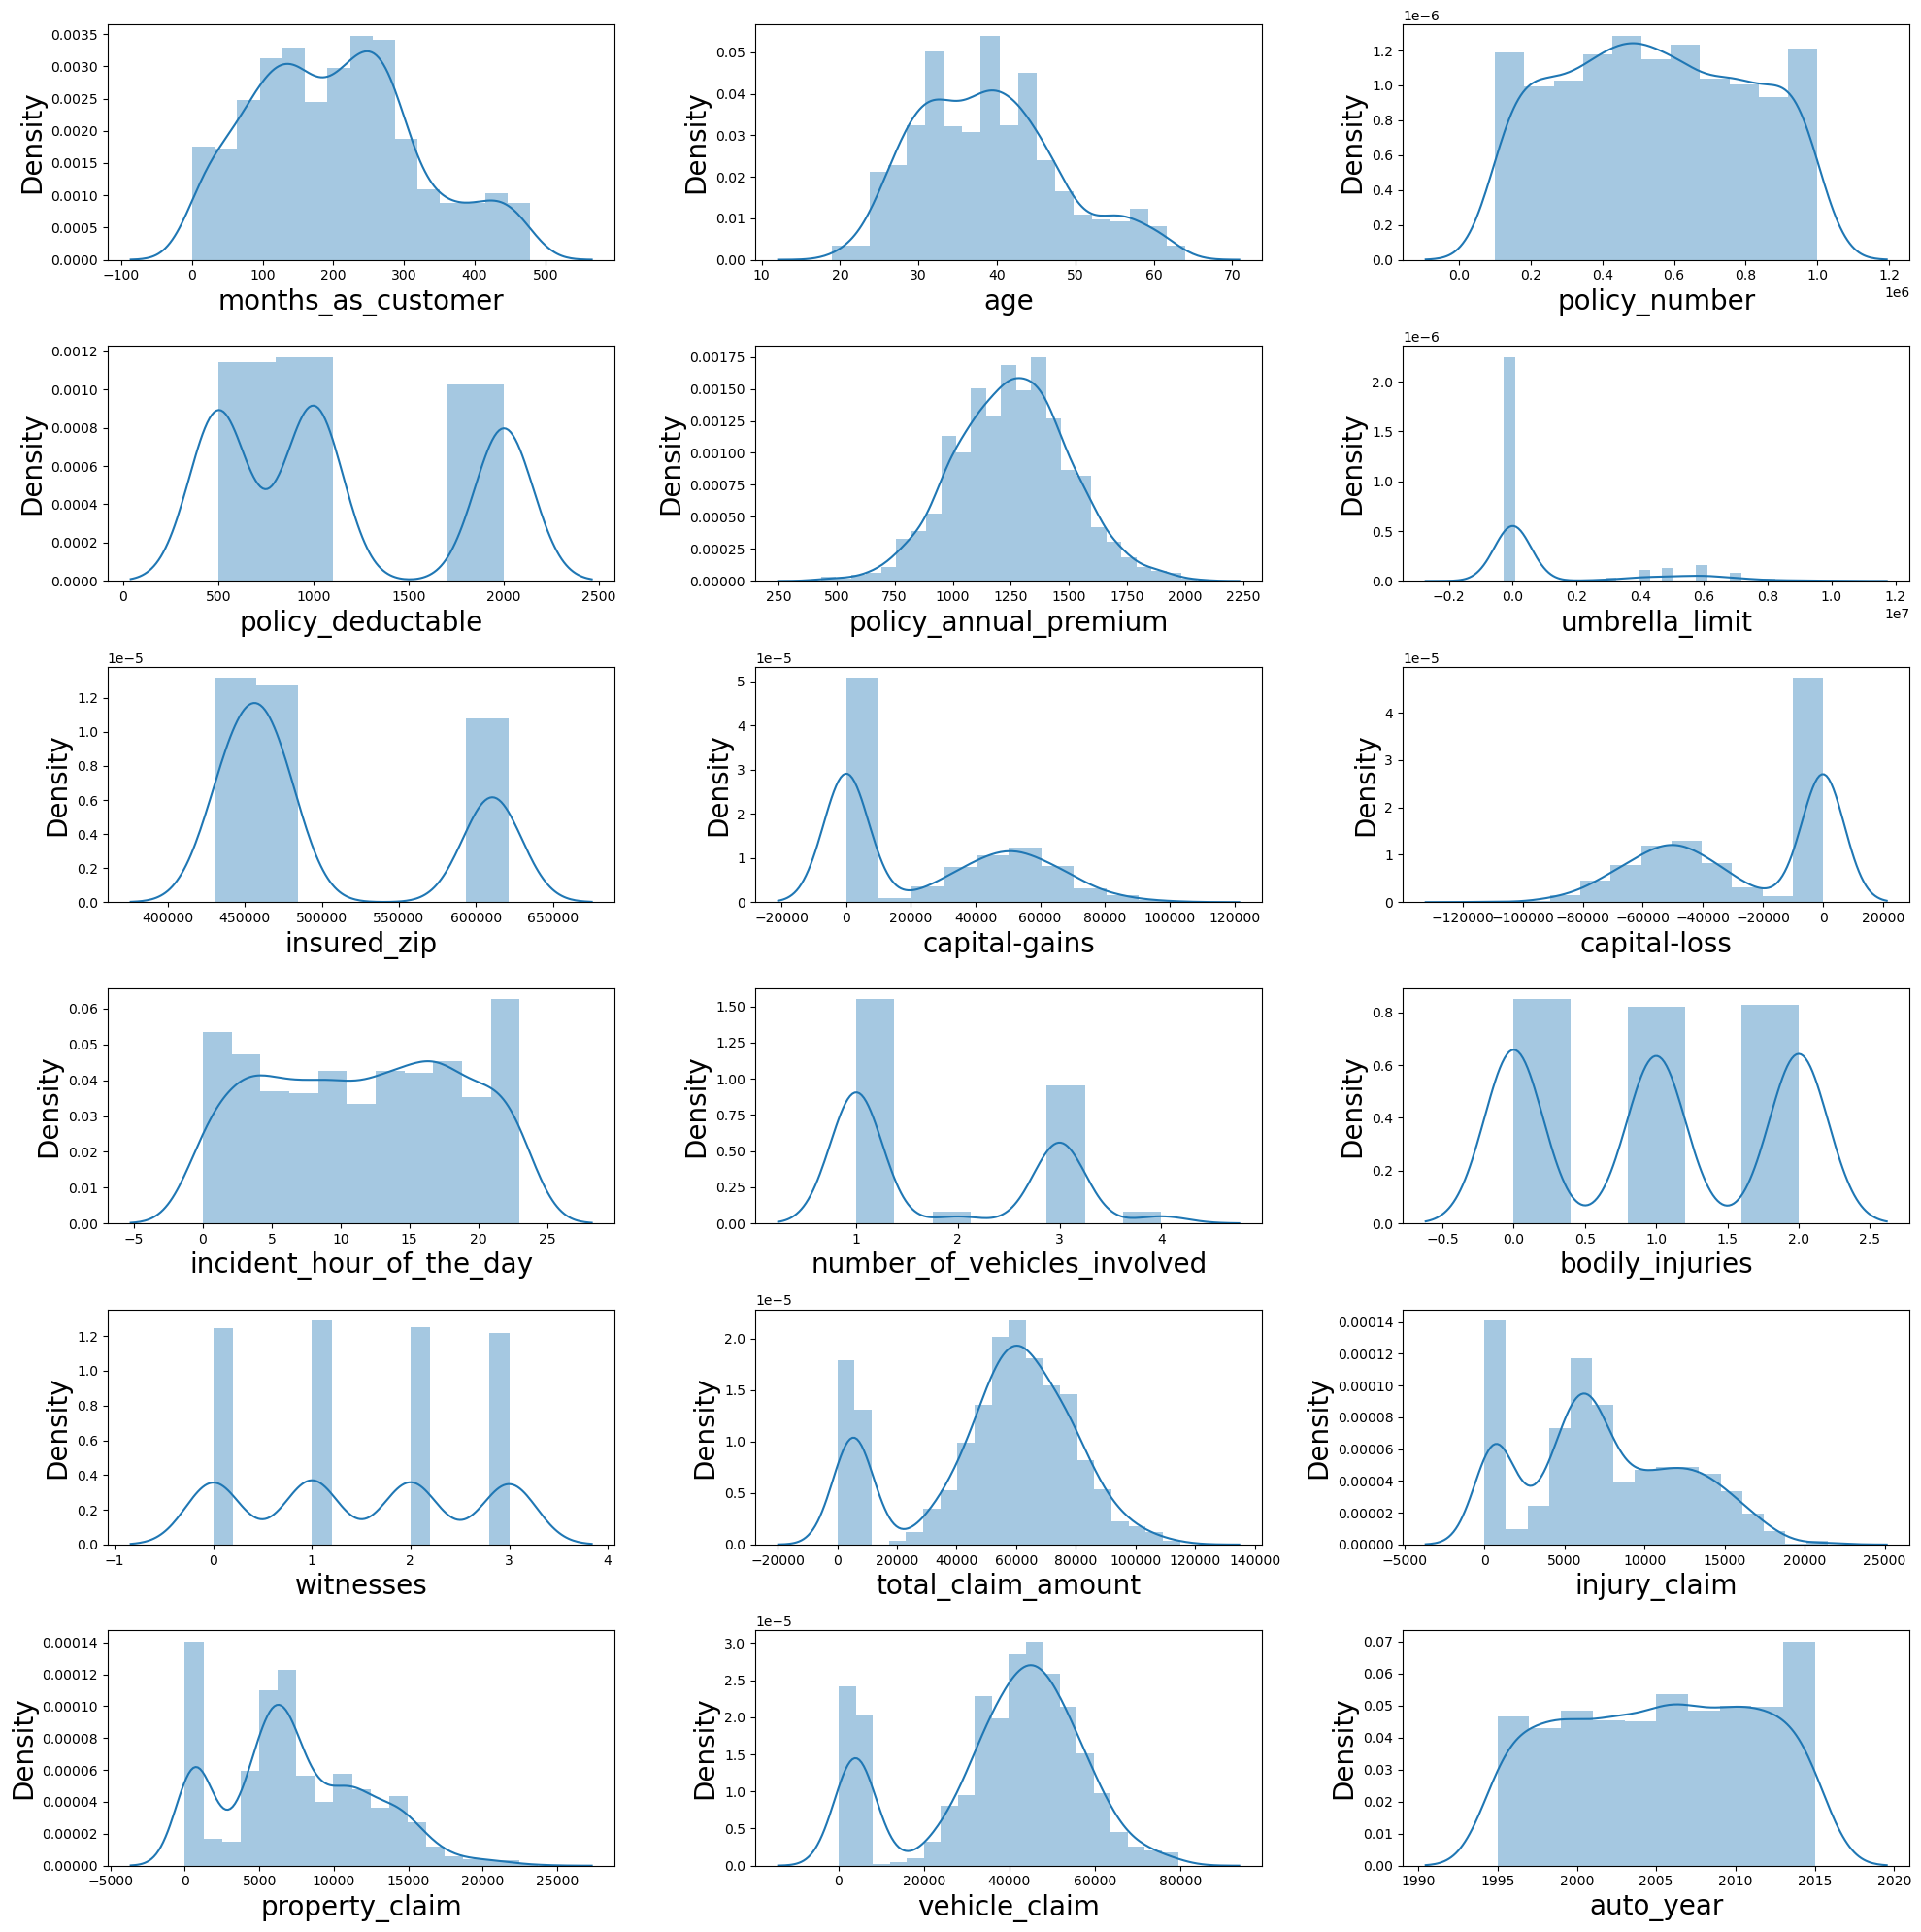

In [74]:
plt.figure(figsize=(20,20))
plotnumber= 1

for column in num_feature:
    if plotnumber<=18:
        ax= plt.subplot(6,3, plotnumber)
        sns.distplot(num_feature[column])
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

## Bivariate analysis

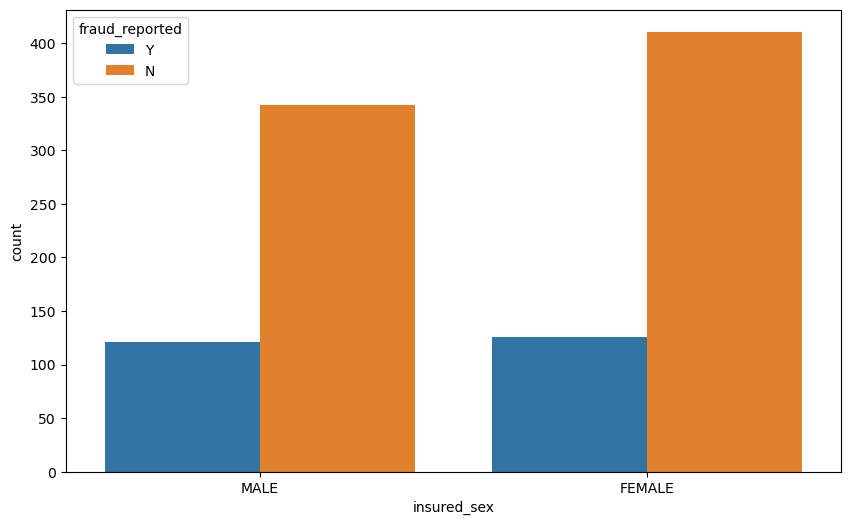

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_sex', data= data, hue='fraud_reported')
plt.show()

Male and female are equaly claiming fraud claim

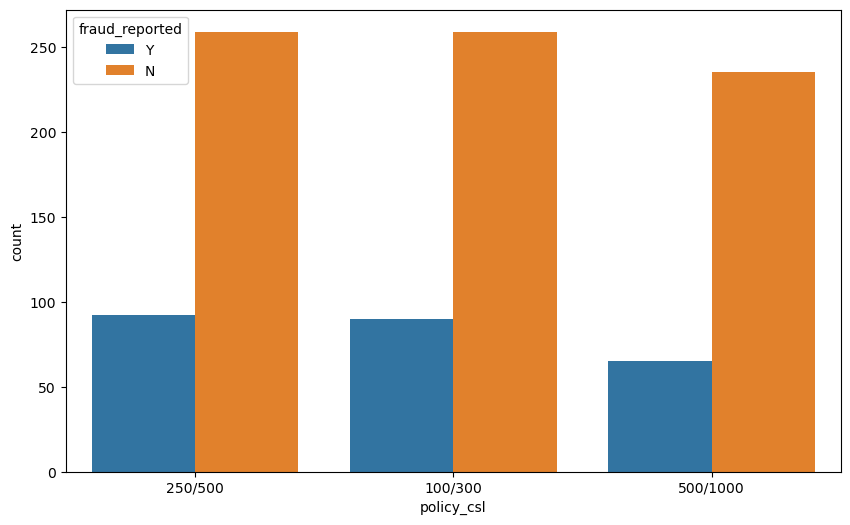

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_csl', data= data, hue='fraud_reported')
plt.show()

Fraud claims are more in 250/500 and 100/300

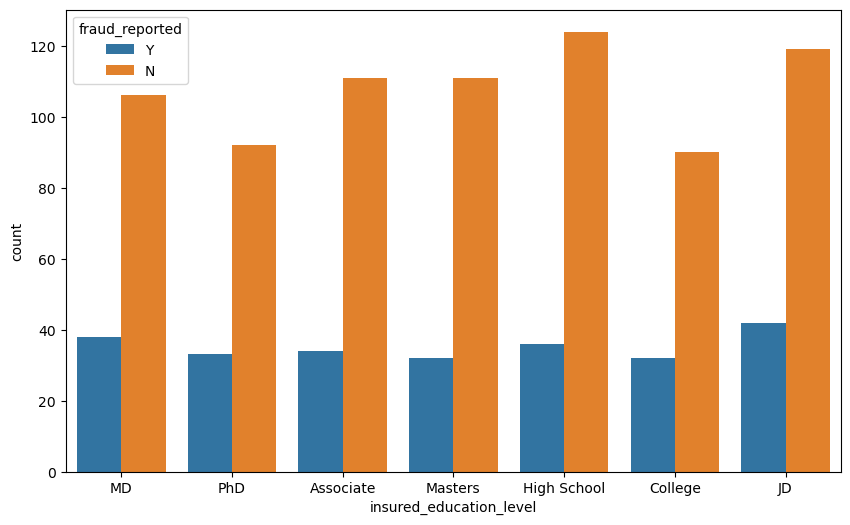

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_education_level', data= data, hue='fraud_reported')
plt.show()

customers with insured_education_level as JD are more likely to claim fraud insurance

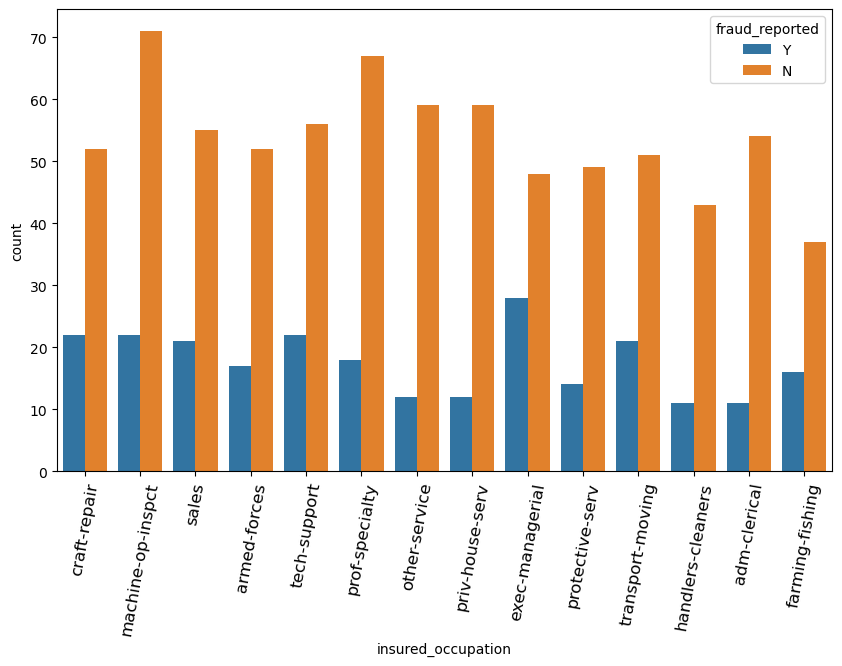

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_occupation', data= data, hue='fraud_reported')
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Customers with occupation as Exec-managerial are more likely to claim fraud Insurance.

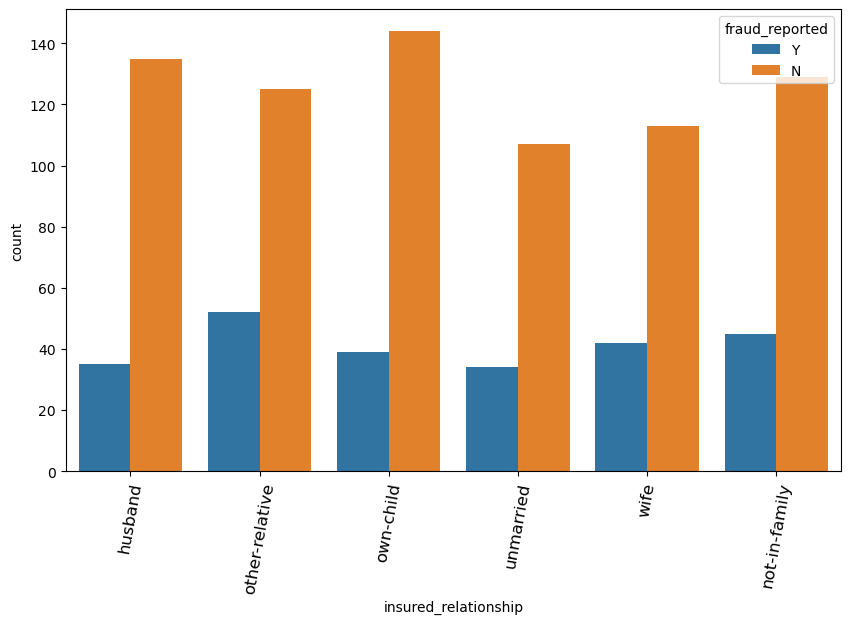

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_relationship', data= data, hue='fraud_reported')
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Other Relatives and Not- in- Family are more likely to claim Fraud Insurance.

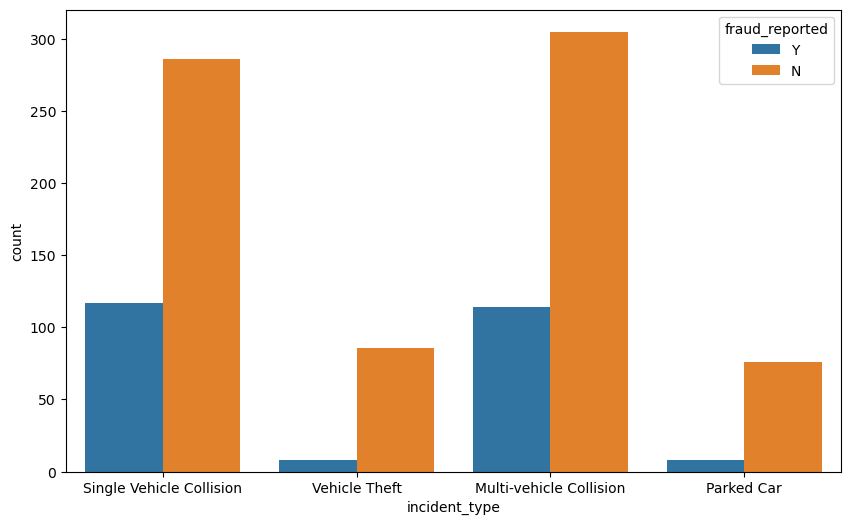

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_type', data= data, hue='fraud_reported')
plt.show()

In case of Single and Multivehicle collision, chance of Fraud Claim are high.

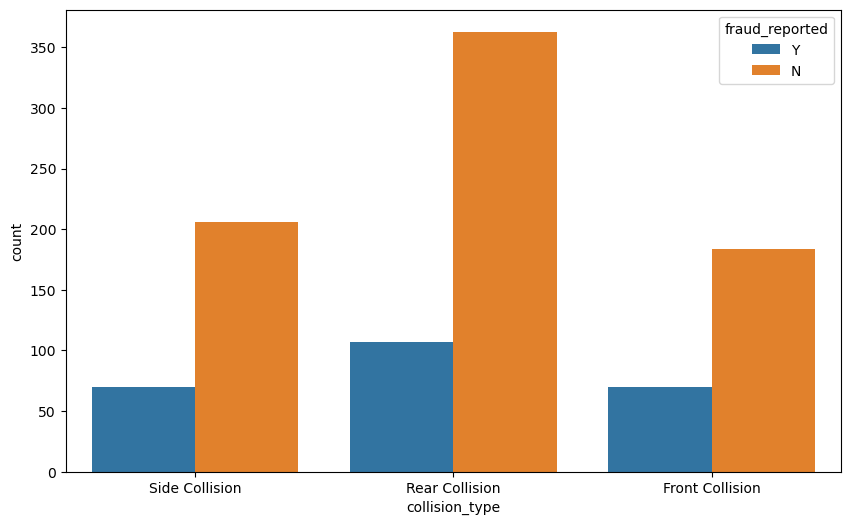

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='collision_type', data= data, hue='fraud_reported')
plt.show()

We can see in case of Rear_collision chances of Fraud calim are higher.

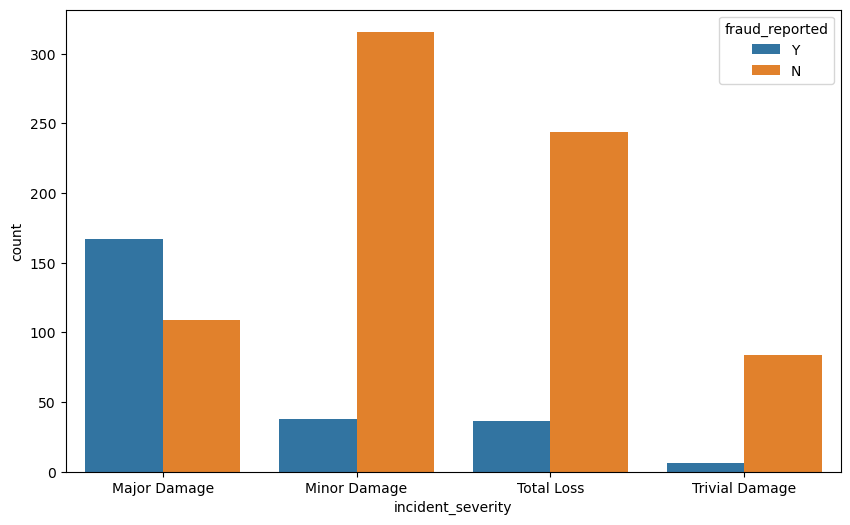

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_severity', data= data, hue='fraud_reported')
plt.show()

Here we can see in case of major damage, Chances of Fraud claim insurance is highest.

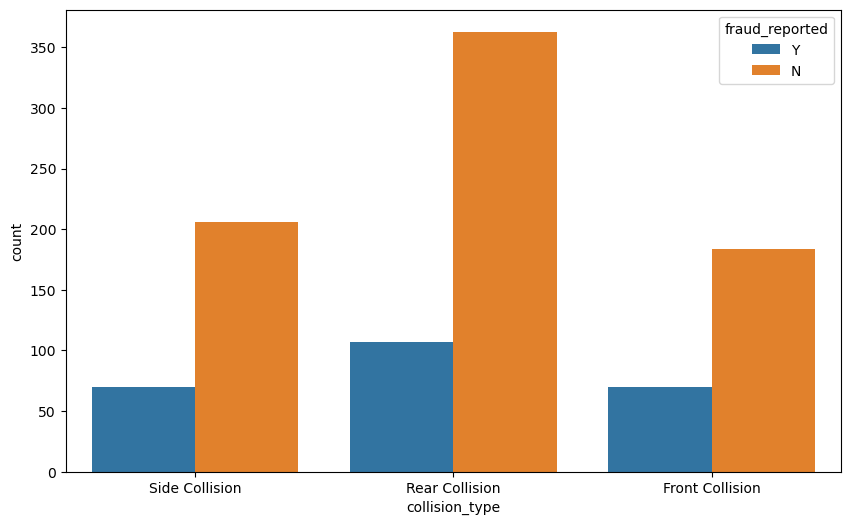

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='collision_type', data= data, hue='fraud_reported')
plt.show()

We can see in case of Rear_collision chances of Fraud calim are higher.

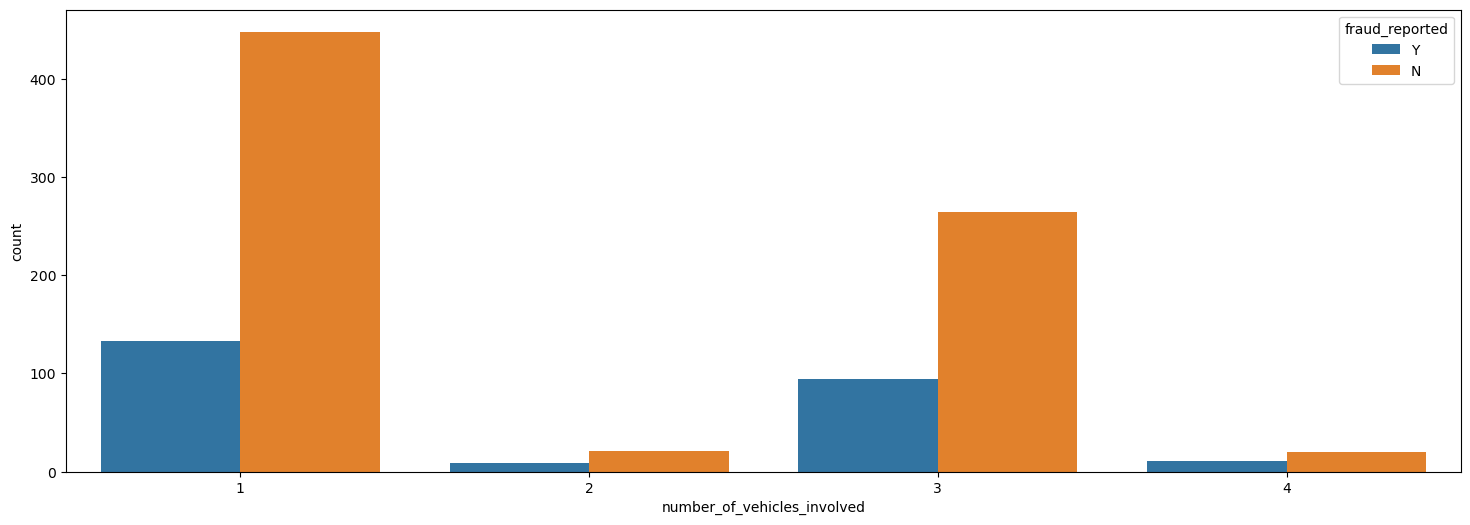

In [84]:
plt.figure(figsize=(18, 6))
sns.countplot(x='number_of_vehicles_involved', data= data, hue='fraud_reported')
plt.show()

Incident with three vehicles are more likely have Fraud claim

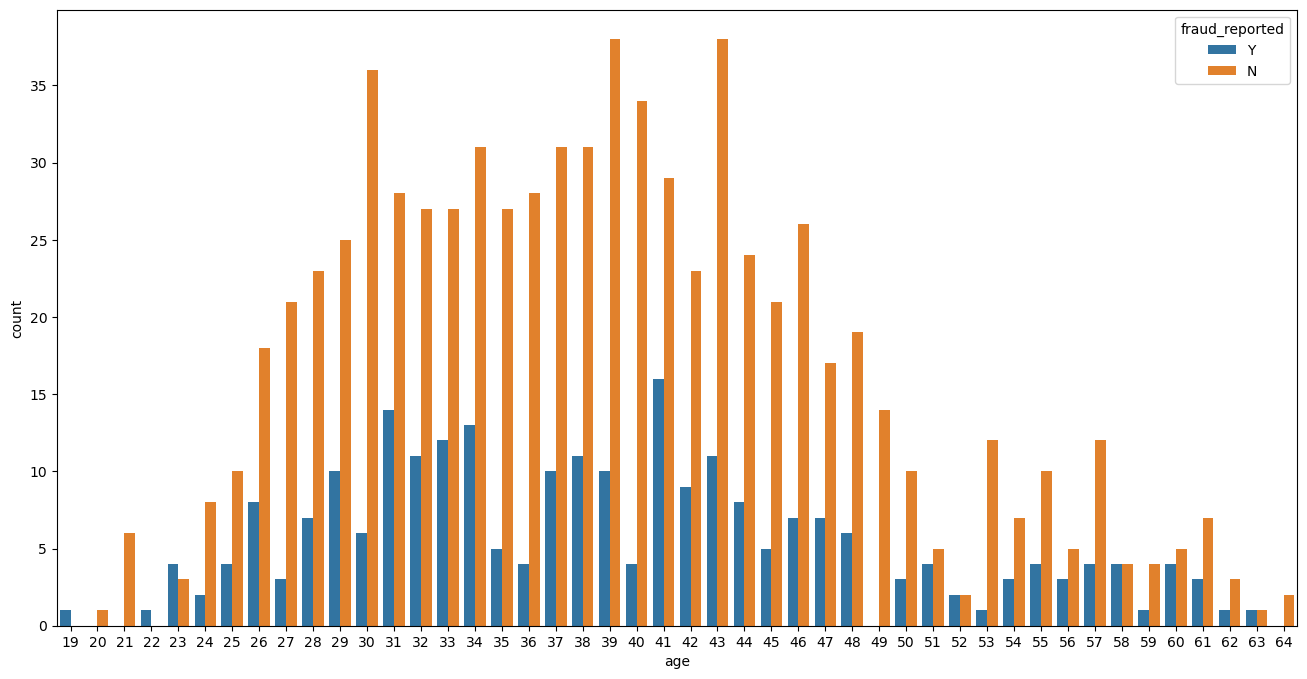

In [85]:
plt.figure(figsize=(16,8))
sns.countplot(x='age', data= data, hue='fraud_reported')
plt.show()

Age group 30 t0 43 are more likely to have Fraud claim.

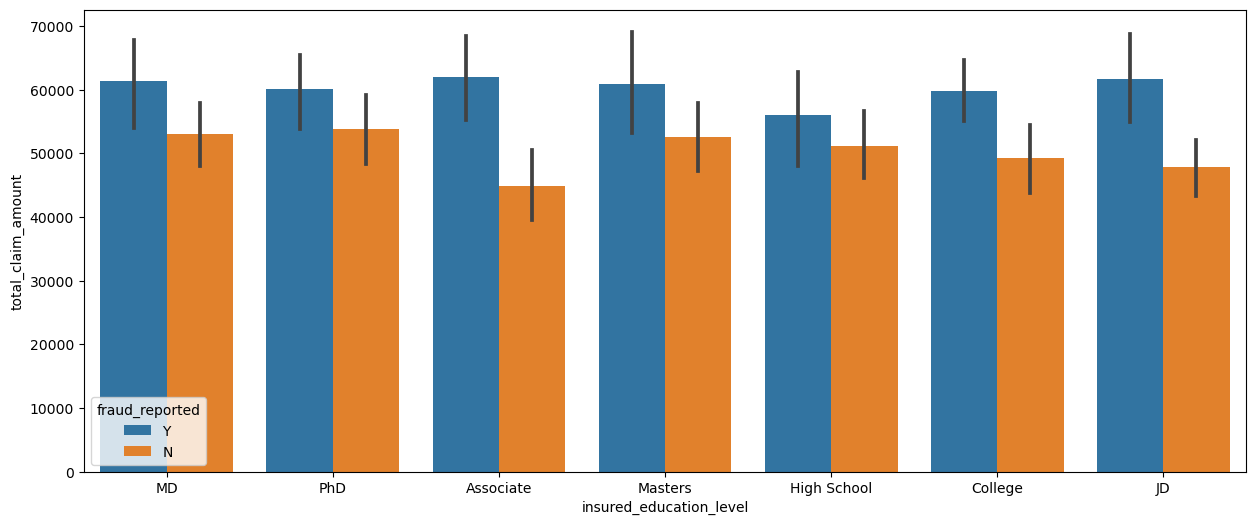

In [86]:
plt.figure(figsize=(15,6))
sns.barplot(x='insured_education_level',y='total_claim_amount',hue='fraud_reported',data=data)
plt.show()

Here we can see Associate , JD, MD and Masters are claiming almost same amount As Fraud claim Insurance.

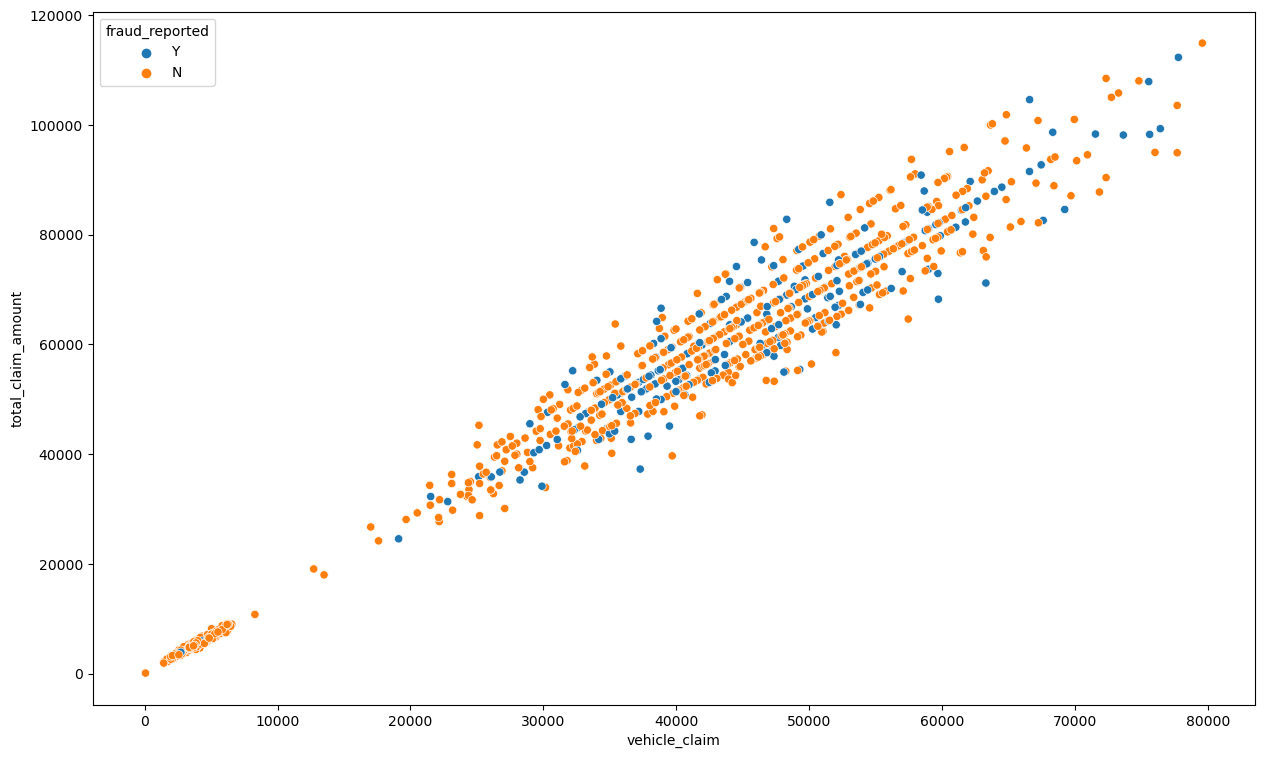

In [87]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='vehicle_claim', y='total_claim_amount',hue='fraud_reported',data=data)
plt.show()

<Figure size 2500x2000 with 0 Axes>

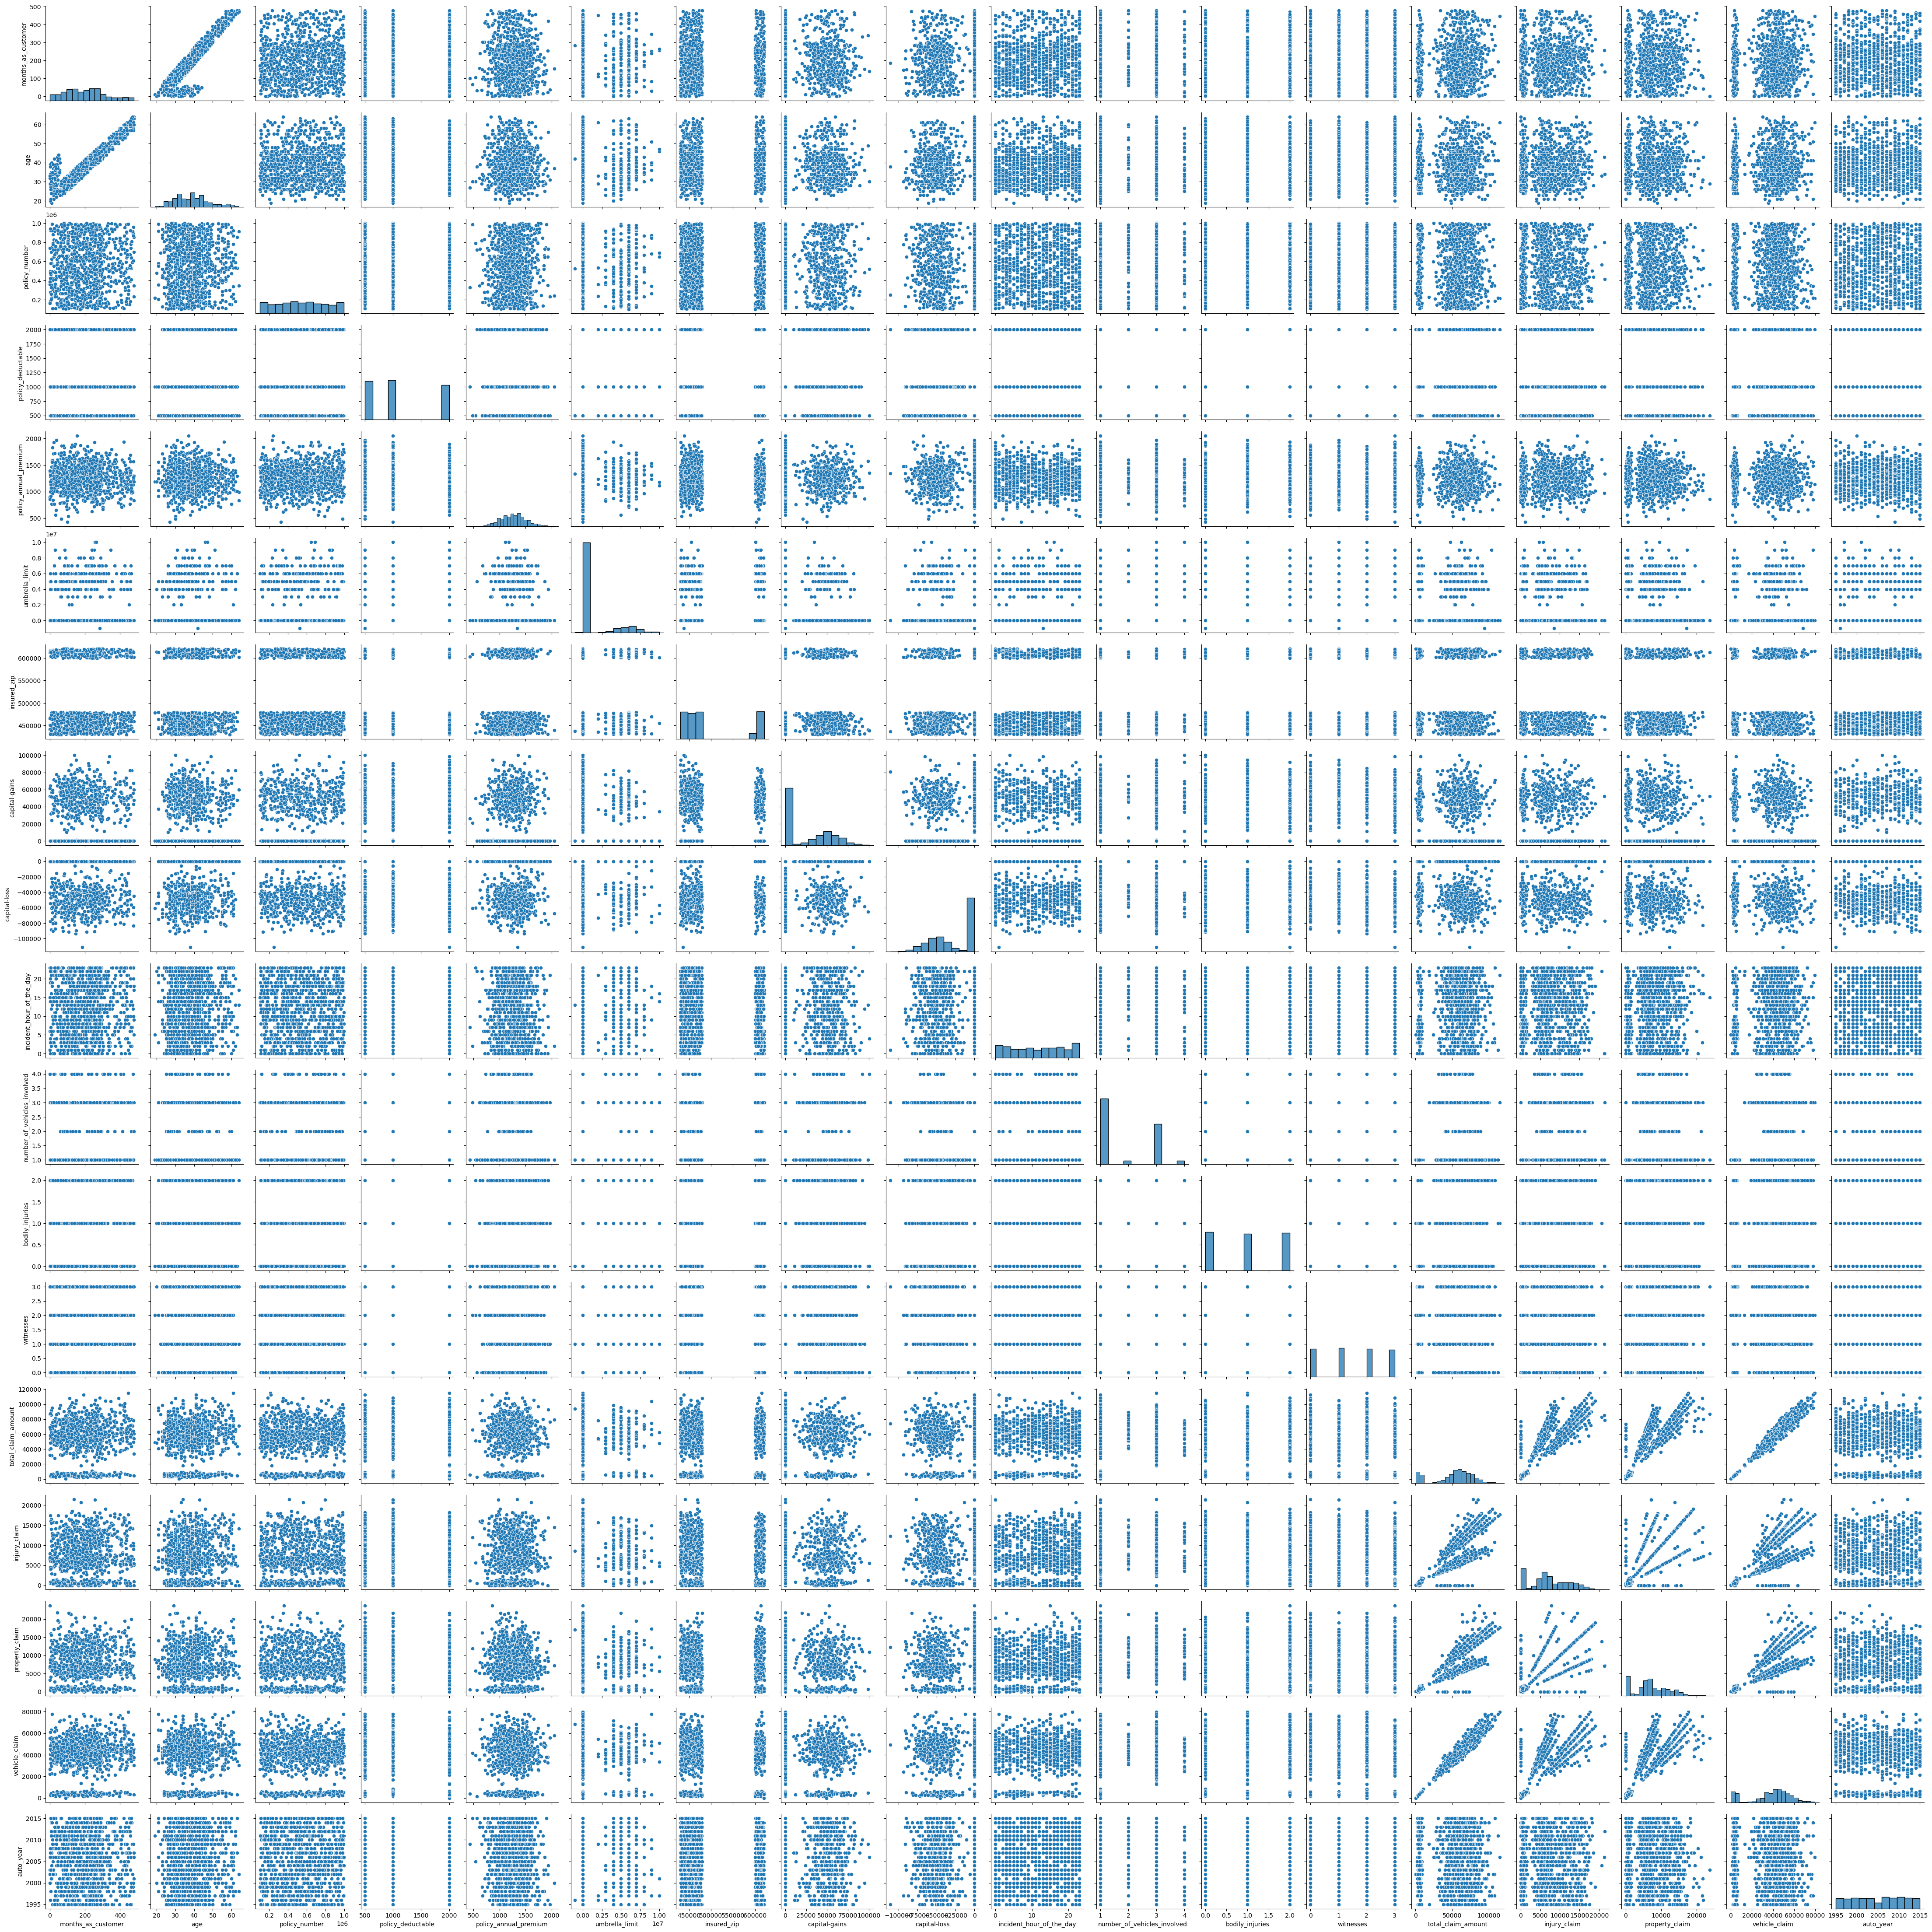

In [88]:
plt.figure(figsize= (25,20))
sns.pairplot(data= data);

# Data preprocessing
## We will first drope the columns not having relevance with the Target.

## From above analysis we came to conclusion that months_as_customer, policy_number,policy_bind_date , incident_date, incident_location,auto_model, auto_year are not having direct relation with Fraud_reported.

In [89]:
data.drop(['months_as_customer', 'policy_number','policy_bind_date', 'incident_date', 'incident_location','auto_model', 'auto_year','auto_make', 'umbrella_limit', 'insured_zip'], axis= 1 , inplace= True)

In [90]:
features=data.drop('fraud_reported', axis=1)
target= data['fraud_reported']

In [91]:
df= pd.get_dummies(features,sparse=False, drop_first=True )

In [92]:
df.shape

(1000, 87)

In [93]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)

In [94]:
df['fraud_reported']= Target

In [95]:
df.head()

age  policy_deductable  policy_annual_premium  capital-gains  capital-loss  \
0   48               1000                1406.91          53300             0   
1   42               2000                1197.22              0             0   
2   29               2000                1413.14          35100             0   
3   41               2000                1415.74          48900        -62400   
4   44               1000                1583.91          66000        -46000   

   incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
0                         5                            1                1   
1                         8                            1                0   
2                         7                            3                2   
3                         5                            1                1   
4                        20                            1                0   

   witnesses  total_claim_amount  ...  incident_state_WV  \
0          2               71610  ...                  0   
1          0                5070  ...                  0   
2          3               34650  ...                  0   
3          2               63400  ...                  0   
4          1                6500  ...                  0   

   incident_city_Columbus  incident_city_Hillsdale  incident_city_Northbend  \
0                       1                        0                        0   
1                       0                        0                        0   
2                       1                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   incident_city_Northbrook  incident_city_Riverwood  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   incident_city_Springfield  property_damage_YES  \
0                          0                    1   
1                          0                    0   
2                          0                    0   
3                          0                    0   
4                          0                    0   

   police_report_available_YES  fraud_reported  
0                            1               1  
1                            0               1  
2                            0               0  
3                            0               1  
4                            0               0  

[5 rows x 88 columns]

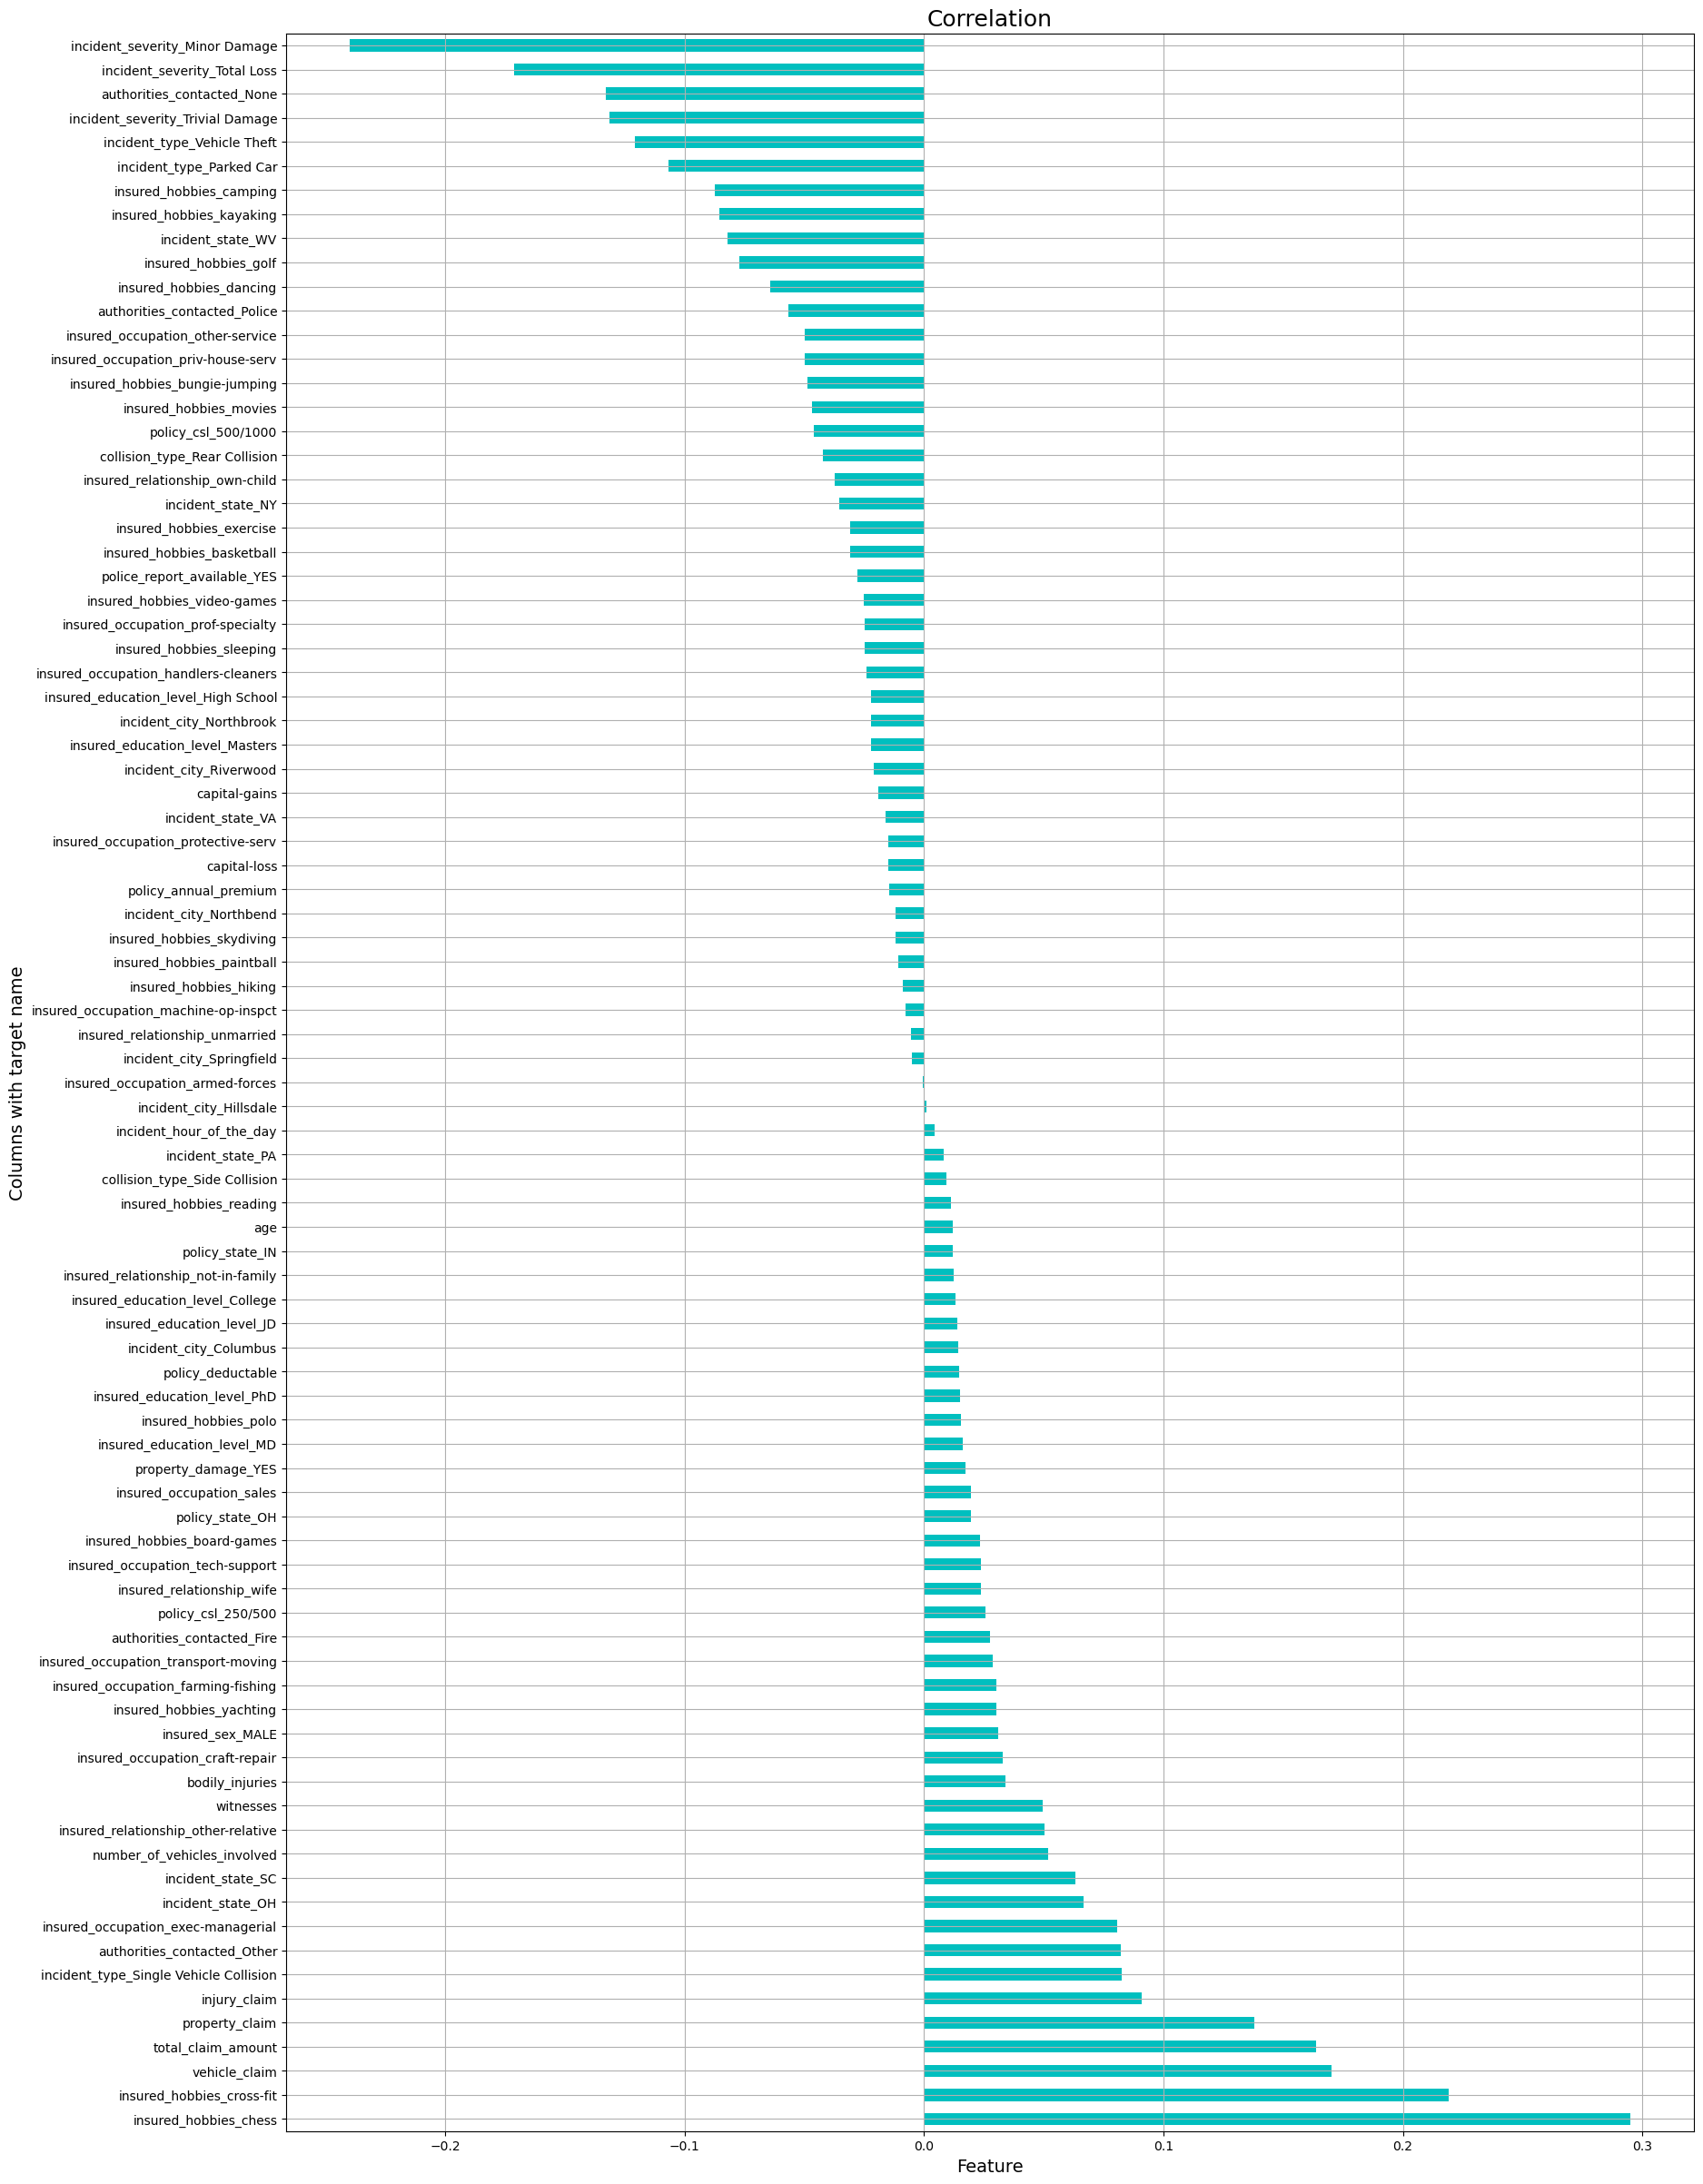

In [96]:
plt.figure(figsize=(20,30))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the targat,
and Features on the left of the 0.0 are having negative or 0 correlation.

# Removing skewnes

In [97]:
df.skew()

age                                       0.478988
policy_deductable                         0.477887
policy_annual_premium                     0.004402
capital-gains                             0.478850
capital-loss                             -0.391472
incident_hour_of_the_day                 -0.035584
number_of_vehicles_involved               0.502664
bodily_injuries                           0.014777
witnesses                                 0.019636
total_claim_amount                       -0.594582
injury_claim                              0.264811
property_claim                            0.378169
vehicle_claim                            -0.621098
policy_state_IN                           0.822868
policy_state_OH                           0.620705
policy_csl_250/500                        0.625306
policy_csl_500/1000                       0.874183
insured_sex_MALE                          0.148630
insured_education_level_College           2.313379
insured_education_level_High Sc

In [98]:
df['number_of_vehicles_involved'] = np.sqrt( df['number_of_vehicles_involved'] )
df['total_claim_amount'] = np.sqrt( df['total_claim_amount'] )
df['vehicle_claim'] = np.sqrt( df['vehicle_claim'] )

Scaling the data Using StandardScaler and Using SMOTE

In [99]:
# Dividing into Feature and Target data
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [100]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

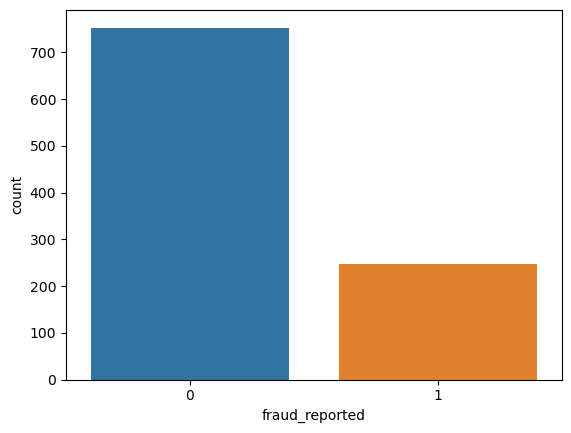

In [101]:
sns.countplot(y)

Data is not balanced we will now use SMOTE to balance the output.

In [102]:
from imblearn.over_sampling import SMOTE
X, Y =SMOTE(k_neighbors=3).fit_resample(x,y)

In [103]:
X.shape

(1506, 87)

In [104]:
Y.shape

(1506,)

In [105]:
df.columns

Index(['age', 'policy_deductable', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_state_IN', 'policy_state_OH', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-spe

In [106]:
new_data=pd.DataFrame(data=X, columns=['age', 'policy_deductable', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_state_IN', 'policy_state_OH', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_basketball',
       'insured_hobbies_board-games', 'insured_hobbies_bungie-jumping',
       'insured_hobbies_camping', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_dancing',
       'insured_hobbies_exercise', 'insured_hobbies_golf',
       'insured_hobbies_hiking', 'insured_hobbies_kayaking',
       'insured_hobbies_movies', 'insured_hobbies_paintball',
       'insured_hobbies_polo', 'insured_hobbies_reading',
       'insured_hobbies_skydiving', 'insured_hobbies_sleeping',
       'insured_hobbies_video-games', 'insured_hobbies_yachting',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss', 'incident_severity_Trivial Damage',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Other', 'authorities_contacted_Police',
       'incident_state_NY', 'incident_state_OH', 'incident_state_PA',
       'incident_state_SC', 'incident_state_VA', 'incident_state_WV',
       'incident_city_Columbus', 'incident_city_Hillsdale',
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield',
       'property_damage_YES', 'police_report_available_YES'])

## VIF Calculation

In [107]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [109]:
pd.set_option('display.max_rows',100)

In [110]:
calc_vif(df)

variables    VIF FACTOR
0                                      age     20.869591
1                        policy_deductable      4.854621
2                    policy_annual_premium     29.520560
3                            capital-gains      2.019643
4                             capital-loss      2.094671
5                 incident_hour_of_the_day      4.379226
6              number_of_vehicles_involved    172.929347
7                          bodily_injuries      2.664173
8                                witnesses      3.049930
9                       total_claim_amount  13457.514824
10                            injury_claim     83.041318
11                          property_claim     80.757035
12                           vehicle_claim   7635.077235
13                         policy_state_IN      2.072660
14                         policy_state_OH      2.216214
15                      policy_csl_250/500      2.190817
16                     policy_csl_500/1000      2.037961
17                        insured_sex_MALE      2.016314
18         insured_education_level_College      2.097498
19     insured_education_level_High School      2.309108
20              insured_education_level_JD      2.377848
21              insured_education_level_MD      2.175949
22         insured_education_level_Masters      2.211181
23             insured_education_level_PhD      2.046738
24         insured_occupation_armed-forces      2.262208
25         insured_occupation_craft-repair      2.342546
26      insured_occupation_exec-managerial      2.381524
27      insured_occupation_farming-fishing      1.987099
28    insured_occupation_handlers-cleaners      2.000155
29    insured_occupation_machine-op-inspct      2.623978
30        insured_occupation_other-service      2.269084
31      insured_occupation_priv-house-serv      2.272687
32       insured_occupation_prof-specialty      2.436917
33      insured_occupation_protective-serv      2.104887
34                insured_occupation_sales      2.323976
35         insured_occupation_tech-support      2.329478
36     insured_occupation_transport-moving      2.321078
37              insured_hobbies_basketball      1.790471
38             insured_hobbies_board-games      2.088071
39          insured_hobbies_bungie-jumping      2.238477
40                 insured_hobbies_camping      2.215236
41                   insured_hobbies_chess      2.256278
42               insured_hobbies_cross-fit      1.887330
43                 insured_hobbies_dancing      1.990280
44                insured_hobbies_exercise      2.275697
45                    insured_hobbies_golf      2.228740
46                  insured_hobbies_hiking      2.211607
47                insured_hobbies_kayaking      2.242109
48                  insured_hobbies_movies      2.211614
49               insured_hobbies_paintball      2.332643
50                    insured_hobbies_polo      2.079400
51                 insured_hobbies_reading      2.435063
52               insured_hobbies_skydiving      2.103506
53                insured_hobbies_sleeping      1.946888
54             insured_hobbies_video-games      2.191640
55                insured_hobbies_yachting      2.189161
56      insured_relationship_not-in-family      2.231232
57     insured_relationship_other-relative      2.226635
58          insured_relationship_own-child      2.241272
59          insured_relationship_unmarried      2.011506
60               insured_relationship_wife      2.124862
61                incident_type_Parked Car      6.144249
62  incident_type_Single Vehicle Collision     22.066352
63             incident_type_Vehicle Theft      6.457228
64           collision_type_Rear Collision      3.960595
65           collision_type_Side Collision      2.375115
66          incident_severity_Minor Damage      3.728573
67            incident_severity_Total Loss      2.862692
68        incident_severity_Trivial Damage      3.189388
69              authorities_contacted_Fire 

In [111]:
df.drop(['total_claim_amount'],axis=1, inplace= True)

In [112]:
calc_vif(df)

variables  VIF FACTOR
0                                      age   20.768604
1                        policy_deductable    4.852210
2                    policy_annual_premium   29.192967
3                            capital-gains    2.017017
4                             capital-loss    2.094599
5                 incident_hour_of_the_day    4.368709
6              number_of_vehicles_involved   90.896041
7                          bodily_injuries    2.662934
8                                witnesses    3.039643
9                             injury_claim    7.660318
10                          property_claim    7.854036
11                           vehicle_claim   91.704070
12                         policy_state_IN    2.068137
13                         policy_state_OH    2.213178
14                      policy_csl_250/500    2.190763
15                     policy_csl_500/1000    2.036653
16                        insured_sex_MALE    2.006851
17         insured_education_level_College    2.097389
18     insured_education_level_High School    2.305980
19              insured_education_level_JD    2.369716
20              insured_education_level_MD    2.175780
21         insured_education_level_Masters    2.210960
22             insured_education_level_PhD    2.044116
23         insured_occupation_armed-forces    2.212259
24         insured_occupation_craft-repair    2.305228
25      insured_occupation_exec-managerial    2.357374
26      insured_occupation_farming-fishing    1.958823
27    insured_occupation_handlers-cleaners    1.982727
28    insured_occupation_machine-op-inspct    2.590701
29        insured_occupation_other-service    2.236487
30      insured_occupation_priv-house-serv    2.228955
31       insured_occupation_prof-specialty    2.401645
32      insured_occupation_protective-serv    2.073557
33                insured_occupation_sales    2.294920
34         insured_occupation_tech-support    2.300188
35     insured_occupation_transport-moving    2.284270
36              insured_hobbies_basketball    1.789200
37             insured_hobbies_board-games    2.083298
38          insured_hobbies_bungie-jumping    2.230075
39                 insured_hobbies_camping    2.196373
40                   insured_hobbies_chess    2.253280
41               insured_hobbies_cross-fit    1.886234
42                 insured_hobbies_dancing    1.987821
43                insured_hobbies_exercise    2.268125
44                    insured_hobbies_golf    2.220452
45                  insured_hobbies_hiking    2.208057
46                insured_hobbies_kayaking    2.223191
47                  insured_hobbies_movies    2.203188
48               insured_hobbies_paintball    2.316087
49                    insured_hobbies_polo    2.070878
50                 insured_hobbies_reading    2.410980
51               insured_hobbies_skydiving    2.102902
52                insured_hobbies_sleeping    1.944371
53             insured_hobbies_video-games    2.167282
54                insured_hobbies_yachting    2.186113
55      insured_relationship_not-in-family    2.220046
56     insured_relationship_other-relative    2.223340
57          insured_relationship_own-child    2.236358
58          insured_relationship_unmarried    2.010373
59               insured_relationship_wife    2.123063
60                incident_type_Parked Car    5.959337
61  incident_type_Single Vehicle Collision   12.523869
62             incident_type_Vehicle Theft    6.263439
63           collision_type_Rear Collision    3.954015
64           collision_type_Side Collision    2.374621
65          incident_severity_Minor Damage    3.728521
66            incident_severity_Total Loss    2.859960
67        incident_severity_Trivial Damage    3.174776
68              authorities_contacted_Fire    2.344943
69              authorities_contacted_None    3.244377
70             authorities_contacted_Other    2.190289
71            authorities_contacted_Police    3.131831
72                

In [113]:
df.drop(['number_of_vehicles_involved'],axis=1, inplace= True)

In [114]:
calc_vif(df)

variables  VIF FACTOR
0                                      age   19.537505
1                        policy_deductable    4.778386
2                    policy_annual_premium   26.710937
3                            capital-gains    1.991410
4                             capital-loss    2.093137
5                 incident_hour_of_the_day    4.356167
6                          bodily_injuries    2.662522
7                                witnesses    3.022057
8                             injury_claim    7.523745
9                           property_claim    7.753053
10                           vehicle_claim   67.127329
11                         policy_state_IN    2.058978
12                         policy_state_OH    2.202189
13                      policy_csl_250/500    2.186653
14                     policy_csl_500/1000    2.035250
15                        insured_sex_MALE    2.001001
16         insured_education_level_College    2.027571
17     insured_education_level_High School    2.268745
18              insured_education_level_JD    2.317786
19              insured_education_level_MD    2.138103
20         insured_education_level_Masters    2.154954
21             insured_education_level_PhD    2.019374
22         insured_occupation_armed-forces    2.168700
23         insured_occupation_craft-repair    2.259480
24      insured_occupation_exec-managerial    2.318383
25      insured_occupation_farming-fishing    1.924533
26    insured_occupation_handlers-cleaners    1.952773
27    insured_occupation_machine-op-inspct    2.500673
28        insured_occupation_other-service    2.204251
29      insured_occupation_priv-house-serv    2.177080
30       insured_occupation_prof-specialty    2.336917
31      insured_occupation_protective-serv    2.045144
32                insured_occupation_sales    2.228457
33         insured_occupation_tech-support    2.237298
34     insured_occupation_transport-moving    2.246043
35              insured_hobbies_basketball    1.760438
36             insured_hobbies_board-games    2.029325
37          insured_hobbies_bungie-jumping    2.154736
38                 insured_hobbies_camping    2.149203
39                   insured_hobbies_chess    2.219401
40               insured_hobbies_cross-fit    1.849335
41                 insured_hobbies_dancing    1.936936
42                insured_hobbies_exercise    2.185874
43                    insured_hobbies_golf    2.133728
44                  insured_hobbies_hiking    2.124597
45                insured_hobbies_kayaking    2.149713
46                  insured_hobbies_movies    2.133766
47               insured_hobbies_paintball    2.224094
48                    insured_hobbies_polo    2.008746
49                 insured_hobbies_reading    2.291403
50               insured_hobbies_skydiving    2.055225
51                insured_hobbies_sleeping    1.890928
52             insured_hobbies_video-games    2.113565
53                insured_hobbies_yachting    2.102613
54      insured_relationship_not-in-family    2.211609
55     insured_relationship_other-relative    2.190411
56          insured_relationship_own-child    2.213469
57          insured_relationship_unmarried    1.997677
58               insured_relationship_wife    2.099833
59                incident_type_Parked Car    5.609288
60  incident_type_Single Vehicle Collision    2.158101
61             incident_type_Vehicle Theft    5.818766
62           collision_type_Rear Collision    3.842193
63           collision_type_Side Collision    2.336116
64          incident_severity_Minor Damage    3.678205
65            incident_severity_Total Loss    2.830955
66        incident_severity_Trivial Damage    3.149118
67              authorities_contacted_Fire    2.336471
68              authorities_contacted_None    3.239842
69             authorities_contacted_Other    2.184498
70            authorities_contacted_Police    3.119472
71                       incident_state_NY    3.584522
72                

In [115]:
df.drop(['vehicle_claim'],axis=1, inplace= True)

In [116]:
calc_vif(df)

variables  VIF FACTOR
0                                      age   18.659096
1                        policy_deductable    4.771061
2                    policy_annual_premium   24.345450
3                            capital-gains    1.989028
4                             capital-loss    2.091302
5                 incident_hour_of_the_day    4.332314
6                          bodily_injuries    2.642797
7                                witnesses    3.022004
8                             injury_claim    6.464909
9                           property_claim    6.551463
10                         policy_state_IN    2.025248
11                         policy_state_OH    2.185868
12                      policy_csl_250/500    2.183974
13                     policy_csl_500/1000    2.025976
14                        insured_sex_MALE    2.000996
15         insured_education_level_College    2.026754
16     insured_education_level_High School    2.260923
17              insured_education_level_JD    2.317011
18              insured_education_level_MD    2.135449
19         insured_education_level_Masters    2.139604
20             insured_education_level_PhD    2.011991
21         insured_occupation_armed-forces    2.082120
22         insured_occupation_craft-repair    2.206330
23      insured_occupation_exec-managerial    2.232309
24      insured_occupation_farming-fishing    1.885231
25    insured_occupation_handlers-cleaners    1.875419
26    insured_occupation_machine-op-inspct    2.410765
27        insured_occupation_other-service    2.125850
28      insured_occupation_priv-house-serv    2.104881
29       insured_occupation_prof-specialty    2.268186
30      insured_occupation_protective-serv    1.983408
31                insured_occupation_sales    2.159310
32         insured_occupation_tech-support    2.182985
33     insured_occupation_transport-moving    2.189087
34              insured_hobbies_basketball    1.729388
35             insured_hobbies_board-games    2.007905
36          insured_hobbies_bungie-jumping    2.103360
37                 insured_hobbies_camping    2.053561
38                   insured_hobbies_chess    2.149047
39               insured_hobbies_cross-fit    1.797243
40                 insured_hobbies_dancing    1.914679
41                insured_hobbies_exercise    2.109702
42                    insured_hobbies_golf    2.012623
43                  insured_hobbies_hiking    2.055813
44                insured_hobbies_kayaking    2.093581
45                  insured_hobbies_movies    2.056143
46               insured_hobbies_paintball    2.142242
47                    insured_hobbies_polo    1.964591
48                 insured_hobbies_reading    2.194216
49               insured_hobbies_skydiving    1.997239
50                insured_hobbies_sleeping    1.834313
51             insured_hobbies_video-games    2.047710
52                insured_hobbies_yachting    2.069253
53      insured_relationship_not-in-family    2.209738
54     insured_relationship_other-relative    2.184794
55          insured_relationship_own-child    2.206777
56          insured_relationship_unmarried    1.995886
57               insured_relationship_wife    2.095978
58                incident_type_Parked Car    4.095608
59  incident_type_Single Vehicle Collision    2.124329
60             incident_type_Vehicle Theft    4.115644
61           collision_type_Rear Collision    3.837115
62           collision_type_Side Collision    2.327084
63          incident_severity_Minor Damage    3.650896
64            incident_severity_Total Loss    2.804301
65        incident_severity_Trivial Damage    3.124701
66              authorities_contacted_Fire    2.310220
67              authorities_contacted_None    3.221928
68             authorities_contacted_Other    2.148050
69            authorities_contacted_Police    3.075338
70                       incident_state_NY    3.514281
71                       incident_state_OH    1.288662
72                

In [117]:
df.drop(['policy_annual_premium'],axis=1, inplace= True)

In [118]:
calc_vif(df)

variables  VIF FACTOR
0                                      age   17.942551
1                        policy_deductable    4.745898
2                            capital-gains    1.985492
3                             capital-loss    2.091099
4                 incident_hour_of_the_day    4.325899
5                          bodily_injuries    2.625420
6                                witnesses    3.012860
7                             injury_claim    6.464690
8                           property_claim    6.545502
9                          policy_state_IN    2.020365
10                         policy_state_OH    2.177955
11                      policy_csl_250/500    2.174796
12                     policy_csl_500/1000    2.019238
13                        insured_sex_MALE    1.995656
14         insured_education_level_College    2.017134
15     insured_education_level_High School    2.226079
16              insured_education_level_JD    2.307050
17              insured_education_level_MD    2.120668
18         insured_education_level_Masters    2.132024
19             insured_education_level_PhD    2.005698
20         insured_occupation_armed-forces    2.054040
21         insured_occupation_craft-repair    2.170558
22      insured_occupation_exec-managerial    2.208711
23      insured_occupation_farming-fishing    1.850551
24    insured_occupation_handlers-cleaners    1.823706
25    insured_occupation_machine-op-inspct    2.368855
26        insured_occupation_other-service    2.060730
27      insured_occupation_priv-house-serv    2.060361
28       insured_occupation_prof-specialty    2.212196
29      insured_occupation_protective-serv    1.944081
30                insured_occupation_sales    2.123827
31         insured_occupation_tech-support    2.132236
32     insured_occupation_transport-moving    2.138682
33              insured_hobbies_basketball    1.702421
34             insured_hobbies_board-games    1.977729
35          insured_hobbies_bungie-jumping    2.071510
36                 insured_hobbies_camping    2.020792
37                   insured_hobbies_chess    2.138449
38               insured_hobbies_cross-fit    1.782492
39                 insured_hobbies_dancing    1.884779
40                insured_hobbies_exercise    2.046197
41                    insured_hobbies_golf    1.983028
42                  insured_hobbies_hiking    2.017964
43                insured_hobbies_kayaking    2.068117
44                  insured_hobbies_movies    2.029370
45               insured_hobbies_paintball    2.128918
46                    insured_hobbies_polo    1.923277
47                 insured_hobbies_reading    2.167880
48               insured_hobbies_skydiving    1.964596
49                insured_hobbies_sleeping    1.796670
50             insured_hobbies_video-games    2.022901
51                insured_hobbies_yachting    2.016558
52      insured_relationship_not-in-family    2.205776
53     insured_relationship_other-relative    2.174781
54          insured_relationship_own-child    2.192525
55          insured_relationship_unmarried    1.993996
56               insured_relationship_wife    2.087521
57                incident_type_Parked Car    4.092445
58  incident_type_Single Vehicle Collision    2.105593
59             incident_type_Vehicle Theft    4.110979
60           collision_type_Rear Collision    3.783187
61           collision_type_Side Collision    2.284107
62          incident_severity_Minor Damage    3.617661
63            incident_severity_Total Loss    2.779981
64        incident_severity_Trivial Damage    3.118225
65              authorities_contacted_Fire    2.304236
66              authorities_contacted_None    3.220863
67             authorities_contacted_Other    2.146583
68            authorities_contacted_Police    3.075038
69                       incident_state_NY    3.458443
70                       incident_state_OH    1.287986
71                       incident_state_PA    1.350578
72                

In [119]:
df.drop(['age'],axis=1, inplace= True)

In [120]:
calc_vif(df)

variables  VIF FACTOR
0                        policy_deductable    4.718241
1                            capital-gains    1.981312
2                             capital-loss    2.091080
3                 incident_hour_of_the_day    4.239532
4                          bodily_injuries    2.623180
5                                witnesses    2.983080
6                             injury_claim    6.409277
7                           property_claim    6.516785
8                          policy_state_IN    2.018653
9                          policy_state_OH    2.173192
10                      policy_csl_250/500    2.172401
11                     policy_csl_500/1000    2.018704
12                        insured_sex_MALE    1.975495
13         insured_education_level_College    2.016715
14     insured_education_level_High School    2.225620
15              insured_education_level_JD    2.306968
16              insured_education_level_MD    2.108423
17         insured_education_level_Masters    2.130322
18             insured_education_level_PhD    2.004454
19         insured_occupation_armed-forces    2.041533
20         insured_occupation_craft-repair    2.148403
21      insured_occupation_exec-managerial    2.190961
22      insured_occupation_farming-fishing    1.835552
23    insured_occupation_handlers-cleaners    1.802735
24    insured_occupation_machine-op-inspct    2.335839
25        insured_occupation_other-service    2.033772
26      insured_occupation_priv-house-serv    2.039267
27       insured_occupation_prof-specialty    2.175365
28      insured_occupation_protective-serv    1.927277
29                insured_occupation_sales    2.090900
30         insured_occupation_tech-support    2.113526
31     insured_occupation_transport-moving    2.099208
32              insured_hobbies_basketball    1.654649
33             insured_hobbies_board-games    1.919192
34          insured_hobbies_bungie-jumping    1.971896
35                 insured_hobbies_camping    1.957375
36                   insured_hobbies_chess    2.048117
37               insured_hobbies_cross-fit    1.735856
38                 insured_hobbies_dancing    1.843423
39                insured_hobbies_exercise    1.966036
40                    insured_hobbies_golf    1.942638
41                  insured_hobbies_hiking    1.960001
42                insured_hobbies_kayaking    2.004523
43                  insured_hobbies_movies    1.972828
44               insured_hobbies_paintball    2.045587
45                    insured_hobbies_polo    1.883877
46                 insured_hobbies_reading    2.079734
47               insured_hobbies_skydiving    1.916758
48                insured_hobbies_sleeping    1.740804
49             insured_hobbies_video-games    1.999705
50                insured_hobbies_yachting    1.986545
51      insured_relationship_not-in-family    2.187692
52     insured_relationship_other-relative    2.155904
53          insured_relationship_own-child    2.160251
54          insured_relationship_unmarried    1.967993
55               insured_relationship_wife    2.056393
56                incident_type_Parked Car    4.080463
57  incident_type_Single Vehicle Collision    2.103177
58             incident_type_Vehicle Theft    4.104085
59           collision_type_Rear Collision    3.783061
60           collision_type_Side Collision    2.283776
61          incident_severity_Minor Damage    3.597706
62            incident_severity_Total Loss    2.776428
63        incident_severity_Trivial Damage    3.116419
64              authorities_contacted_Fire    2.291054
65              authorities_contacted_None    3.210535
66             authorities_contacted_Other    2.135910
67            authorities_contacted_Police    3.045462
68                       incident_state_NY    3.420995
69                       incident_state_OH    1.287191
70                       incident_state_PA    1.350438
71                       incident_state_SC    3.382900
72                

In [121]:
x = new_data
y = Y

In [122]:
x.shape

(1506, 87)

In [123]:
y.shape

(1506,)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [125]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=41,test_size=0.20)

In [126]:
lr = LogisticRegression ()
lr.fit(x_train, y_train)
lr_pred=lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))

0.8675496688741722


## Cross Valdation

In [127]:
lr_pred=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 86.65338645418326
Accuracy Score:- 86.75496688741721


at cv:- 3
Cross Validation scre is:- 86.98539176626826
Accuracy Score:- 86.75496688741721


at cv:- 4
Cross Validation scre is:- 86.92029036627349
Accuracy Score:- 86.75496688741721


at cv:- 5
Cross Validation scre is:- 87.4528613231832
Accuracy Score:- 86.75496688741721


at cv:- 6
Cross Validation scre is:- 86.91899070385126
Accuracy Score:- 86.75496688741721


at cv:- 7
Cross Validation scre is:- 86.72326811861696
Accuracy Score:- 86.75496688741721


at cv:- 8
Cross Validation scre is:- 87.32199144433186
Accuracy Score:- 86.75496688741721


at cv:- 9
Cross Validation scre is:- 87.05525457022463
Accuracy Score:- 86.75496688741721




At cv:- 

Cross Validation scre is:- 86.65

Accuracy Score:- 86.75

# svc

In [128]:
svc=SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred=svc.predict(x_test)

svc_d=accuracy_score(y_test, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=4, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 92.3841059602649
Cross val Score : 91.96854365370507


# DecisionTreeClassifier

In [129]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train, y_train)
dt_pred=dt.predict(x_test)

dt_score= accuracy_score(y_test, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=4, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 86.09271523178808
Cross val score is: 84.46776765054462


# RandomForestClassifier

In [130]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= accuracy_score(y_test, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=4, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  90.39735099337747
Cross val Score : 86.46579942434674


## Hyperparameter Tuning of the model.

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [50,100,125,150,175,200],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt', 'log2'], 'random_state':[10,20,30,40,50]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x, y)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 125, 'random_state': 30}


In [133]:
rf=RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=175, random_state=20)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= accuracy_score(y_test, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=4, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  88.74172185430463
Cross val Score : 85.4712808284892


## AUC Roc curve

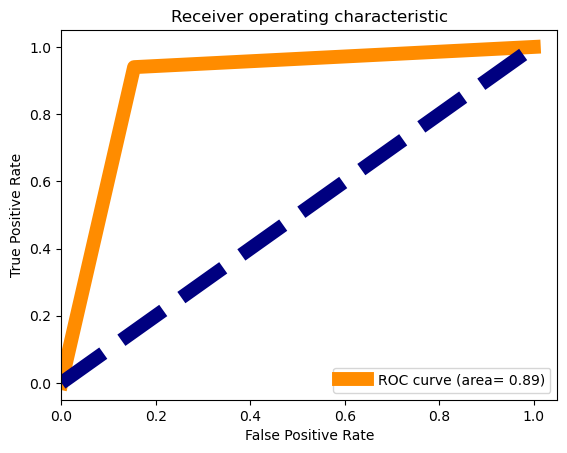

In [134]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(rf_pred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the best model

In [135]:
import pickle
filename="Insurance Claim Fraud Detection.pkl "
pickle.dump(rf, open(filename,'wb'))

In [136]:
import numpy as np
a=np.array(y_test)
predicted= np.array(rf.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0           0          0
1           1          1
2           1          1
3           0          0
4           1          1
..        ...        ...
297         1          1
298         1          0
299         1          1
300         1          1
301         0          0

[302 rows x 2 columns]